# Unimodal Text BMA
This notebook is composed as follows:
- Utils: section with parameters setup and function definition
- Load Training Data (loading and preprocessing of training data)
- BMA on training data:
    - cross validation on training data to compute models' reliability [one fold is isolated for bma testing] 
    - cross validation on training data to compute models' performances
    - BMA model predictions on training data
- Load Training Data (loading and preprocessing of test data)
- BMA on test data:
    - cross validation on training data to compute models' reliability
    - cross validation on training data to compute models' performances
    - BMA model predictions on test data
- Load Training Data (loading and preprocessing of synthetic data)
- BMA on Synthetic data:
    - cross validation on training data to compute models' reliability
    - cross validation on training data to compute models' performances
    - BMA model predictions on test data

In [2]:
import numpy as np
import pandas as pd
import os
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc

from matplotlib import pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import train_test_split, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV
from statistics import mean
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import matplotlib.pyplot as plt

from statistics import mean

In [3]:
from Utils import load_data, project_paths, evaluation_metrics, preprocessing


## Utils

In [3]:
model_list = ["SVM", "KNN", "NB","DT", "MLP"]

In [5]:
kfold = load_data.load_folds()

In [5]:
# Create a folder to store results
data_folder = project_paths.folder_results
if not os.path.exists(data_folder):
    os.makedirs(data_folder)

## Load Training Data

### Training data _ Spacy preprocessing
Load training data as provided from the challenge organizers and create a CSV with clear text obtaied via preprocessing operations based on Spact Stanza lemmatization,

In [6]:
# create a folder in which it store Spacy data
data_folder = '../data/datasets/Spacy/'
if not os.path.exists(data_folder):
    os.makedirs(data_folder)

In [1]:
dataset = load_data.load_training_data()
dataset

NameError: name 'load_data' is not defined

In [8]:
# perform preprocessing operation on text optained from OCR using Spacy Stanza
dataset.fillna('')
dataset['clean']= preprocessing.data_pre_processing(dataset['Text Transcription'])
dataset["clean"]= dataset.clean.fillna('')

2023-07-10 15:44:30 INFO: Downloading default packages for language: en (English)...
2023-07-10 15:44:31 INFO: File exists: /home/jimmy/stanza_resources/en/default.zip.


KeyboardInterrupt: 

#### masked

In [7]:
dataset.fillna('')
dataset['clean']= preprocessing.data_pre_processing_masking(dataset['Text Transcription'])
dataset["clean"]= dataset.clean.fillna('')

2023-07-21 14:52:05 INFO: Downloading default packages for language: en (English)...


2023-07-21 14:52:06 INFO: File exists: /home/jimmy/stanza_resources/en/default.zip.
2023-07-21 14:52:10 INFO: Finished downloading models and saved to /home/jimmy/stanza_resources.
2023-07-21 14:52:10 INFO: Loading these models for language: en (English):
| Processor    | Package   |
----------------------------
| tokenize     | combined  |
| pos          | combined  |
| lemma        | combined  |
| depparse     | combined  |
| sentiment    | sstplus   |
| constituency | wsj       |
| ner          | ontonotes |

2023-07-21 14:52:10 INFO: Use device: gpu
2023-07-21 14:52:10 INFO: Loading: tokenize
2023-07-21 14:52:13 INFO: Loading: pos
2023-07-21 14:52:13 INFO: Loading: lemma
2023-07-21 14:52:13 INFO: Loading: depparse
2023-07-21 14:52:14 INFO: Loading: sentiment
2023-07-21 14:52:14 INFO: Loading: constituency
2023-07-21 14:52:14 INFO: Loading: ner
2023-07-21 14:52:15 INFO: Done loading processors!
100%|██████████| 10000/10000 [28:28<00:00,  5.85it/s] 


In [16]:
dataset["clean"][80:]

80                      ka plah say new ms planet klingon
81      man likely die covid after week stick home my ...
82                   young woman healthy bmi straight man
83       usa doctor hurt baby boy circumcision mutilation
84      you [POS-MASK] clean make it long care you app...
                              ...                        
9995                                       wait end covid
9996                                          smart woman
9997                                     good girl corner
9998                                         cook my wife
9999    listen tomorrow monday youtube com user menswe...
Name: clean, Length: 9920, dtype: object

In [5]:
project_paths.csv_path_train_Spacy_masked

'/home/jimmy/Documenti/PhD/Project_BMA/data/datasets/text_csv/training_Spacy_masked.csv'

In [6]:
dataset.to_csv(project_paths.csv_path_train_Spacy_masked, index=False, sep='\t')
dataset

NameError: name 'dataset' is not defined

#### censored

In [8]:
dataset.fillna('')
dataset['clean']= preprocessing.data_pre_processing_censored(dataset['Text Transcription'])
dataset["clean"]= dataset.clean.fillna('')

2023-07-21 15:51:51 INFO: Downloading default packages for language: en (English)...
2023-07-21 15:51:52 INFO: File exists: /home/jimmy/stanza_resources/en/default.zip.
2023-07-21 15:51:56 INFO: Finished downloading models and saved to /home/jimmy/stanza_resources.
2023-07-21 15:51:56 INFO: Loading these models for language: en (English):
| Processor    | Package   |
----------------------------
| tokenize     | combined  |
| pos          | combined  |
| lemma        | combined  |
| depparse     | combined  |
| sentiment    | sstplus   |
| constituency | wsj       |
| ner          | ontonotes |

2023-07-21 15:51:56 INFO: Use device: gpu
2023-07-21 15:51:56 INFO: Loading: tokenize
2023-07-21 15:51:59 INFO: Loading: pos
2023-07-21 15:51:59 INFO: Loading: lemma
2023-07-21 15:51:59 INFO: Loading: depparse
2023-07-21 15:51:59 INFO: Loading: sentiment
2023-07-21 15:52:00 INFO: Loading: constituency
2023-07-21 15:52:00 INFO: Loading: ner
2023-07-21 15:52:00 INFO: Done loading processors!
100%

In [9]:
dataset

,file_name,misogynous,Text Transcription,clean
0,1.jpg,0,Milk Milk.zip,milk milk zip
1,10.jpg,1,"ROSES ARE RED, VIOLETS ARE BLUE IF YOU DON'T S...",rose red violet blue you say yes i just rape you
2,1000.jpg,0,BREAKING NEWS: Russia releases photo of DONALD...,break news russia release photo donald trump h...
3,10000.jpg,0,MAN SEEKING WOMAN Ignad 18 O,man seek woman ignad o
4,10006.jpg,0,Me explaining the deep lore of. J.R.R. Tolkein...,i explain deep lore j tolkein world arda prost...
...,...,...,...,...
9995,15002.jpg,0,WAITING FOR THE END OF THE COVID imgflip.com,wait end covid
9996,15003.jpg,0,SMART WOMEN ARE AROUND imgflip.com,smart woman
9997,15004.jpg,0,GOOD GIRLS ARE BEHIND THE CORNER imgflip.com,good girl corner
9998,15005.jpg,0,COOKING FOR MY WIFE imgflip.com,cook my wife


In [10]:
dataset["clean"][84]

'you clean make it long care you appliance'

In [12]:
project_paths.csv_path_train_Spacy_censored

'/home/jimmy/Documenti/PhD/Project_BMA/data/datasets/text_csv/training_Spacy_censored.csv'

In [13]:
dataset.to_csv(project_paths.csv_path_train_Spacy_censored, index=False, sep='\t')

In [9]:
dataset

,file_name,misogynous,Text Transcription,clean
0,1.jpg,0,Milk Milk.zip,milk milk zip
1,10.jpg,1,"ROSES ARE RED, VIOLETS ARE BLUE IF YOU DON'T S...",rose red violet blue you say yes i just rape you
2,1000.jpg,0,BREAKING NEWS: Russia releases photo of DONALD...,break news russia release photo donald trump h...
3,10000.jpg,0,MAN SEEKING WOMAN Ignad 18 O,man seek woman ignad o
4,10006.jpg,0,Me explaining the deep lore of. J.R.R. Tolkein...,i explain deep lore j tolkein world arda prost...
...,...,...,...,...
9995,15002.jpg,0,WAITING FOR THE END OF THE COVID imgflip.com,wait end covid
9996,15003.jpg,0,SMART WOMEN ARE AROUND imgflip.com,smart woman
9997,15004.jpg,0,GOOD GIRLS ARE BEHIND THE CORNER imgflip.com,good girl corner
9998,15005.jpg,0,COOKING FOR MY WIFE imgflip.com,cook my wife


In [ ]:
# perform preprocessing operation on text optained from OCR using Spacy Stanza
dataset.fillna('')
dataset['clean'] = preprocessing.apply_lemmatization_stanza(dataset['Text Transcription'])
dataset["clean"]= dataset.clean.fillna('')

In [10]:
dataset.to_csv(project_paths.csv_path_train_Spacy, index=False, sep='\t')
dataset

,file_name,misogynous,Text Transcription,clean
0,1.jpg,0,Milk Milk.zip,milk milk zip
1,10.jpg,1,"ROSES ARE RED, VIOLETS ARE BLUE IF YOU DON'T S...",rose red violet blue you say yes i just rape you
2,1000.jpg,0,BREAKING NEWS: Russia releases photo of DONALD...,break news russia release photo donald trump h...
3,10000.jpg,0,MAN SEEKING WOMAN Ignad 18 O,man seek woman ignad o
4,10006.jpg,0,Me explaining the deep lore of. J.R.R. Tolkein...,i explain deep lore j tolkein world arda prost...
...,...,...,...,...
9995,15002.jpg,0,WAITING FOR THE END OF THE COVID imgflip.com,wait end covid
9996,15003.jpg,0,SMART WOMEN ARE AROUND imgflip.com,smart woman
9997,15004.jpg,0,GOOD GIRLS ARE BEHIND THE CORNER imgflip.com,good girl corner
9998,15005.jpg,0,COOKING FOR MY WIFE imgflip.com,cook my wife


### Sentence embedding

In [12]:
dataset_old = load_data.load_training_data_Spacy()

In [17]:
dataset_old["clean"][84]

'you dishwasher clean make it long care you appliance'

#### masked

In [8]:
project_paths.csv_path_train_Spacy_masked

'/home/jimmy/Documenti/PhD/Project_BMA/data/datasets/text_csv/training_Spacy_masked.csv'

In [12]:
dataset = pd.read_csv(project_paths.csv_path_train_Spacy_masked, sep="\t")
dataset

,file_name,misogynous,Text Transcription,clean
0,1.jpg,0,Milk Milk.zip,milk milk zip
1,10.jpg,1,"ROSES ARE RED, VIOLETS ARE BLUE IF YOU DON'T S...",rose red violet blue you say yes i just rape you
2,1000.jpg,0,BREAKING NEWS: Russia releases photo of DONALD...,break news russia release photo donald trump h...
3,10000.jpg,0,MAN SEEKING WOMAN Ignad 18 O,man seek woman ignad o
4,10006.jpg,0,Me explaining the deep lore of. J.R.R. Tolkein...,i explain deep lore j tolkein world arda prost...
...,...,...,...,...
9995,15002.jpg,0,WAITING FOR THE END OF THE COVID imgflip.com,wait end covid
9996,15003.jpg,0,SMART WOMEN ARE AROUND imgflip.com,smart woman
9997,15004.jpg,0,GOOD GIRLS ARE BEHIND THE CORNER imgflip.com,good girl corner
9998,15005.jpg,0,COOKING FOR MY WIFE imgflip.com,cook my wife


In [11]:
dataset

,file_name,misogynous,Text Transcription,clean
0,1.jpg,0,Milk Milk.zip,None
1,10.jpg,1,"ROSES ARE RED, VIOLETS ARE BLUE IF YOU DON'T S...",None
2,1000.jpg,0,BREAKING NEWS: Russia releases photo of DONALD...,None
3,10000.jpg,0,MAN SEEKING WOMAN Ignad 18 O,None
4,10006.jpg,0,Me explaining the deep lore of. J.R.R. Tolkein...,None
...,...,...,...,...
9995,15002.jpg,0,WAITING FOR THE END OF THE COVID imgflip.com,None
9996,15003.jpg,0,SMART WOMEN ARE AROUND imgflip.com,None
9997,15004.jpg,0,GOOD GIRLS ARE BEHIND THE CORNER imgflip.com,None
9998,15005.jpg,0,COOKING FOR MY WIFE imgflip.com,None


In [13]:
dataset["clean"] = dataset["clean"].fillna(' ')

In [14]:
dataset

,file_name,misogynous,Text Transcription,clean
0,1.jpg,0,Milk Milk.zip,milk milk zip
1,10.jpg,1,"ROSES ARE RED, VIOLETS ARE BLUE IF YOU DON'T S...",rose red violet blue you say yes i just rape you
2,1000.jpg,0,BREAKING NEWS: Russia releases photo of DONALD...,break news russia release photo donald trump h...
3,10000.jpg,0,MAN SEEKING WOMAN Ignad 18 O,man seek woman ignad o
4,10006.jpg,0,Me explaining the deep lore of. J.R.R. Tolkein...,i explain deep lore j tolkein world arda prost...
...,...,...,...,...
9995,15002.jpg,0,WAITING FOR THE END OF THE COVID imgflip.com,wait end covid
9996,15003.jpg,0,SMART WOMEN ARE AROUND imgflip.com,smart woman
9997,15004.jpg,0,GOOD GIRLS ARE BEHIND THE CORNER imgflip.com,good girl corner
9998,15005.jpg,0,COOKING FOR MY WIFE imgflip.com,cook my wife


In [27]:

count = 0
for index, row in dataset.iterrows():
    tokens = row["clean"].split(" ")
    #print(tokens)
    for tok in tokens:
        #print(tok)
        if tok == "[NEG-MASK]" and row["misogynous"] == 0:
            count+=1
print(count)

171


#### censored

In [8]:
dataset = pd.read_csv(project_paths.csv_path_train_Spacy_censored, sep="\t")
dataset

,file_name,misogynous,Text Transcription,clean
0,1.jpg,0,Milk Milk.zip,milk milk zip
1,10.jpg,1,"ROSES ARE RED, VIOLETS ARE BLUE IF YOU DON'T S...",rose red violet blue you say yes i just rape you
2,1000.jpg,0,BREAKING NEWS: Russia releases photo of DONALD...,break news russia release photo donald trump h...
3,10000.jpg,0,MAN SEEKING WOMAN Ignad 18 O,man seek woman ignad o
4,10006.jpg,0,Me explaining the deep lore of. J.R.R. Tolkein...,i explain deep lore j tolkein world arda prost...
...,...,...,...,...
9995,15002.jpg,0,WAITING FOR THE END OF THE COVID imgflip.com,wait end covid
9996,15003.jpg,0,SMART WOMEN ARE AROUND imgflip.com,smart woman
9997,15004.jpg,0,GOOD GIRLS ARE BEHIND THE CORNER imgflip.com,good girl corner
9998,15005.jpg,0,COOKING FOR MY WIFE imgflip.com,cook my wife


In [9]:
dataset["clean"][84]

'you clean make it long care you appliance'

In [10]:
text_embeddings = preprocessing.use_preprocessing(dataset, 'clean')
dataset["use"] = text_embeddings
del text_embeddings
dataset

2023-07-21 18:10:57.267413: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-07-21 18:10:57.317042: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-07-21 18:10:57.317210: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-07-21 18:10:57.317687: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

,file_name,misogynous,Text Transcription,clean,use
0,1.jpg,0,Milk Milk.zip,milk milk zip,"[0.03246083855628967, 0.048080846667289734, -0..."
1,10.jpg,1,"ROSES ARE RED, VIOLETS ARE BLUE IF YOU DON'T S...",rose red violet blue you say yes i just rape you,"[0.04622148349881172, 0.003272474743425846, -0..."
2,1000.jpg,0,BREAKING NEWS: Russia releases photo of DONALD...,break news russia release photo donald trump h...,"[0.011391413398087025, -0.02363169752061367, -..."
3,10000.jpg,0,MAN SEEKING WOMAN Ignad 18 O,man seek woman ignad o,"[0.031483203172683716, -0.07622070610523224, 0..."
4,10006.jpg,0,Me explaining the deep lore of. J.R.R. Tolkein...,i explain deep lore j tolkein world arda prost...,"[0.010985828004777431, 0.07038193196058273, 0...."
...,...,...,...,...,...
9995,15002.jpg,0,WAITING FOR THE END OF THE COVID imgflip.com,wait end covid,"[-0.05438155680894852, 0.015376931987702847, -..."
9996,15003.jpg,0,SMART WOMEN ARE AROUND imgflip.com,smart woman,"[0.0018902866868302226, -0.007919851690530777,..."
9997,15004.jpg,0,GOOD GIRLS ARE BEHIND THE CORNER imgflip.com,good girl corner,"[-0.002538477536290884, -0.02124689891934395, ..."
9998,15005.jpg,0,COOKING FOR MY WIFE imgflip.com,cook my wife,"[0.052095070481300354, -0.06465582549571991, 0..."


In [11]:
dataset

,file_name,misogynous,Text Transcription,clean,use
0,1.jpg,0,Milk Milk.zip,milk milk zip,"[0.03246083855628967, 0.048080846667289734, -0..."
1,10.jpg,1,"ROSES ARE RED, VIOLETS ARE BLUE IF YOU DON'T S...",rose red violet blue you say yes i just rape you,"[0.04622148349881172, 0.003272474743425846, -0..."
2,1000.jpg,0,BREAKING NEWS: Russia releases photo of DONALD...,break news russia release photo donald trump h...,"[0.011391413398087025, -0.02363169752061367, -..."
3,10000.jpg,0,MAN SEEKING WOMAN Ignad 18 O,man seek woman ignad o,"[0.031483203172683716, -0.07622070610523224, 0..."
4,10006.jpg,0,Me explaining the deep lore of. J.R.R. Tolkein...,i explain deep lore j tolkein world arda prost...,"[0.010985828004777431, 0.07038193196058273, 0...."
...,...,...,...,...,...
9995,15002.jpg,0,WAITING FOR THE END OF THE COVID imgflip.com,wait end covid,"[-0.05438155680894852, 0.015376931987702847, -..."
9996,15003.jpg,0,SMART WOMEN ARE AROUND imgflip.com,smart woman,"[0.0018902866868302226, -0.007919851690530777,..."
9997,15004.jpg,0,GOOD GIRLS ARE BEHIND THE CORNER imgflip.com,good girl corner,"[-0.002538477536290884, -0.02124689891934395, ..."
9998,15005.jpg,0,COOKING FOR MY WIFE imgflip.com,cook my wife,"[0.052095070481300354, -0.06465582549571991, 0..."


## Models on Training data

In [10]:
if not os.path.exists(project_paths.folder_res_train):
    os.makedirs(project_paths.folder_res_train)

In [11]:
# create a dictionary to store models scores
keys = ['SCORE ' + str(num) + ' ' + model.upper()  for model in model_list for num in [0,1]]
keys.insert(0,'FOLD')
scores = dict((el,[]) for el in keys)
scores['FOLD']=list(range(1, 11))
del keys
scores

{'FOLD': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 'SCORE 0 SVM': [],
 'SCORE 1 SVM': [],
 'SCORE 0 KNN': [],
 'SCORE 1 KNN': [],
 'SCORE 0 NB': [],
 'SCORE 1 NB': [],
 'SCORE 0 DT': [],
 'SCORE 1 DT': [],
 'SCORE 0 MLP': [],
 'SCORE 1 MLP': []}

#### Kfold to compute f1-reliability for later usage in BMA.

For each of the 10Fold execution, 1 fold is isolated since it will be later use to test the BMA model, while the other are use with a 9-fold (8-fold for training and one fold for test) approach to compute reliability.
The results are 10 F1 mesures (each obtained by the 9-fold approach).Performance are stored in dictionaries and saved in a csv file.

In [9]:
for key, val in kfold.items():

    test_complete = []
    y_pred_svm = []
    y_pred_knn = []
    y_pred_nb = []
    y_pred_dt = []
    y_pred_mlp = []

    train_ids = val["train"]

    print(f'FOLD BMA {key}')

    train_dataset =  dataset.iloc[train_ids][['use']]
    train = list(train_dataset["use"])
    labels_train =  dataset.iloc[train_ids][['misogynous']]
    y_train = list(labels_train["misogynous"])

    folds = KFold(n_splits=9, shuffle=True)
    fold_dataset = dataset.iloc[train_ids]
    count= 1
    for train_id, test_id in folds.split(fold_dataset):
        print("\t internal FOLD", count)
        train_fold = fold_dataset.iloc[train_id][["use"]]
        test_fold = fold_dataset.iloc[test_id][["use"]]
        train_f = list(train_fold["use"])
        test_f = list(test_fold["use"])
        targets_train =  fold_dataset.iloc[train_id][['misogynous']]
        targets_test = fold_dataset.iloc[test_id][['misogynous']]
        target_train = list(targets_train["misogynous"])
        target_test = list(targets_test["misogynous"])

        test_complete = test_complete + target_test

        #_______________________________ Support Vector Machine_______________________________
        svc = LinearSVC(C=10,  dual=False, loss="squared_hinge")
        svc = CalibratedClassifierCV(svc)
        svc.fit(train_f, target_train)
        y_pred_svm = y_pred_svm + svc.predict(test_f).tolist()

    
        #_______________________________K-Nearest Neighbor_______________________________
        knn = KNeighborsClassifier(n_neighbors=21)
        clf = knn.fit(train_f, target_train)
        y_pred_knn = y_pred_knn +  clf.predict(test_f).tolist()

        #_______________________________ Naive Bayes_______________________________
        naive_bayes= GaussianNB()
        naive_bayes.fit(train_f, target_train)
        y_pred_nb = y_pred_nb + naive_bayes.predict(test_f).tolist()

        #______________________________Decision Tree_______________________________
        dtr = DecisionTreeClassifier(max_depth=3)
        dtr.fit(train_f, target_train)
        y_pred_dt = y_pred_dt + dtr.predict(test_f).tolist()

        #_______________________________ Multilayer Percepron _______________________________
        mlp = MLPClassifier(max_iter=400, activation="relu", alpha=0.05, hidden_layer_sizes=(100,), solver="adam", learning_rate="constant")
        mlp.fit(train_f, target_train)
        y_pred_mlp = y_pred_mlp + mlp.predict(test_f).tolist()

        count +=1

    svm_results = evaluation_metrics.compute_evaluation_metrics(y_pred_svm, test_complete)
    knn_results = evaluation_metrics.compute_evaluation_metrics(y_pred_knn, test_complete)
    nb_results = evaluation_metrics.compute_evaluation_metrics(y_pred_nb, test_complete)
    dt_results = evaluation_metrics.compute_evaluation_metrics(y_pred_dt, test_complete)
    mlp_results = evaluation_metrics.compute_evaluation_metrics(y_pred_mlp, test_complete)

    for key, value in scores.items():
        if key != 'FOLD':
            num = key.split(' ')[1]
            model = key.split(' ')[2].lower()
            value.append(globals()[model + '_results']['f1'][int(num)])

data_score= pd.DataFrame(scores)

FOLD BMA fold_1
	 internal FOLD 1
	 internal FOLD 2
	 internal FOLD 3
	 internal FOLD 4
	 internal FOLD 5
	 internal FOLD 6
	 internal FOLD 7
	 internal FOLD 8
	 internal FOLD 9
FOLD BMA fold_2
	 internal FOLD 1
	 internal FOLD 2
	 internal FOLD 3
	 internal FOLD 4
	 internal FOLD 5
	 internal FOLD 6
	 internal FOLD 7
	 internal FOLD 8
	 internal FOLD 9
FOLD BMA fold_3
	 internal FOLD 1
	 internal FOLD 2
	 internal FOLD 3
	 internal FOLD 4
	 internal FOLD 5
	 internal FOLD 6
	 internal FOLD 7
	 internal FOLD 8
	 internal FOLD 9
FOLD BMA fold_4
	 internal FOLD 1
	 internal FOLD 2
	 internal FOLD 3
	 internal FOLD 4
	 internal FOLD 5
	 internal FOLD 6
	 internal FOLD 7
	 internal FOLD 8
	 internal FOLD 9
FOLD BMA fold_5
	 internal FOLD 1
	 internal FOLD 2
	 internal FOLD 3
	 internal FOLD 4
	 internal FOLD 5
	 internal FOLD 6
	 internal FOLD 7
	 internal FOLD 8
	 internal FOLD 9
FOLD BMA fold_6
	 internal FOLD 1
	 internal FOLD 2
	 internal FOLD 3
	 internal FOLD 4
	 internal FOLD 5
	 in

In [10]:
del train_dataset

In [ ]:
data_score

In [11]:
# Crate a csv file with models performance achieved in every fold
data_score.to_csv(project_paths.csv_uni_text_train_scores, sep="\t", index=False)
data_score

,FOLD,SCORE 0 SVM,SCORE 1 SVM,SCORE 0 KNN,SCORE 1 KNN,SCORE 0 NB,SCORE 1 NB,SCORE 0 DT,SCORE 1 DT,SCORE 0 MLP,SCORE 1 MLP
0,1,0.773999,0.777091,0.789370,0.755433,0.743880,0.762527,0.683176,0.710076,0.783851,0.788977
1,2,0.778408,0.779146,0.787319,0.748819,0.749139,0.764592,0.691943,0.714943,0.790590,0.788062
2,3,0.775923,0.776520,0.790459,0.753686,0.744438,0.762252,0.685019,0.720428,0.788839,0.790708
3,4,0.777433,0.776342,0.791462,0.751218,0.748656,0.762717,0.683521,0.714044,0.784959,0.785484
4,5,0.777938,0.777395,0.788634,0.752263,0.745346,0.761669,0.685280,0.714619,0.786893,0.791066
5,6,0.772271,0.774386,0.788657,0.751179,0.745030,0.761321,0.699298,0.710704,0.784283,0.785049
6,7,0.773307,0.776011,0.786415,0.751113,0.743847,0.762761,0.684499,0.713847,0.783802,0.789023
7,8,0.776786,0.778761,0.789555,0.752569,0.745161,0.762661,0.675207,0.718773,0.786744,0.785698
8,9,0.775758,0.780198,0.791400,0.757627,0.745751,0.764838,0.693296,0.721763,0.784892,0.787316
9,10,0.774373,0.774072,0.786695,0.743298,0.745013,0.760293,0.680573,0.708992,0.782947,0.782609


In [ ]:
0.779015	0.780381	0.792030	0.756352	0.745910	0.762715	0.686015	0.715348	0.786993	0.787206

In [12]:
train, test, y_train, y_test = train_test_split(dataset, dataset["misogynous"], test_size=0.1, random_state=1)

In [13]:
nb_classifier = GaussianNB()

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=nb_classifier, 
                 param_grid=params_NB, 
                 cv=10,   # use any cross validation technique 
                 verbose=1, 
                 scoring='accuracy') 
gs_NB.fit(list(train["use"]), y_train)

gs_NB.best_params_

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


Accuracy: 68.50

Confusion Matrix:
 [[227 277]
 [ 38 458]]
              precision    recall  f1-score   support

           0       0.86      0.45      0.59       504
           1       0.62      0.92      0.74       496

    accuracy                           0.69      1000
   macro avg       0.74      0.69      0.67      1000
weighted avg       0.74      0.69      0.67      1000

Area under the ROC curve : 0.799415


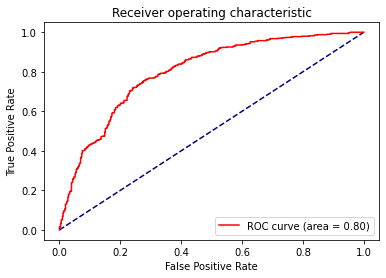

In [16]:
nbayes= GaussianNB(var_smoothing=1)
nbayes.fit(list(train["use"]), y_train)
y_pred_nbay = nbayes.predict(list(test["use"]))
y_prob_nbay = nbayes.predict_proba(list(test["use"]))[:,1]

evaluation_metrics.printResult(y_pred_nbay, y_prob_nbay, y_test)

In [17]:
keys = [model.upper() + ' PROB ' + str(num)  for model in model_list for num in [0,1]]
keys.append("ground_truth")
keys.insert(0, "file_name")
probs = dict((el,[]) for el in keys)
del keys

In [18]:
acc_dict = dict((el,[]) for el in [model.upper() + ' ACC' for model in model_list])
auc_dict = dict((el,[]) for el in [model.upper() + ' AUC' for model in model_list])

In [72]:
test_set

,file_name,misogynous,text,clean,use
0,belong_19,1,WHERE WOMEN\nBELONG\nvanzameme.org,woman belong,"[0.07461144030094147, -0.057359546422958374, 0..."
1,belong_21,1,SO YOU'RE TELLING ME WOMEN DON'T\nACTUALLY BEL...,you tell i woman actually belong kitchen weizwent,"[0.08591999113559723, -0.07485892623662949, 0...."
2,belong_26,1,WOMEN BELONG\nIN THE KITCHEN\nmakeameme.org,woman belong kitchen,"[0.08132456243038177, -0.05744284391403198, 0...."
3,belong_30,1,I like my coffee like I like my\nSoop women\ni...,i like my coffee like i like my soop woman kit...,"[0.09501771628856659, -0.02535725012421608, -0..."
4,belong_31,0,Not every place you fit in is where you\nbelong.,place you fit you belong,"[0.02262992411851883, 0.04453004524111748, -0...."
...,...,...,...,...,...
155,zipmeme_14,0,YOU MEAN TO TELL ME\nTHAT POPCORN DOESNT\nCOME...,you mean tell i popcorn doesnt come apricot tr...,"[-0.037665221840143204, 0.03782228007912636, -..."
156,zipmeme_16,1,WOMEN ARE TOO CLASSY TO WATCH PORN\nTHE NEW YO...,woman classy watch porn new york shade trogy f...,"[0.009740758687257767, -0.021898364648222923, ..."
157,zipmeme_19,0,"LOVE IS LIKE A FART\nIF YOU HAVE TO FORCE IT, ...",love like fart you force it it probably crap z...,"[-0.07143634557723999, -0.04137571156024933, -..."
158,zipmeme_4,1,SHE SAID SHE WAS HUNGRY\nVIA 9GAG.COM\nSO I GA...,she say she hungry gag com i she mcdick zipmeme,"[0.013615136966109276, -0.014982095919549465, ..."


### 10-fold to compute models perfomances

10-Fold cross validation approach on training data (9 folds for training models, 1 for test).
Both predicted probabilities and model performances are saved in csv files.

In [38]:
len(probs["file_name"])

1760

In [74]:
svm_probs_0 = []
svm_probs_1 = []
knn_probs_0 = []
knn_probs_1 = []
nb_probs_0 = []
nb_probs_1 = []
dt_probs_0 = []
dt_probs_1 = []
mlp_probs_0 = []
mlp_probs_1 = []
file_name = []

ground_truth = []

label_nb_complete=[]
label_svm_complete=[]
label_knn_complete=[]
label_dt_complete=[]
label_mlp_complete=[]


num_folds = 10
for key, val in kfold.items():
    train_ids = val["train"]
    test_ids = val["test"]
    # Print
    print(f'FOLD BMA {key}')

    # Define the K-fold Cross Validaton
    f_name = dataset.iloc[test_ids][["file_name"]]
    train_dataset =  dataset.iloc[train_ids][['use']]
    test_dataset = dataset.iloc[test_ids][["use"]]

    train = list(train_dataset["use"])
    test = list(test_dataset["use"])

    probs['file_name'].extend(list(f_name["file_name"]))

    labels_train =  dataset.iloc[train_ids][['misogynous']]
    labels_test = dataset.iloc[test_ids][['misogynous']]
    y_train = list(labels_train["misogynous"])
    y_test = list(labels_test["misogynous"])
    probs['ground_truth'].extend(y_test)

    # _____________________Naive Bayes_____________________
    naive_bayes= GaussianNB()
    naive_bayes.fit(train, y_train)
    labels_nb = naive_bayes.predict(test)
    label_prob_nb = naive_bayes.predict_proba(test)
    label_nb_complete = label_nb_complete + labels_nb.tolist()

    fpr_n, tpr_n, thresholds_n = roc_curve(y_test, label_prob_nb[:,1])

    acc_dict['NB ACC'].append(accuracy_score(y_test,labels_nb))
    auc_dict['NB AUC'].append(auc(fpr_n, tpr_n))

    nb_probs_0.extend(label_prob_nb[:,0])
    nb_probs_1.extend(label_prob_nb[:,1])

    #_____________________ Support Vector Machine_____________________
    svc = LinearSVC(C=10,  dual=False, loss="squared_hinge")
    svc = CalibratedClassifierCV(svc)
    svc.fit(train, y_train)
    labels_svm = svc.predict(test)
    label_prob_svm = svc.predict_proba(test)
    label_svm_complete = label_svm_complete + labels_svm.tolist()

    fpr_s, tpr_s, thresholds_s = roc_curve(y_test, label_prob_svm[:,1])

    acc_dict['SVM ACC'].append(accuracy_score(y_test,labels_svm))
    auc_dict['SVM AUC'].append(auc(fpr_s, tpr_s))

    svm_probs_0.extend(label_prob_svm[:,0])
    svm_probs_1.extend(label_prob_svm[:,1])

    #_____________________K-Nearest Neighbor_____________________
    knn = KNeighborsClassifier(n_neighbors=21)
    clf = knn.fit(train, y_train)
    labels_knn = clf.predict(test)
    label_prob_knn = clf.predict_proba(test)
    label_knn_complete = label_knn_complete + labels_knn.tolist()

    fpr_k, tpr_k, thresholds_k = roc_curve(y_test, label_prob_knn[:,1])

    acc_dict['KNN ACC'].append(accuracy_score(y_test,labels_knn))
    auc_dict['KNN AUC'].append(auc(fpr_k, tpr_k))

    knn_probs_0.extend(label_prob_knn[:, 0])
    knn_probs_1.extend(label_prob_knn[:, 1])

    #_____________________Decisioon Tree_____________________
    dtr = DecisionTreeClassifier(max_depth=3)
    dtr.fit(train, y_train)
    labels_dt = dtr.predict(test)
    label_prob_dt = dtr.predict_proba(test)
    label_dt_complete = label_dt_complete + labels_dt.tolist()

    fpr_d, tpr_d, thresholds_d = roc_curve(y_test, label_prob_dt[:,1])

    acc_dict['DT ACC'].append(accuracy_score(y_test,labels_dt))
    auc_dict['DT AUC'].append(auc(fpr_d, tpr_d))

    dt_probs_0.extend(label_prob_dt[:, 0])
    dt_probs_1.extend(label_prob_dt[:, 1])

    #_______________________________ Multilayer Percepron _______________________________
    mlp = MLPClassifier(max_iter=400, activation="relu", alpha=0.05, hidden_layer_sizes=(100,), solver="adam", learning_rate="constant")
    mlp.fit(train, y_train)
    labels_mlp = mlp.predict(test)
    label_prob_mlp = mlp.predict_proba(test)
    label_mlp_complete = label_mlp_complete + labels_mlp.tolist()

    fpr_m, tpr_m, thresholds_m = roc_curve(y_test, label_prob_mlp[:,1])

    acc_dict['MLP ACC'].append(accuracy_score(y_test,labels_mlp))
    auc_dict['MLP AUC'].append(auc(fpr_m, tpr_m))

    mlp_probs_0.extend(label_prob_mlp[:, 0])
    mlp_probs_1.extend(label_prob_mlp[:, 1])

for model in model_list:
    globals()['avg_auc_score_' + model.lower()] = mean(auc_dict[str(model) + ' AUC'])
    globals()['avg_acc_score_' + model.lower()] = mean(acc_dict[str(model) + ' ACC'])

results_svm = evaluation_metrics.compute_evaluation_metrics(probs['ground_truth'], label_svm_complete)
results_knn = evaluation_metrics.compute_evaluation_metrics(probs['ground_truth'], label_knn_complete)
results_nb = evaluation_metrics.compute_evaluation_metrics(probs['ground_truth'], label_nb_complete)
results_dt = evaluation_metrics.compute_evaluation_metrics(probs['ground_truth'], label_dt_complete)
results_mlp = evaluation_metrics.compute_evaluation_metrics(probs['ground_truth'], label_mlp_complete)

for key, value in probs.items():
    if key != 'file_name' and key != 'ground_truth':
        num = key.split(' ')[2]
        model = key.split(' ')[0].lower()
        probs[key] = globals()[model + '_probs_'+ str(num)]

FOLD BMA fold_1


/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


FOLD BMA fold_2


,file_name,misogynous,text,clean,use
0,belong_19,1,WHERE WOMEN\nBELONG\nvanzameme.org,woman belong,"[0.07461144030094147, -0.057359546422958374, 0..."
1,belong_21,1,SO YOU'RE TELLING ME WOMEN DON'T\nACTUALLY BEL...,you tell i woman actually belong kitchen weizwent,"[0.08591999113559723, -0.07485892623662949, 0...."
2,belong_26,1,WOMEN BELONG\nIN THE KITCHEN\nmakeameme.org,woman belong kitchen,"[0.08132456243038177, -0.05744284391403198, 0...."
3,belong_30,1,I like my coffee like I like my\nSoop women\ni...,i like my coffee like i like my soop woman kit...,"[0.09501771628856659, -0.02535725012421608, -0..."
4,belong_31,0,Not every place you fit in is where you\nbelong.,place you fit you belong,"[0.02262992411851883, 0.04453004524111748, -0...."
...,...,...,...,...,...
155,zipmeme_14,0,YOU MEAN TO TELL ME\nTHAT POPCORN DOESNT\nCOME...,you mean tell i popcorn doesnt come apricot tr...,"[-0.037665221840143204, 0.03782228007912636, -..."
156,zipmeme_16,1,WOMEN ARE TOO CLASSY TO WATCH PORN\nTHE NEW YO...,woman classy watch porn new york shade trogy f...,"[0.009740758687257767, -0.021898364648222923, ..."
157,zipmeme_19,0,"LOVE IS LIKE A FART\nIF YOU HAVE TO FORCE IT, ...",love like fart you force it it probably crap z...,"[-0.07143634557723999, -0.04137571156024933, -..."
158,zipmeme_4,1,SHE SAID SHE WAS HUNGRY\nVIA 9GAG.COM\nSO I GA...,she say she hungry gag com i she mcdick zipmeme,"[0.013615136966109276, -0.014982095919549465, ..."


In [20]:
data_probs = pd.DataFrame(probs)

# Crate a csv file with models predictions (probability) for every meme in the training set
data_probs.to_csv(project_paths.csv_uni_text_train_probs, sep="\t",index=False)
del probs
data_probs

,file_name,SVM PROB 0,SVM PROB 1,KNN PROB 0,KNN PROB 1,NB PROB 0,NB PROB 1,DT PROB 0,DT PROB 1,MLP PROB 0,MLP PROB 1,ground_truth
0,1.jpg,0.208735,0.791265,0.047619,0.952381,4.596399e-02,9.540360e-01,0.526190,0.473810,0.044548,0.955452,0
1,10000.jpg,0.328235,0.671765,0.285714,0.714286,3.057679e-07,9.999997e-01,0.186753,0.813247,0.053474,0.946526,0
2,1001.jpg,0.597796,0.402204,0.047619,0.952381,9.999307e-01,6.930894e-05,0.891393,0.108607,0.122340,0.877660,1
3,10016.jpg,0.931384,0.068616,0.809524,0.190476,1.000000e+00,1.392178e-08,0.718568,0.281432,0.999440,0.000560,1
4,10028.jpg,0.252183,0.747817,0.190476,0.809524,1.430791e-02,9.856921e-01,0.344023,0.655977,0.320430,0.679570,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9958.jpg,0.060113,0.939887,0.238095,0.761905,3.348557e-09,1.000000e+00,0.179518,0.820482,0.003257,0.996743,1
9996,9984.jpg,0.149129,0.850871,0.000000,1.000000,2.815817e-11,1.000000e+00,0.179518,0.820482,0.012354,0.987646,1
9997,9988.jpg,0.596961,0.403039,0.904762,0.095238,9.999959e-01,4.072809e-06,0.702540,0.297460,0.888197,0.111803,0
9998,9989.jpg,0.356050,0.643950,0.238095,0.761905,2.176895e-12,1.000000e+00,0.319234,0.680766,0.296147,0.703853,0


In [23]:
results_dict_list = ['results_' + model.lower() for model in model_list]
avg_auc_list = ['avg_auc_score_' + model.lower() for model in model_list]
avg_acc_list = ['avg_acc_score_' + model.lower() for model in model_list]

res = {
    "Modelli": model_list,
    "Prec 0": [],
    "Prec 1": [],
    "Prec": [],
    "Rec 0": [],
    "Rec 1": [],
    "Rec": [],
    "F1 0": [],
    "F1 1": [],
    "F1": [],
    "ACC": [],
    "AUC": [],
}

for model in model_list:
    tmp_dict = globals()[results_dict_list[model_list.index(model)]]
    res["Prec 0"]= res["Prec 0"]+[tmp_dict['precision'][0]]
    res["Prec 1"]= res["Prec 1"]+[tmp_dict['precision'][1]]
    res["Prec"]= res["Prec"] + [mean([res["Prec 0"][model_list.index(model)], res["Prec 1"][model_list.index(model)]])]

    res["Rec 0"] = res["Rec 0"]+[tmp_dict['recall'][0]]
    res["Rec 1"]= res["Rec 1"]+[tmp_dict['recall'][1]]
    res["Rec"]= res["Rec"] + [mean([res["Rec 0"][model_list.index(model)], res["Rec 1"][model_list.index(model)]])]

    res["F1 0"] = res["F1 0"]+[tmp_dict['f1'][0]]
    res["F1 1"]= res["F1 1"] +[tmp_dict['f1'][1]]
    res["F1"]= res["F1"] + [mean([res["F1 0"][model_list.index(model)], res["F1 1"][model_list.index(model)]])]

    res['ACC']= res['ACC']+ [globals()[avg_acc_list[model_list.index(model)]]]
    res['AUC']= res['AUC'] + [globals()[avg_auc_list[model_list.index(model)]]]

print(res)

{'Modelli': ['SVM', 'KNN', 'NB', 'DT', 'MLP'], 'Prec 0': [0.7732932589094031, 0.7379965457685665, 0.7732932589094031, 0.7232815964523281, 0.7910297666934835], 'Prec 1': [0.7383002620741296, 0.8273159144893112, 0.7383002620741296, 0.6834244080145719, 0.7877883850437549], 'Prec': [0.7557967604917664, 0.7826562301289388, 0.7557967604917664, 0.70335300223345, 0.7894090758686192], 'Rec 0': [0.7204, 0.8546, 0.7204, 0.6524, 0.7866], 'Rec 1': [0.7888, 0.6966, 0.7888, 0.7504, 0.7922], 'Rec': [0.7545999999999999, 0.7756000000000001, 0.7545999999999999, 0.7014, 0.7894], 'F1 0': [0.7459101263201492, 0.792029657089898, 0.7459101263201492, 0.6860147213459517, 0.7888086642599279], 'F1 1': [0.7627151421388513, 0.7563517915309447, 0.7627151421388513, 0.7153479504289799, 0.7899880335061829], 'F1': [0.7543126342295002, 0.7741907243104214, 0.7543126342295002, 0.7006813358874657, 0.7893983488830554], 'ACC': [0.7797000000000001, 0.7756000000000001, 0.7546, 0.7014, 0.7894], 'AUC': [0.8586742594766751, 0.8634

In [71]:
y_test

0      1
1      1
2      1
3      1
4      0
      ..
145    1
146    0
147    0
148    0
149    1
Name: ground_truth, Length: 150, dtype: int64

In [24]:
risultati = pd.DataFrame(res)
risultati

,Modelli,Prec 0,Prec 1,Prec,Rec 0,Rec 1,Rec,F1 0,F1 1,F1,ACC,AUC
0,SVM,0.773293,0.738300,0.755797,0.7204,0.7888,0.7546,0.745910,0.762715,0.754313,0.7797,0.858674
1,KNN,0.737997,0.827316,0.782656,0.8546,0.6966,0.7756,0.792030,0.756352,0.774191,0.7756,0.863428
2,NB,0.773293,0.738300,0.755797,0.7204,0.7888,0.7546,0.745910,0.762715,0.754313,0.7546,0.833107
3,DT,0.723282,0.683424,0.703353,0.6524,0.7504,0.7014,0.686015,0.715348,0.700681,0.7014,0.753438
4,MLP,0.791030,0.787788,0.789409,0.7866,0.7922,0.7894,0.788809,0.789988,0.789398,0.7894,0.871705


In [25]:
# Crate a csv file with averages model performance
risultati.to_csv(project_paths.csv_uni_text_train_res, sep='\t', index=False)

### BMA

Accuracy: 79.14

Confusion Matrix:
 [[3969 1031]
 [1055 3945]]
              precision    recall  f1-score   support

           0       0.79      0.79      0.79      5000
           1       0.79      0.79      0.79      5000

    accuracy                           0.79     10000
   macro avg       0.79      0.79      0.79     10000
weighted avg       0.79      0.79      0.79     10000

Area under the ROC curve : 0.874957
ACC BMA  0.7914
AUC BMA  0.8749568400000001
################  BMA #############################
ACC BMA  0.7914
AUC BMA  0.8749568400000001
precision class 1 of k fold BMA  0.7928054662379421
precision class 0 of kfold BMA  0.7900079617834395
recall class 1 k fold BMA 0.789
recall class 0 k fold BMA  0.7938
f1 pos BMA  0.7908981555733761
f1 neg BMA  0.7918994413407822


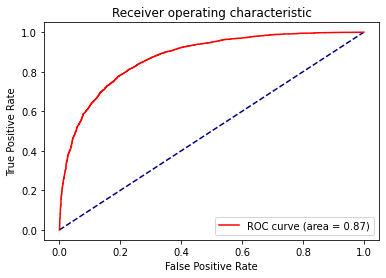

In [26]:
labels_bma = []
sum_prob0_bma =[]
sum_prob1_bma =[]
y_prob_auc = []
predictions_bma = []
tp_bma = []
tn_bma = []
fn_bma = []
fp_bma = []
auc_bma_list = []
acc_bma_list = []
y_test = data_probs["ground_truth"]

# split data according to the 10-fold partition adopted for the score computation
for j in range(0, 10):
    for i in range(j*1000, ((j*1000) + 1000)):
        marginale_0_ = (data_probs["SVM PROB 0"][i]* data_score["SCORE 0 SVM"][j]) + (data_probs["KNN PROB 0"][i]* data_score["SCORE 0 KNN"][j]) + (data_probs["NB PROB 0"][i]* data_score["SCORE 0 NB"][j]) +  (data_probs["DT PROB 0"][i]* data_score["SCORE 0 DT"][j]) +  (data_probs["MLP PROB 0"][i]* data_score["SCORE 0 MLP"][j])
        marginale_1_ = (data_probs["SVM PROB 1"][i]* data_score["SCORE 1 SVM"][j]) + (data_probs["KNN PROB 1"][i]* data_score["SCORE 1 KNN"][j]) + (data_probs["NB PROB 1"][i]* data_score["SCORE 1 NB"][j]) +  (data_probs["DT PROB 1"][i]* data_score["SCORE 1 DT"][j]) +  (data_probs["MLP PROB 1"][i]* data_score["SCORE 1 MLP"][j])
        label_norm_0, label_norm_1 = evaluation_metrics.normalize(marginale_0_,marginale_1_)
        sum_prob0_bma.append(label_norm_0)
        sum_prob1_bma.append(label_norm_1)

        y_prob_auc.append(marginale_1_)
        if label_norm_0 > label_norm_1:
          labels_bma.append(0)
        else:
          labels_bma.append(1)
predictions_bma.append(labels_bma)

fpr_bma, tpr_bma, thresholds_bma = roc_curve(y_test, y_prob_auc)
roc_auc_bma = auc(fpr_bma, tpr_bma)
evaluation_metrics.printResult(labels_bma, y_prob_auc, y_test)

auc_bma_list.append(roc_auc_bma)
acc_bma = accuracy_score(y_test,labels_bma)
print("ACC BMA ", acc_bma)
print("AUC BMA ", roc_auc_bma)
acc_bma_list.append(acc_bma)

bma_metrics = evaluation_metrics.compute_evaluation_metrics(y_test, labels_bma)

print("################  BMA #############################")
print("ACC BMA ", acc_bma)
print("AUC BMA ", roc_auc_bma)

print("precision class 1 of k fold BMA ", bma_metrics['precision'][0])
print("precision class 0 of kfold BMA ", bma_metrics['precision'][1])
print("recall class 1 k fold BMA", bma_metrics['recall'][0])
print("recall class 0 k fold BMA ", bma_metrics['recall'][1])
print("f1 pos BMA ", bma_metrics['f1'][0])
print("f1 neg BMA ", bma_metrics['f1'][1])

In [27]:
model_list = ["SVM", "KNN", "NB","DT", "MLP", "BMA"]

In [28]:
# Add BMA to res
res["Modelli"] = model_list
res["Prec 0"] = res["Prec 0"] + [ bma_metrics['precision'][0]]
res["Prec 1"] = res["Prec 1"] + [bma_metrics['precision'][1]]
res["Prec"] = res["Prec"] + [mean([res["Prec 0"][model_list.index('BMA')],res["Prec 1"][model_list.index('BMA')]])]

res["Rec 0"] = res["Rec 0"] + [bma_metrics['recall'][0]]
res["Rec 1"] = res["Rec 1"] + [bma_metrics['recall'][1]]
res["Rec"] = res["Rec"] + [mean([res["Rec 0"][model_list.index('BMA')],res["Rec 1"][model_list.index('BMA')]])]

res["F1 0"] = res["F1 0"] + [bma_metrics['f1'][0]]
res["F1 1"] = res["F1 1"] + [bma_metrics['f1'][1]]
res["F1"] = res["F1"] + [mean([bma_metrics['f1'][0], bma_metrics['f1'][1]])]

res["ACC"] = res["ACC"] + [acc_bma]
res["AUC"] = res["AUC"] + [roc_auc_bma]

In [29]:
risultati_bma = pd.DataFrame(res)
risultati_bma

,Modelli,Prec 0,Prec 1,Prec,Rec 0,Rec 1,Rec,F1 0,F1 1,F1,ACC,AUC
0,SVM,0.773293,0.738300,0.755797,0.7204,0.7888,0.7546,0.745910,0.762715,0.754313,0.7797,0.858674
1,KNN,0.737997,0.827316,0.782656,0.8546,0.6966,0.7756,0.792030,0.756352,0.774191,0.7756,0.863428
2,NB,0.773293,0.738300,0.755797,0.7204,0.7888,0.7546,0.745910,0.762715,0.754313,0.7546,0.833107
3,DT,0.723282,0.683424,0.703353,0.6524,0.7504,0.7014,0.686015,0.715348,0.700681,0.7014,0.753438
4,MLP,0.791030,0.787788,0.789409,0.7866,0.7922,0.7894,0.788809,0.789988,0.789398,0.7894,0.871705
5,BMA,0.792805,0.790008,0.791407,0.7890,0.7938,0.7914,0.790898,0.791899,0.791399,0.7914,0.874957


In [30]:
# rewrite the already created file in order to add BMA results
risultati_bma.to_csv(project_paths.csv_uni_text_train_res, sep="\t", index=False)

In [31]:
data_probs["BMA PROB 0"] = sum_prob0_bma
data_probs["BMA PROB 1"] = sum_prob1_bma
data_probs["BMA LABELS"] = labels_bma

In [32]:
data_probs

,file_name,SVM PROB 0,SVM PROB 1,KNN PROB 0,KNN PROB 1,NB PROB 0,NB PROB 1,DT PROB 0,DT PROB 1,MLP PROB 0,MLP PROB 1,ground_truth,BMA PROB 0,BMA PROB 1,BMA LABELS
0,1.jpg,0.208735,0.791265,0.047619,0.952381,4.596399e-02,9.540360e-01,0.526190,0.473810,0.044548,0.955452,0,0.166245,0.833755,1
1,10000.jpg,0.328235,0.671765,0.285714,0.714286,3.057679e-07,9.999997e-01,0.186753,0.813247,0.053474,0.946526,0,0.171026,0.828974,1
2,1001.jpg,0.597796,0.402204,0.047619,0.952381,9.999307e-01,6.930894e-05,0.891393,0.108607,0.122340,0.877660,1,0.519828,0.480172,0
3,10016.jpg,0.931384,0.068616,0.809524,0.190476,1.000000e+00,1.392178e-08,0.718568,0.281432,0.999440,0.000560,1,0.894628,0.105372,0
4,10028.jpg,0.252183,0.747817,0.190476,0.809524,1.430791e-02,9.856921e-01,0.344023,0.655977,0.320430,0.679570,0,0.222428,0.777572,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9958.jpg,0.060113,0.939887,0.238095,0.761905,3.348557e-09,1.000000e+00,0.179518,0.820482,0.003257,0.996743,1,0.095116,0.904884,1
9996,9984.jpg,0.149129,0.850871,0.000000,1.000000,2.815817e-11,1.000000e+00,0.179518,0.820482,0.012354,0.987646,1,0.065747,0.934253,1
9997,9988.jpg,0.596961,0.403039,0.904762,0.095238,9.999959e-01,4.072809e-06,0.702540,0.297460,0.888197,0.111803,0,0.819723,0.180277,0
9998,9989.jpg,0.356050,0.643950,0.238095,0.761905,2.176895e-12,1.000000e+00,0.319234,0.680766,0.296147,0.703853,0,0.241970,0.758030,1


In [33]:
# rewrite the already created file in order to add BMA results
data_probs.to_csv(project_paths.csv_uni_text_train_probs, sep="\t", index=False)

## Load Test Data

Per l’applicazione del BMA sui dati di Test è utilizzata un 10 time fold cross valida-
tion che divide in 10 splits i dati di training, alla fine di ogni iterazione viene effettuata
una predizione sul test con i classficatori baseline e le loro affidabilità per implementa-
re l’equazione del BMA sui dati di test. L’affidabilità in questo caso è ricavata dalle
performance dei classificatori negli split di validation.

In [2]:
#create folder 
save_folder = './results/test/'
if not os.path.exists(save_folder):
    os.makedirs(save_folder)

In [12]:
kfold = load_data.load_folds()

In [9]:
test_set = load_data.load_test_data()
test_set

,file_name,Text Transcription,misogynous
0,15236.jpg,FACEBOOK SINGLES GROUPS BELIKE WHEN A NEW WOMA...,0
1,15805.jpg,"SO, IF YOU'RE A FEMINIST HOW CAN YOU EAT DAIRY?",1
2,16254.jpg,WHEN A CUTE GIRL LEFT YOUR MESSAGE ON SEEN,0
3,16191.jpg,Photographing something you want to show every...,1
4,15952.jpg,HEY BABE CAN YOU MAKE ME A SANDWICH? Hey babe ...,0
...,...,...,...
995,15591.jpg,IT'S NOT YOUR FAULT You didn't design the dres...,1
996,15049.jpg,THINK ABOUT HOW MUCH BETTER HER SKIN IS BREATH...,0
997,15363.jpg,THE STEREOTYPES ARE TRUE F SHE DOES HAVE A TIG...,1
998,15199.jpg,DRAWS NAKED PICTURES OF BLACK WOMEN 00 0000 GE...,0


### Spacy preprocessing
Load training data as provided from the challenge organizers and create a CSV with clear text obtaied via preprocessing operations based on Spact Stanza lemmatization,

#### normal

In [ ]:
# perform preprocessing operation on text optained from OCR using Spacy Stanza
test_set.fillna('')
test_set['clean']= preprocessing.apply_lemmatization_stanza(test_set['Text Transcription'])

In [ ]:
test_set["clean"]= test_set.clean.fillna('')
test_set

In [ ]:
test_set.to_csv(project_paths.csv_path_test_Spacy, index=False, sep='\t')

#### masked

In [6]:
# perform preprocessing operation on text optained from OCR using Spacy Stanza
test_set.fillna('')
test_set['clean']= preprocessing.data_pre_processing_masking(test_set['Text Transcription'])

2023-07-21 15:28:40 INFO: Downloading default packages for language: en (English)...
2023-07-21 15:28:41 INFO: File exists: /home/jimmy/stanza_resources/en/default.zip.
2023-07-21 15:28:45 INFO: Finished downloading models and saved to /home/jimmy/stanza_resources.
2023-07-21 15:28:45 INFO: Loading these models for language: en (English):
| Processor    | Package   |
----------------------------
| tokenize     | combined  |
| pos          | combined  |
| lemma        | combined  |
| depparse     | combined  |
| sentiment    | sstplus   |
| constituency | wsj       |
| ner          | ontonotes |

2023-07-21 15:28:45 INFO: Use device: gpu
2023-07-21 15:28:45 INFO: Loading: tokenize
2023-07-21 15:28:48 INFO: Loading: pos
2023-07-21 15:28:48 INFO: Loading: lemma
2023-07-21 15:28:48 INFO: Loading: depparse
2023-07-21 15:28:49 INFO: Loading: sentiment
2023-07-21 15:28:49 INFO: Loading: constituency
2023-07-21 15:28:50 INFO: Loading: ner
2023-07-21 15:28:50 INFO: Done loading processors!
100%

In [8]:
test_set["clean"]= test_set.clean.fillna('')
test_set

,file_name,Text Transcription,misogynous,clean
0,15236.jpg,FACEBOOK SINGLES GROUPS BELIKE WHEN A NEW WOMA...,0,facebook singles group belike new woman join g...
1,15805.jpg,"SO, IF YOU'RE A FEMINIST HOW CAN YOU EAT DAIRY?",1,you feminist you eat dairy
2,16254.jpg,WHEN A CUTE GIRL LEFT YOUR MESSAGE ON SEEN,0,cute girl leave you message
3,16191.jpg,Photographing something you want to show every...,1,photograph something you want object male woma...
4,15952.jpg,HEY BABE CAN YOU MAKE ME A SANDWICH? Hey babe ...,0,hey babe you make i sandwich hey babe you make...
...,...,...,...,...
995,15591.jpg,IT'S NOT YOUR FAULT You didn't design the dres...,1,it you fault you didn design dress you didn bu...
996,15049.jpg,THINK ABOUT HOW MUCH BETTER HER SKIN IS BREATH...,0,think good she skin breathe makeup hide she fr...
997,15363.jpg,THE STEREOTYPES ARE TRUE F SHE DOES HAVE A TIG...,1,stereotype true f she tight pussy
998,15199.jpg,DRAWS NAKED PICTURES OF BLACK WOMEN 00 0000 GE...,0,draw naked picture black woman mad black woman...


In [14]:
test_set.iloc[6:,:]

,file_name,Text Transcription,misogynous,clean
6,15828.jpg,EXTREME RAPE The woman in this picture is goin...,1,extreme rape woman picture it hard [POS-MASK] ...
7,15905.jpg,"when ur mom says you shouldn't ""waste the day""...",0,you mom say you shouldn waste day watch netflix
8,15971.jpg,Women Women Women 0 Respect,1,woman woman woman respect
9,16197.jpg,YOU RAPE HER SHE KNOWS SHE ASKED FOR IT,1,you rape she she know she ask it
10,15916.jpg,Your computer has 20 viruses The are 40 hot mi...,0,you computer viruse hot milf you area
...,...,...,...,...
995,15591.jpg,IT'S NOT YOUR FAULT You didn't design the dres...,1,it you fault you didn design dress you didn bu...
996,15049.jpg,THINK ABOUT HOW MUCH BETTER HER SKIN IS BREATH...,0,think good she skin breathe makeup hide she fr...
997,15363.jpg,THE STEREOTYPES ARE TRUE F SHE DOES HAVE A TIG...,1,stereotype true f she tight pussy
998,15199.jpg,DRAWS NAKED PICTURES OF BLACK WOMEN 00 0000 GE...,0,draw naked picture black woman mad black woman...


In [27]:
test_set["clean"][820:]

820                                  you make i sandwich
821               search my son chocolate i eat night rd
822               man before man after lockdown lockdown
823              he good night message sweet cute you it
824           gordon ramsay man tell woman leave kitchen
                             ...                        
995    it you fault you didn design dress you didn bu...
996    think good she skin breathe makeup hide she fr...
997                    stereotype true f she tight pussy
998    draw naked picture black woman mad black woman...
999                      you work i ool i want rich ok p
Name: clean, Length: 180, dtype: object

In [11]:
test_set["Text Transcription"][6]

'EXTREME RAPE The woman in this picture is going to get it. Very hard. DIY.DESPAIR.COM'

In [12]:
test_set["clean"][6]

'extreme rape woman picture it hard despair com'

In [9]:
project_paths.csv_path_test_Spacy_masked

'../data/datasets/text_csv/test_Spacy_masked.csv'

In [28]:
test_set.to_csv(project_paths.csv_path_test_Spacy_masked, index=False, sep='\t')

#### censored

In [10]:
# perform preprocessing operation on text optained from OCR using Spacy Stanza
test_set.fillna('')
test_set['clean']= preprocessing.data_pre_processing_censored(test_set['Text Transcription'])

2023-07-21 16:22:53 INFO: Downloading default packages for language: en (English)...
2023-07-21 16:22:54 INFO: File exists: /home/jimmy/stanza_resources/en/default.zip.
2023-07-21 16:22:58 INFO: Finished downloading models and saved to /home/jimmy/stanza_resources.
2023-07-21 16:22:58 INFO: Loading these models for language: en (English):
| Processor    | Package   |
----------------------------
| tokenize     | combined  |
| pos          | combined  |
| lemma        | combined  |
| depparse     | combined  |
| sentiment    | sstplus   |
| constituency | wsj       |
| ner          | ontonotes |

2023-07-21 16:22:58 INFO: Use device: gpu
2023-07-21 16:22:58 INFO: Loading: tokenize
2023-07-21 16:23:00 INFO: Loading: pos
2023-07-21 16:23:01 INFO: Loading: lemma
2023-07-21 16:23:01 INFO: Loading: depparse
2023-07-21 16:23:01 INFO: Loading: sentiment
2023-07-21 16:23:01 INFO: Loading: constituency
2023-07-21 16:23:02 INFO: Loading: ner
2023-07-21 16:23:02 INFO: Done loading processors!
100%

In [ ]:
test_set["clean"]= test_set.clean.fillna('')
test_set

In [13]:
project_paths.csv_path_test_Spacy_censored

'../data/datasets/text_csv/test_Spacy_censored.csv'

In [14]:
test_set.to_csv(project_paths.csv_path_test_Spacy_censored, index=False, sep='\t')

### Sentence embedding

In [10]:
test_set = load_data.load_test_data_Spacy()
test_set

,file_name,Text Transcription,misogynous,clean
0,15236.jpg,FACEBOOK SINGLES GROUPS BELIKE WHEN A NEW WOMA...,0,facebook singles group belike new woman join g...
1,15805.jpg,"SO, IF YOU'RE A FEMINIST HOW CAN YOU EAT DAIRY?",1,you feminist you eat dairy
2,16254.jpg,WHEN A CUTE GIRL LEFT YOUR MESSAGE ON SEEN,0,cute girl leave you message
3,16191.jpg,Photographing something you want to show every...,1,photograph something you want object male woma...
4,15952.jpg,HEY BABE CAN YOU MAKE ME A SANDWICH? Hey babe ...,0,hey babe you make I sandwich hey babe you make...
...,...,...,...,...
995,15591.jpg,IT'S NOT YOUR FAULT You didn't design the dres...,1,it you fault you didn design dress you didn bu...
996,15049.jpg,THINK ABOUT HOW MUCH BETTER HER SKIN IS BREATH...,0,think good she skin breathe makeup hide she fr...
997,15363.jpg,THE STEREOTYPES ARE TRUE F SHE DOES HAVE A TIG...,1,stereotype true f she tight pussy
998,15199.jpg,DRAWS NAKED PICTURES OF BLACK WOMEN 00 0000 GE...,0,draw naked picture black woman mad black woman...


#### masked

In [11]:
test_set = pd.read_csv(project_paths.csv_path_test_Spacy_masked, sep="\t")
test_set

,file_name,Text Transcription,misogynous,clean
0,15236.jpg,FACEBOOK SINGLES GROUPS BELIKE WHEN A NEW WOMA...,0,facebook singles group belike new woman join g...
1,15805.jpg,"SO, IF YOU'RE A FEMINIST HOW CAN YOU EAT DAIRY?",1,you feminist you eat dairy
2,16254.jpg,WHEN A CUTE GIRL LEFT YOUR MESSAGE ON SEEN,0,cute girl leave you message
3,16191.jpg,Photographing something you want to show every...,1,photograph something you want object male woma...
4,15952.jpg,HEY BABE CAN YOU MAKE ME A SANDWICH? Hey babe ...,0,hey babe you make i sandwich hey babe you make...
...,...,...,...,...
995,15591.jpg,IT'S NOT YOUR FAULT You didn't design the dres...,1,it you fault you didn design dress you didn bu...
996,15049.jpg,THINK ABOUT HOW MUCH BETTER HER SKIN IS BREATH...,0,think good she skin breathe makeup hide she fr...
997,15363.jpg,THE STEREOTYPES ARE TRUE F SHE DOES HAVE A TIG...,1,stereotype true f she tight pussy
998,15199.jpg,DRAWS NAKED PICTURES OF BLACK WOMEN 00 0000 GE...,0,draw naked picture black woman mad black woman...


#### censored

In [13]:
test_set = pd.read_csv(project_paths.csv_path_test_Spacy_censored, sep="\t")
test_set

,file_name,Text Transcription,misogynous,clean
0,15236.jpg,FACEBOOK SINGLES GROUPS BELIKE WHEN A NEW WOMA...,0,facebook singles group belike new woman join g...
1,15805.jpg,"SO, IF YOU'RE A FEMINIST HOW CAN YOU EAT DAIRY?",1,you feminist you eat dairy
2,16254.jpg,WHEN A CUTE GIRL LEFT YOUR MESSAGE ON SEEN,0,cute girl leave you message
3,16191.jpg,Photographing something you want to show every...,1,photograph something you want object male woma...
4,15952.jpg,HEY BABE CAN YOU MAKE ME A SANDWICH? Hey babe ...,0,hey babe you make i sandwich hey babe you make...
...,...,...,...,...
995,15591.jpg,IT'S NOT YOUR FAULT You didn't design the dres...,1,it you fault you didn design dress you didn bu...
996,15049.jpg,THINK ABOUT HOW MUCH BETTER HER SKIN IS BREATH...,0,think good she skin breathe makeup hide she fr...
997,15363.jpg,THE STEREOTYPES ARE TRUE F SHE DOES HAVE A TIG...,1,stereotype true f she tight pussy
998,15199.jpg,DRAWS NAKED PICTURES OF BLACK WOMEN 00 0000 GE...,0,draw naked picture black woman mad black woman...


In [32]:
print(test_set["Text Transcription"][369])
print(test_set["clean"][369])

IF A WOMAN HITS YOU QUICKLY SHOUT IDENTIFY AS WOMEN" AND THEN HIT HER BACK BY DOING THIS NO WHITE KNIGHT CAN ATTACK YOU BACK BECAUSE A WOMAN HITTING WOMAN IS TOTALLY OK
woman hit you quickly shout woman hit she white knight attack you woman hit woman totally ok


In [33]:

text_embeddings = preprocessing.use_preprocessing(test_set, 'clean')
test_set["use"] = text_embeddings
del text_embeddings
test_set

,file_name,Text Transcription,misogynous,clean,use
0,15236.jpg,FACEBOOK SINGLES GROUPS BELIKE WHEN A NEW WOMA...,0,facebook singles group belike new woman join g...,"[0.006883811205625534, 0.03840116411447525, -0..."
1,15805.jpg,"SO, IF YOU'RE A FEMINIST HOW CAN YOU EAT DAIRY?",1,you feminist you eat dairy,"[0.03098355419933796, -0.032946448773145676, 0..."
2,16254.jpg,WHEN A CUTE GIRL LEFT YOUR MESSAGE ON SEEN,0,cute girl leave you message,"[0.06193098798394203, -0.002088995184749365, -..."
3,16191.jpg,Photographing something you want to show every...,1,photograph something you want object male woma...,"[-0.04320474714040756, 0.026460036635398865, 0..."
4,15952.jpg,HEY BABE CAN YOU MAKE ME A SANDWICH? Hey babe ...,0,hey babe you make i sandwich hey babe you make...,"[-0.046663038432598114, -0.07546315342187881, ..."
...,...,...,...,...,...
995,15591.jpg,IT'S NOT YOUR FAULT You didn't design the dres...,1,it you fault you didn design dress you didn bu...,"[0.03914935141801834, 0.03866203501820564, 0.0..."
996,15049.jpg,THINK ABOUT HOW MUCH BETTER HER SKIN IS BREATH...,0,think good she skin breathe makeup hide she fr...,"[0.015582832507789135, -0.014933424070477486, ..."
997,15363.jpg,THE STEREOTYPES ARE TRUE F SHE DOES HAVE A TIG...,1,stereotype true f she tight pussy,"[0.00021868168551009148, -0.013178713619709015..."
998,15199.jpg,DRAWS NAKED PICTURES OF BLACK WOMEN 00 0000 GE...,0,draw naked picture black woman mad black woman...,"[0.027067240327596664, 0.0034978424664586782, ..."


## Models on Test Data

### Kfold to compute F1-reliability
Train and test of the models on training data in 10 Fold to compute F1 scores.
The scores will be used in the realization of BMA model.

In [34]:
keys = ['SCORE ' + str(num) + ' ' + model.upper()  for model in model_list for num in [0,1]]
scores = dict((el,[]) for el in keys)
del keys

In [35]:
test_complete = []
y_pred_svm = []
y_pred_knn = []
y_pred_nb = []
y_pred_dt = []
y_pred_mlp = []

k_folds = 10
num_folds = 10
for key, val in kfold.items():

  train_ids = val["train"]
  test_ids = val["test"]
  # Print
  print(f'FOLD BMA {key}')

  train_fold = dataset.iloc[train_ids][["use"]]
  test_fold = dataset.iloc[test_ids][["use"]]
  train_f = list(train_fold["use"])
  test_f = list(test_fold["use"])
  targets_train =  dataset.iloc[train_ids][['misogynous']]
  targets_test = dataset.iloc[test_ids][['misogynous']]  
  target_train = list(targets_train["misogynous"])
  target_test = list(targets_test["misogynous"])

  test_complete = test_complete + target_test

  #_______________________________ SVM_______________________________
  svc = LinearSVC(C=10,  dual=False, loss="squared_hinge")
  svc = CalibratedClassifierCV(svc)
  svc.fit(train_f, target_train)
  y_pred_svm = y_pred_svm + svc.predict(test_f).tolist()

  #_______________________________ KNN_______________________________
  knn = KNeighborsClassifier(n_neighbors=21)
  clf = knn.fit(train_f, target_train)
  y_pred_knn = y_pred_knn +  clf.predict(test_f).tolist()
  
  #_______________________________ NB_______________________________
  naive_bayes= GaussianNB()
  naive_bayes.fit(train_f, target_train)
  y_pred_nb = y_pred_nb + naive_bayes.predict(test_f).tolist()

  #_______________________________ DT_______________________________
  dtr = DecisionTreeClassifier(max_depth=3)
  dtr.fit(train_f, target_train)
  y_pred_dt = y_pred_dt + dtr.predict(test_f).tolist()
 
  #_______________________________ MLP_______________________________
  mlp = MLPClassifier(max_iter=400, activation="relu", alpha=0.05, hidden_layer_sizes=(100,), solver="adam", learning_rate="constant")
  mlp.fit(train_f, target_train)
  y_pred_mlp = y_pred_mlp + mlp.predict(test_f).tolist()


  #_______________________________ RESULTS_______________________________
  svm_results = evaluation_metrics.compute_evaluation_metrics(y_pred_svm, test_complete)
  knn_results = evaluation_metrics.compute_evaluation_metrics(y_pred_knn, test_complete)
  nb_results = evaluation_metrics.compute_evaluation_metrics(y_pred_nb, test_complete)
  dt_results = evaluation_metrics.compute_evaluation_metrics(y_pred_dt, test_complete)
  mlp_results = evaluation_metrics.compute_evaluation_metrics(y_pred_mlp, test_complete)
  

  for key, value in scores.items():
      if key != 'FOLD':
          num = key.split(' ')[1]
          model = key.split(' ')[2].lower()
          value.append(globals()[model + '_results']['f1'][int(num)])
          
data_score= pd.DataFrame(scores)


test_complete = []
y_pred_svm = []
y_pred_knn = []
y_pred_nb = []
y_pred_dt = []
y_pred_mlp = []

k_folds = 10
num_folds = 10
for key, val in kfold.items():

  train_ids = val["train"]
  test_ids = val["test"]
  # Print
  print(f'FOLD BMA {key}')

  train_fold = dataset.iloc[train_ids][["use"]]
  test_fold = dataset.iloc[test_ids][["use"]]
  train_f = list(train_fold["use"])
  test_f = list(test_fold["use"])
  targets_train =  dataset.iloc[train_ids][['misogynous']]
  targets_test = dataset.iloc[test_ids][['misogynous']]  
  target_train = list(targets_train["misogynous"])
  target_test = list(targets_test["misogynous"])

  test_complete = test_complete + target_test

  #_______________________________ SVM_______________________________
  svc = LinearSVC(C=10,  dual=False, loss="squared_hinge")
  svc = CalibratedClassifierCV(svc)
  svc.fit(train_f, target_train)
  y_pred_svm = y_pred_svm + svc.predict(test_f).tolist()

  #_______________________________ KNN_______________________________
  knn = KNeighborsClassifier(n_neighbors=21)
  clf = knn.fit(train_f, target_train)
  y_pred_knn = y_pred_knn +  clf.predict(test_f).tolist()
  
  #_______________________________ NB_______________________________
  naive_bayes= GaussianNB()
  naive_bayes.fit(train_f, target_train)
  y_pred_nb = y_pred_nb + naive_bayes.predict(test_f).tolist()

  #_______________________________ DT_______________________________
  dtr = DecisionTreeClassifier(max_depth=3)
  dtr.fit(train_f, target_train)
  y_pred_dt = y_pred_dt + dtr.predict(test_f).tolist()
 
  #_______________________________ MLP_______________________________
  mlp = MLPClassifier(max_iter=400, activation="relu", alpha=0.05, hidden_layer_sizes=(100,), solver="adam", learning_rate="constant")
  mlp.fit(train_f, target_train)
  y_pred_mlp = y_pred_mlp + mlp.predict(test_f).tolist()
  
  #_______________________________ RESULTS_______________________________
  svm_results = evaluation_metrics.compute_evaluation_metrics(y_pred_svm, test_complete)
  knn_results = evaluation_metrics.compute_evaluation_metrics(y_pred_knn, test_complete)
  nb_results = evaluation_metrics.compute_evaluation_metrics(y_pred_nb, test_complete)
  dt_results = evaluation_metrics.compute_evaluation_metrics(y_pred_dt, test_complete)
  mlp_results = evaluation_metrics.compute_evaluation_metrics(y_pred_mlp, test_complete)


  for key, value in scores.items():
      if key != 'FOLD':
          num = key.split(' ')[1]
          model = key.split(' ')[2].lower()
          value.append(globals()[model + '_results']['f1'][int(num)])
          
data_score= pd.DataFrame(scores)

FOLD BMA fold_1
FOLD BMA fold_2
FOLD BMA fold_3
FOLD BMA fold_4
FOLD BMA fold_5
FOLD BMA fold_6
FOLD BMA fold_7
FOLD BMA fold_8
FOLD BMA fold_9
FOLD BMA fold_10


In [36]:
data_score

,SCORE 0 SVM,SCORE 1 SVM,SCORE 0 KNN,SCORE 1 KNN,SCORE 0 NB,SCORE 1 NB,SCORE 0 DT,SCORE 1 DT,SCORE 0 MLP,SCORE 1 MLP
0,0.784390,0.773333,0.797445,0.754425,0.756048,0.759921,0.668099,0.710945,0.800781,0.790984
1,0.770149,0.767839,0.780734,0.737363,0.734609,0.751814,0.668438,0.705382,0.787084,0.790882
2,0.766070,0.763246,0.782236,0.740037,0.733958,0.753930,0.673729,0.708333,0.785190,0.785476
3,0.765252,0.767239,0.781019,0.742935,0.728751,0.753104,0.672599,0.700646,0.785089,0.785411
4,0.765203,0.768375,0.781832,0.746759,0.731615,0.754926,0.674068,0.702258,0.782591,0.783805
5,0.769024,0.772615,0.782946,0.747748,0.733589,0.756696,0.678179,0.705601,0.785247,0.787738
6,0.769737,0.770263,0.782413,0.745232,0.737671,0.757017,0.677679,0.702473,0.785418,0.785724
7,0.770252,0.770997,0.784719,0.749053,0.739990,0.759268,0.683932,0.702270,0.784991,0.785259
8,0.771188,0.769248,0.783128,0.745411,0.738971,0.755594,0.683689,0.699252,0.783927,0.782289
9,0.772700,0.771698,0.786179,0.750704,0.741424,0.758960,0.684917,0.700107,0.785629,0.784770


In [15]:
data_score

,SCORE 0 SVM,SCORE 1 SVM,SCORE 0 KNN,SCORE 1 KNN,SCORE 0 NB,SCORE 1 NB,SCORE 0 DT,SCORE 1 DT,SCORE 0 MLP,SCORE 1 MLP
0,0.791059,0.778579,0.800363,0.755011,0.762386,0.767557,0.684266,0.716049,0.820076,0.798729
1,0.779273,0.777722,0.791229,0.747653,0.737006,0.756262,0.679325,0.711027,0.797648,0.789178
2,0.776338,0.774992,0.788415,0.744853,0.738013,0.758488,0.676325,0.711041,0.787220,0.782051
3,0.775151,0.777833,0.785253,0.745355,0.733386,0.757930,0.665766,0.712259,0.785411,0.785089
4,0.773737,0.778218,0.786350,0.750000,0.735140,0.759305,0.668238,0.709786,0.782854,0.785530
5,0.775490,0.781106,0.787270,0.750859,0.738241,0.761662,0.674903,0.709189,0.785882,0.789421
6,0.775047,0.777794,0.787046,0.749650,0.742339,0.762023,0.682328,0.709854,0.788616,0.789098
7,0.776533,0.779695,0.789608,0.754134,0.745481,0.764529,0.683158,0.713333,0.788122,0.789126
8,0.776677,0.777322,0.789198,0.751483,0.743828,0.759875,0.682142,0.710937,0.785683,0.784537
9,0.779015,0.780381,0.792030,0.756352,0.745910,0.762715,0.686015,0.715348,0.786993,0.787206


#### normal

In [16]:
# Crate a csv file with models performance achieved in every fold on training data
data_score.to_csv(project_paths.csv_uni_text_test_scores, sep="\t", index=False)

#### masked

In [21]:
project_paths.csv_uni_text_test_masked_scores

'../data/results2strategy/text/masked_test/score_test_text10fold.csv'

In [22]:
data_score.to_csv(project_paths.csv_uni_text_test_masked_scores, sep="\t", index=False)

#### censored

In [37]:
project_paths.csv_uni_text_test_censored_scores

'../data/results2strategy/text/censored_test/score_test_text10fold.csv'

In [38]:
data_score.to_csv(project_paths.csv_uni_text_test_censored_scores, sep="\t", index=False)

### 10-fold to compute model performance
Train the model on training data, test on test data

In [39]:
keys = [model.upper() + ' PROB ' + str(num)  for model in model_list for num in [0,1]]
keys.append("ground_truth")
keys.insert(0, "file_name")

In [40]:
probs = dict((el,[]) for el in keys)
probs
del keys

{'file_name': [],
 'SVM PROB 0': [],
 'SVM PROB 1': [],
 'KNN PROB 0': [],
 'KNN PROB 1': [],
 'NB PROB 0': [],
 'NB PROB 1': [],
 'DT PROB 0': [],
 'DT PROB 1': [],
 'MLP PROB 0': [],
 'MLP PROB 1': [],
 'ground_truth': []}

In [41]:
acc_dict = dict((el,[]) for el in [model.upper() + ' ACC' for model in model_list])
auc_dict = dict((el,[]) for el in [model.upper() + ' AUC' for model in model_list])

In [42]:
svm_probs_0 = []
svm_probs_1 = []
knn_probs_0 = []
knn_probs_1 = []
nb_probs_0 = []
nb_probs_1 = []
dt_probs_0 = []
dt_probs_1 = []
mlp_probs_0 = []
mlp_probs_1 = []
file_name = []

ground_truth = []

label_nb_complete=[]
label_svm_complete=[]
label_knn_complete=[]
label_dt_complete=[]
label_mlp_complete=[]

num_folds = 10
test = list(test_set["use"])
y_test = list(test_set["misogynous"])
file_names = list(test_set["file_name"])
ground_truth = y_test

for key, val in kfold.items():
  # Print
  print(f'FOLD BMA {key}')
  
  # Define the K-fold Cross Validaton
  dataset = dataset.sample(frac=1).reset_index(drop=True)  #return all rows (in random order)

  train = list(dataset["use"])
  y_train = list(dataset["misogynous"])
  probs['ground_truth'].extend(y_test)
  probs['file_name'].extend(file_names)
  
  # _____________________Naive Bayes_____________________
  naive_bayes= GaussianNB()
  naive_bayes.fit(train, y_train)
  labels_nb = naive_bayes.predict(test)
  label_prob_nb = naive_bayes.predict_proba(test)
  label_nb_complete = label_nb_complete + labels_nb.tolist()

  fpr_n, tpr_n, thresholds_n = roc_curve(y_test, label_prob_nb[:,1])
  
  acc_dict['NB ACC'].append(accuracy_score(y_test,labels_nb))
  auc_dict['NB AUC'].append(auc(fpr_n, tpr_n))
  
  nb_probs_0.extend(label_prob_nb[:,0])
  nb_probs_1.extend(label_prob_nb[:,1])

  #_____________________ Support Vector Machine_____________________
  svc = LinearSVC(C=10,  dual=False, loss="squared_hinge")
  svc = CalibratedClassifierCV(svc)
  svc.fit(train, y_train)
  labels_svm = svc.predict(test)
  label_prob_svm = svc.predict_proba(test)
  label_svm_complete = label_svm_complete + labels_svm.tolist()
  
  fpr_s, tpr_s, thresholds_s = roc_curve(y_test, label_prob_svm[:,1])

  acc_dict['SVM ACC'].append(accuracy_score(y_test,labels_svm))
  auc_dict['SVM AUC'].append(auc(fpr_s, tpr_s))

  svm_probs_0.extend(label_prob_svm[:,0])
  svm_probs_1.extend(label_prob_svm[:,1])

  #_____________________K-Nearest Neighbor_____________________
  knn = KNeighborsClassifier(n_neighbors=21)
  clf = knn.fit(train, y_train)
  labels_knn = clf.predict(test)
  label_prob_knn = clf.predict_proba(test)
  label_knn_complete = label_knn_complete + labels_knn.tolist()

  fpr_k, tpr_k, thresholds_k = roc_curve(y_test, label_prob_knn[:,1])
  
  acc_dict['KNN ACC'].append(accuracy_score(y_test,labels_knn))
  auc_dict['KNN AUC'].append(auc(fpr_k, tpr_k))

  knn_probs_0.extend(label_prob_knn[:, 0])
  knn_probs_1.extend(label_prob_knn[:, 1])

  #_____________________Decisioon Tree_____________________
  dtr = DecisionTreeClassifier(max_depth=3)
  dtr.fit(train, y_train)
  labels_dt = dtr.predict(test)
  label_prob_dt = dtr.predict_proba(test)
  label_dt_complete = label_dt_complete + labels_dt.tolist()

  fpr_d, tpr_d, thresholds_d = roc_curve(y_test, label_prob_dt[:,1])

  acc_dict['DT ACC'].append(accuracy_score(y_test,labels_dt))
  auc_dict['DT AUC'].append(auc(fpr_d, tpr_d))

  dt_probs_0.extend(label_prob_dt[:, 0])
  dt_probs_1.extend(label_prob_dt[:, 1])

  #_______________________________ Multilayer Percepron _______________________________
  mlp = MLPClassifier(max_iter=400, activation="relu", alpha=0.05, hidden_layer_sizes=(100,), solver="adam", learning_rate="constant")
  mlp.fit(train, y_train)
  labels_mlp = mlp.predict(test)
  label_prob_mlp = mlp.predict_proba(test)
  label_mlp_complete = label_mlp_complete + labels_mlp.tolist()

  fpr_m, tpr_m, thresholds_m = roc_curve(y_test, label_prob_mlp[:,1])

  acc_dict['MLP ACC'].append(accuracy_score(y_test,labels_mlp))
  auc_dict['MLP AUC'].append(auc(fpr_m, tpr_m))

  mlp_probs_0.extend(label_prob_mlp[:, 0])
  mlp_probs_1.extend(label_prob_mlp[:, 1])

for model in model_list:
    globals()['avg_auc_score_' + model.lower()] = mean(auc_dict[str(model) + ' AUC'])
    globals()['avg_acc_score_' + model.lower()] = mean(acc_dict[str(model) + ' ACC'])

results_svm = evaluation_metrics.compute_evaluation_metrics(probs['ground_truth'], label_svm_complete)
results_knn = evaluation_metrics.compute_evaluation_metrics(probs['ground_truth'], label_knn_complete)
results_nb = evaluation_metrics.compute_evaluation_metrics(probs['ground_truth'], label_nb_complete)
results_dt = evaluation_metrics.compute_evaluation_metrics(probs['ground_truth'], label_dt_complete)
results_mlp = evaluation_metrics.compute_evaluation_metrics(probs['ground_truth'], label_mlp_complete)

for key, value in probs.items():
    if key != 'file_name' and key != 'ground_truth':
        num = key.split(' ')[2]
        model = key.split(' ')[0].lower()
        probs[key] = globals()[model + '_probs_'+ str(num)]

global_results = dict((el,[]) for el in [model for model in model_list])
for model in model_list:
  global_results[model] = [
    globals()['results_' + model.lower()]['precision'],
    globals()['results_' + model.lower()]['recall'],
    globals()['results_' + model.lower()]['f1'],
    [globals()['avg_acc_score_' + model.lower()]],
    [globals()['avg_auc_score_' + model.lower()]]
  ]

FOLD BMA fold_1
FOLD BMA fold_2
FOLD BMA fold_3
FOLD BMA fold_4
FOLD BMA fold_5
FOLD BMA fold_6
FOLD BMA fold_7
FOLD BMA fold_8
FOLD BMA fold_9
FOLD BMA fold_10


In [ ]:
svm_probs_0 = []
svm_probs_1 = []
knn_probs_0 = []
knn_probs_1 = []
nb_probs_0 = []
nb_probs_1 = []
dt_probs_0 = []
dt_probs_1 = []
mlp_probs_0 = []
mlp_probs_1 = []
file_name = []

ground_truth = []

label_nb_complete=[]
label_svm_complete=[]
label_knn_complete=[]
label_dt_complete=[]
label_mlp_complete=[]

num_folds = 10
test = list(test_set["use"])
y_test = list(test_set["misogynous"])
file_names = list(test_set["file_name"])
ground_truth = y_test

for key, val in kfold.items():
  # Print
  print(f'FOLD BMA {key}')
  
  # Define the K-fold Cross Validaton
  #dataset = dataset.sample(frac=1).reset_index(drop=True)  #return all rows (in random order)
  #train_fold = dataset.iloc[train_ids][["use"]]
  #train =  list(train_fold["use"])#list(dataset["use"])
  #y_train =# list(dataset["misogynous"])
  probs['ground_truth'].extend(y_test)
  probs['file_name'].extend(file_names)
  
  # _____________________Naive Bayes_____________________
  #naive_bayes= GaussianNB()
  #naive_bayes.fit(train, y_train)
  naive_bayes = load_pickle("models_checkpoints/nby_"+key+".pickle")
  labels_nb = naive_bayes.predict(test)
  label_prob_nb = naive_bayes.predict_proba(test)
  label_nb_complete = label_nb_complete + labels_nb.tolist()

  fpr_n, tpr_n, thresholds_n = roc_curve(y_test, label_prob_nb[:,1])
  
  acc_dict['NB ACC'].append(accuracy_score(y_test,labels_nb))
  auc_dict['NB AUC'].append(auc(fpr_n, tpr_n))
  
  nb_probs_0.extend(label_prob_nb[:,0])
  nb_probs_1.extend(label_prob_nb[:,1])

  #_____________________ Support Vector Machine_____________________
  svc = load_pickle("models_checkpoints/svc_"+key+".pickle")
  labels_svm = svc.predict(test)
  label_prob_svm = svc.predict_proba(test)
  label_svm_complete = label_svm_complete + labels_svm.tolist()
  
  fpr_s, tpr_s, thresholds_s = roc_curve(y_test, label_prob_svm[:,1])

  acc_dict['SVM ACC'].append(accuracy_score(y_test,labels_svm))
  auc_dict['SVM AUC'].append(auc(fpr_s, tpr_s))

  svm_probs_0.extend(label_prob_svm[:,0])
  svm_probs_1.extend(label_prob_svm[:,1])

  #_____________________K-Nearest Neighbor_____________________
  clf = load_pickle("models_checkpoints/knn_"+key+".pickle")
  labels_knn = clf.predict(test)
  label_prob_knn = clf.predict_proba(test)
  label_knn_complete = label_knn_complete + labels_knn.tolist()

  fpr_k, tpr_k, thresholds_k = roc_curve(y_test, label_prob_knn[:,1])
  
  acc_dict['KNN ACC'].append(accuracy_score(y_test,labels_knn))
  auc_dict['KNN AUC'].append(auc(fpr_k, tpr_k))

  knn_probs_0.extend(label_prob_knn[:, 0])
  knn_probs_1.extend(label_prob_knn[:, 1])

  #_____________________Decisioon Tree_____________________
  dtr = load_pickle("models_checkpoints/dtr_"+key+".pickle")
  labels_dt = dtr.predict(test)
  label_prob_dt = dtr.predict_proba(test)
  label_dt_complete = label_dt_complete + labels_dt.tolist()

  fpr_d, tpr_d, thresholds_d = roc_curve(y_test, label_prob_dt[:,1])

  acc_dict['DT ACC'].append(accuracy_score(y_test,labels_dt))
  auc_dict['DT AUC'].append(auc(fpr_d, tpr_d))

  dt_probs_0.extend(label_prob_dt[:, 0])
  dt_probs_1.extend(label_prob_dt[:, 1])

  #_______________________________ Multilayer Percepron _______________________________
  mlp = load_pickle("models_checkpoints/mlp_"+key+".pickle")
  labels_mlp = mlp.predict(test)
  label_prob_mlp = mlp.predict_proba(test)
  label_mlp_complete = label_mlp_complete + labels_mlp.tolist()

  fpr_m, tpr_m, thresholds_m = roc_curve(y_test, label_prob_mlp[:,1])

  acc_dict['MLP ACC'].append(accuracy_score(y_test,labels_mlp))
  auc_dict['MLP AUC'].append(auc(fpr_m, tpr_m))

  mlp_probs_0.extend(label_prob_mlp[:, 0])
  mlp_probs_1.extend(label_prob_mlp[:, 1])

for model in model_list:
    globals()['avg_auc_score_' + model.lower()] = mean(auc_dict[str(model) + ' AUC'])
    globals()['avg_acc_score_' + model.lower()] = mean(acc_dict[str(model) + ' ACC'])

results_svm = evaluation_metrics.compute_evaluation_metrics(probs['ground_truth'], label_svm_complete)
results_knn = evaluation_metrics.compute_evaluation_metrics(probs['ground_truth'], label_knn_complete)
results_nb = evaluation_metrics.compute_evaluation_metrics(probs['ground_truth'], label_nb_complete)
results_dt = evaluation_metrics.compute_evaluation_metrics(probs['ground_truth'], label_dt_complete)
results_mlp = evaluation_metrics.compute_evaluation_metrics(probs['ground_truth'], label_mlp_complete)

for key, value in probs.items():
    if key != 'file_name' and key != 'ground_truth':
        num = key.split(' ')[2]
        model = key.split(' ')[0].lower()
        probs[key] = globals()[model + '_probs_'+ str(num)]

global_results = dict((el,[]) for el in [model for model in model_list])
for model in model_list:
  global_results[model] = [
    globals()['results_' + model.lower()]['precision'],
    globals()['results_' + model.lower()]['recall'],
    globals()['results_' + model.lower()]['f1'],
    [globals()['avg_acc_score_' + model.lower()]],
    [globals()['avg_auc_score_' + model.lower()]]
  ]

In [43]:
data_probs = pd.DataFrame(probs)
data_probs

,file_name,SVM PROB 0,SVM PROB 1,KNN PROB 0,KNN PROB 1,NB PROB 0,NB PROB 1,DT PROB 0,DT PROB 1,MLP PROB 0,MLP PROB 1,ground_truth
0,15236.jpg,0.155910,0.844090,0.380952,0.619048,1.059000e-03,0.998941,0.211769,0.788231,0.276278,0.723722,0
1,15805.jpg,0.087078,0.912922,0.000000,1.000000,2.876384e-09,1.000000,0.211769,0.788231,0.001855,0.998145,1
2,16254.jpg,0.156435,0.843565,0.333333,0.666667,1.642450e-05,0.999984,0.211769,0.788231,0.325698,0.674302,0
3,16191.jpg,0.394404,0.605596,0.190476,0.809524,4.992378e-05,0.999950,0.211769,0.788231,0.026541,0.973459,1
4,15952.jpg,0.132597,0.867403,0.095238,0.904762,7.803249e-05,0.999922,0.211769,0.788231,0.034271,0.965729,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15591.jpg,0.046182,0.953818,0.142857,0.857143,3.246822e-06,0.999997,0.367824,0.632176,0.001145,0.998855,1
9996,15049.jpg,0.063040,0.936960,0.047619,0.952381,8.695915e-05,0.999913,0.367824,0.632176,0.002089,0.997911,0
9997,15363.jpg,0.037421,0.962579,0.238095,0.761905,2.906318e-11,1.000000,0.211769,0.788231,0.009816,0.990184,1
9998,15199.jpg,0.348120,0.651880,0.238095,0.761905,1.178406e-04,0.999882,0.367824,0.632176,0.109875,0.890125,0


#### normal

In [22]:
# Crate a csv file with models predictions (probability) for every meme in the test set
data_probs.to_csv(project_paths.csv_uni_text_test_probs, sep="\t", index=False)   

#### masked

In [28]:
project_paths.csv_uni_text_test_masked_probs

'../data/results2strategy/text/masked_test/probs_test_all_fold.csv'

In [30]:
data_probs.to_csv(project_paths.csv_uni_text_test_masked_probs, sep="\t", index=False)

#### censored

In [44]:
project_paths.csv_uni_text_test_censored_probs

'../data/results2strategy/text/censored_test/probs_test_all_fold.csv'

In [45]:
data_probs.to_csv(project_paths.csv_uni_text_test_censored_probs, sep="\t", index=False)

### BMA

#### normal

In [28]:
predictions_bma = []
auc_bma_list = []
acc_bma_list = []
rec_pos = []
rec_neg = []
prec_pos = []
prec_neg = []
f1_pos = []
f1_neg = []
verit_assoluta = []

y_test_complete = []
labels_bma_complete=[]

data_score =  pd.read_csv(project_paths.csv_uni_text_test_scores, sep="\t")
for j in range(0, 10):
    sum_prob0_bma =[]
    sum_prob1_bma =[]
    data_probs = pd.read_csv(project_paths.csv_uni_text_test_probs, sep="\t")[j*1000: j*1000+1000].reset_index()
    y_test = data_probs["ground_truth"]
    labels_bma = []
    y_prob_auc = []
    for i in range(0,1000):
        marginale_0_ = (data_probs["SVM PROB 0"][i]* data_score["SCORE 0 SVM"][j]) + (data_probs["KNN PROB 0"][i]* data_score["SCORE 0 KNN"][j]) + (data_probs["NB PROB 0"][i]* data_score["SCORE 0 NB"][j]) +  (data_probs["DT PROB 0"][i]* data_score["SCORE 0 DT"][j]) +  (data_probs["MLP PROB 0"][i]* data_score["SCORE 0 MLP"][j])
        marginale_1_ = (data_probs["SVM PROB 1"][i]* data_score["SCORE 1 SVM"][j]) + (data_probs["KNN PROB 1"][i]* data_score["SCORE 1 KNN"][j]) + (data_probs["NB PROB 1"][i]* data_score["SCORE 1 NB"][j]) +  (data_probs["DT PROB 1"][i]* data_score["SCORE 1 DT"][j]) +  (data_probs["MLP PROB 1"][i]* data_score["SCORE 1 MLP"][j])
        label_norm_0, label_norm_1 = evaluation_metrics.normalize(marginale_0_,marginale_1_)
        sum_prob0_bma.append(label_norm_0)
        sum_prob1_bma.append(label_norm_1)

        y_prob_auc.append(marginale_1_)
        if label_norm_0 > label_norm_1:
          labels_bma.append(0)
        else:
          labels_bma.append(1)

    data_probs["BMA PROB 0"] = sum_prob0_bma
    data_probs["BMA PROB 1"] = sum_prob1_bma
    data_probs["BMA LABELS"] = labels_bma
    
    results = evaluation_metrics.compute_evaluation_metrics(y_test, labels_bma)

    rec_pos.append(results['recall'][0]) 
    rec_neg.append(results['recall'][1]) 
    f1_pos.append(results['f1'][0])   
    f1_neg.append(results['f1'][1])
    prec_pos.append( results['precision'][0])
    prec_neg.append(results['precision'][1])
    
    fpr_bma, tpr_bma, thresholds_bma = roc_curve(y_test, y_prob_auc)
    roc_auc_bma = auc(fpr_bma, tpr_bma)

    auc_bma_list.append(roc_auc_bma)
    acc_bma = accuracy_score(y_test,labels_bma)
    #print("ACC BMA ", acc_bma)
    #print("AUC BMA ", roc_auc_bma)
    acc_bma_list.append(acc_bma)
    predictions_bma.append(labels_bma)
    verit_assoluta.append(y_test)

verit_assoluta = [item for sublist in verit_assoluta for item in sublist]
predictions_bma = [item for sublist in predictions_bma for item in sublist]

print("################  BMA #############################")
print("ACC BMA ", acc_bma_list)
print("ACC BMA ", sum(acc_bma_list)/10)
print("AUC BMA ", auc_bma_list)
print("AUC BMA ", sum(auc_bma_list)/10)

print("precision class 1 of k fold BMA ", mean(prec_pos))
print("precision class 0 of kfold BMA ", mean(prec_neg))
print("prec ", mean([mean(prec_pos), mean(prec_neg)]))

print("recall class 1 k fold BMA", mean(rec_pos))
print("recall class 0 k fold BMA ", mean(rec_neg))
print("rec ", mean([mean(rec_pos),mean(rec_neg)]))

print("f1 pos BMA ", mean(f1_pos))
print("f1 neg BMA ", mean(f1_neg))
print("f1 ", mean([ mean(f1_pos), mean(f1_neg)]))

################  BMA #############################
ACC BMA  [0.653, 0.658, 0.652, 0.653, 0.658, 0.656, 0.654, 0.66, 0.659, 0.654]
ACC BMA  0.6557000000000001
AUC BMA  [0.731992, 0.7308239999999999, 0.7305519999999999, 0.728764, 0.729224, 0.729192, 0.7320960000000001, 0.7309159999999999, 0.731212, 0.729648]
AUC BMA  0.7304419999999999
precision class 1 of k fold BMA  0.6253855051421839
precision class 0 of kfold BMA  0.7053657773507289
prec  0.6653756412464564
recall class 1 k fold BMA 0.7766000000000001
recall class 0 k fold BMA  0.5348
rec  0.6557000000000001
f1 pos BMA  0.6928342665591812
f1 neg BMA  0.6083449523646487
f1  0.650589609461915


In [11]:
def bma_test(data_score_path, data_probs_path, result_path):
  predictions_bma = []
  auc_bma_list = []
  acc_bma_list = []
  rec_pos = []
  rec_neg = []
  prec_pos = []
  prec_neg = []
  f1_pos = []
  f1_neg = []
  verit_assoluta = []
  y_test_complete = []
  labels_bma_complete=[]
  data_score =  pd.read_csv(data_score_path, sep="\t")
  for j in range(0, 10):
      sum_prob0_bma =[]
      sum_prob1_bma =[]
      data_probs = pd.read_csv(data_probs_path, sep="\t")[j*1000: j*1000+1000].reset_index()
      y_test = data_probs["ground_truth"]
      labels_bma = []
      y_prob_auc = []
      for i in range(0,1000):
          marginale_0_ = (data_probs["SVM PROB 0"][i]* data_score["SCORE 0 SVM"][j]) + (data_probs["KNN PROB 0"][i]* data_score["SCORE 0 KNN"][j]) + (data_probs["NB PROB 0"][i]* data_score["SCORE 0 NB"][j]) +  (data_probs["DT PROB 0"][i]* data_score["SCORE 0 DT"][j]) +  (data_probs["MLP PROB 0"][i]* data_score["SCORE 0 MLP"][j])
          marginale_1_ = (data_probs["SVM PROB 1"][i]* data_score["SCORE 1 SVM"][j]) + (data_probs["KNN PROB 1"][i]* data_score["SCORE 1 KNN"][j]) + (data_probs["NB PROB 1"][i]* data_score["SCORE 1 NB"][j]) +  (data_probs["DT PROB 1"][i]* data_score["SCORE 1 DT"][j]) +  (data_probs["MLP PROB 1"][i]* data_score["SCORE 1 MLP"][j])
          label_norm_0, label_norm_1 = evaluation_metrics.normalize(marginale_0_,marginale_1_)
          sum_prob0_bma.append(label_norm_0)
          sum_prob1_bma.append(label_norm_1)

          y_prob_auc.append(marginale_1_)
          if label_norm_0 > label_norm_1:
            labels_bma.append(0)
          else:
            labels_bma.append(1)

      data_probs["BMA PROB 0"] = sum_prob0_bma
      data_probs["BMA PROB 1"] = sum_prob1_bma
      data_probs["BMA LABELS"] = labels_bma
      data_probs.to_csv(result_path+str(j+1)+".csv", sep="\t")
      results = evaluation_metrics.compute_evaluation_metrics(y_test, labels_bma)

      rec_pos.append(results['recall'][0]) 
      rec_neg.append(results['recall'][1]) 
      f1_pos.append(results['f1'][0])   
      f1_neg.append(results['f1'][1])
      prec_pos.append( results['precision'][0])
      prec_neg.append(results['precision'][1])

      fpr_bma, tpr_bma, thresholds_bma = roc_curve(y_test, y_prob_auc)
      roc_auc_bma = auc(fpr_bma, tpr_bma)

      auc_bma_list.append(roc_auc_bma)
      acc_bma = accuracy_score(y_test,labels_bma)
      #print("ACC BMA ", acc_bma)
      #print("AUC BMA ", roc_auc_bma)
      acc_bma_list.append(acc_bma)
      predictions_bma.append(labels_bma)
      verit_assoluta.append(y_test)

  verit_assoluta = [item for sublist in verit_assoluta for item in sublist]
  predictions_bma = [item for sublist in predictions_bma for item in sublist]

  print("################  BMA #############################")
  print("ACC BMA ", acc_bma_list)
  print("ACC BMA ", sum(acc_bma_list)/10)
  print("AUC BMA ", auc_bma_list)
  print("AUC BMA ", sum(auc_bma_list)/10)

  print("precision class 1 of k fold BMA ", mean(prec_pos))
  print("precision class 0 of kfold BMA ", mean(prec_neg))
  print("prec ", mean([mean(prec_pos), mean(prec_neg)]))

  print("recall class 1 k fold BMA", mean(rec_pos))
  print("recall class 0 k fold BMA ", mean(rec_neg))
  print("rec ", mean([mean(rec_pos),mean(rec_neg)]))

  print("f1 pos BMA ", mean(f1_pos))
  print("f1 neg BMA ", mean(f1_neg))
  print("f1 ", mean([ mean(f1_pos), mean(f1_neg)]))
  #j = 0
  #for i in range(0,10):
  #    
  #    j+=len(test_set)
      
  #print(verit_assoluta)
  #print([mean(prec_pos),  mean(prec_neg), mean(rec_pos), mean(rec_neg), mean(f1_pos), mean(f1_neg), sum(acc_bma_list)/10,  sum(auc_bma_list)/10])
  #print(predictions_bma)
  return [mean(prec_pos),  mean(prec_neg), mean(rec_pos), mean(rec_neg), mean(f1_pos), mean(f1_neg), sum(acc_bma_list)/10,  sum(auc_bma_list)/10], verit_assoluta, predictions_bma

#### masked

In [32]:
project_paths.csv_uni_text_test_masked_scores

'../data/results2strategy/text/masked_test/score_test_text10fold.csv'

In [17]:
project_paths.csv_uni_tags_test_masked_probs_all

'../data/results2strategy/tags/masked_test/probs_test_all_fold.csv'

In [23]:
probb = pd.read_csv(project_paths.csv_uni_tags_test_masked_probs_all, sep="\t")
probb

,file_name,SVM PROB 0,SVM PROB 1,KNN PROB 0,KNN PROB 1,NB PROB 0,NB PROB 1,DT PROB 0,DT PROB 1,MLP PROB 0,MLP PROB 1,ground_truth
0,15236.jpg,0.506184,0.493816,0.608696,0.391304,0.544457,0.455543,0.712662,0.287338,0.424713,0.575287,0
1,15805.jpg,0.274828,0.725172,0.304348,0.695652,0.421031,0.578969,0.245731,0.754269,0.109148,0.890852,1
2,16254.jpg,0.656576,0.343424,0.695652,0.304348,0.581981,0.418019,0.666547,0.333453,0.844965,0.155035,0
3,16191.jpg,0.711145,0.288855,0.521739,0.478261,0.575802,0.424198,0.666547,0.333453,0.716860,0.283140,1
4,15952.jpg,0.373823,0.626177,0.304348,0.695652,0.389770,0.610230,0.140042,0.859958,0.154526,0.845474,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15591.jpg,0.541686,0.458314,0.260870,0.739130,0.533950,0.466050,0.400722,0.599278,0.201064,0.798936,1
9996,15049.jpg,0.337007,0.662993,0.086957,0.913043,0.434024,0.565976,0.245731,0.754269,0.081137,0.918863,0
9997,15363.jpg,0.262276,0.737724,0.173913,0.826087,0.415344,0.584656,0.245731,0.754269,0.046766,0.953234,1
9998,15199.jpg,0.704452,0.295548,0.695652,0.304348,0.485973,0.514027,0.761329,0.238671,0.599803,0.400197,0


In [3]:
project_paths.csv_uni_tags_test_masked_probs_all

'../data/results2strategy/tags/masked_test/probs_test_all_fold.csv'

In [8]:
project_paths.csv_uni_tags_test_masked_probs_all

'../data/results2strategy/tags/masked_test/probs_test_all_fold.csv'

In [13]:
project_paths.csv_uni_tags_test_masked_scores

'../data/results2strategy/tags/masked_test/score_test_tags10fold.csv'

################  BMA #############################
ACC BMA  [0.607, 0.603, 0.611, 0.61, 0.599, 0.613, 0.602, 0.614, 0.608, 0.618]
ACC BMA  0.6085
AUC BMA  [0.666076, 0.66124, 0.6657799999999999, 0.6641520000000001, 0.6686679999999999, 0.669708, 0.6653479999999999, 0.6623720000000001, 0.6665760000000001, 0.66742]
AUC BMA  0.665734
precision class 1 of k fold BMA  0.5869014013513562
precision class 0 of kfold BMA  0.6445640418909828
prec  0.6157327216211694
recall class 1 k fold BMA 0.7332
recall class 0 k fold BMA  0.4838
rec  0.6085
f1 pos BMA  0.6518990427713393
f1 neg BMA  0.552625248418996
f1  0.6022621455951676


In [ ]:
bma_res, verit_assoluta, predictions_bma = bma_test(project_paths.csv_uni_tags_test_masked_scores, project_paths.csv_uni_tags_test_masked_probs_all, project_paths.csv_uni_tags_test_masked_probs_folds)

In [24]:
j = 0
for i in range(0,10):
    probb.iloc[j:j+1000].to_csv(project_paths.csv_uni_tags_test_masked_probs_folds+str(i+1)+".csv", sep="\t")
    j+=1000

In [34]:
bma_res, verit_assoluta, predictions_bma = bma_test(project_paths.csv_uni_text_test_masked_scores, project_paths.csv_uni_text_test_masked_probs, "../data/results2strategy/text/masked_test/probs_test_fold_")

################  BMA #############################
ACC BMA  [0.653, 0.656, 0.658, 0.646, 0.657, 0.655, 0.657, 0.656, 0.658, 0.652]
ACC BMA  0.6548
AUC BMA  [0.730696, 0.732056, 0.7316959999999999, 0.7321159999999999, 0.733016, 0.73064, 0.7328359999999999, 0.73332, 0.732804, 0.733244]
AUC BMA  0.7322424
precision class 1 of k fold BMA  0.6233473224398205
precision class 0 of kfold BMA  0.7078449572581623
prec  0.6655961398489914
recall class 1 k fold BMA 0.7824
recall class 0 k fold BMA  0.5272
rec  0.6548
f1 pos BMA  0.69386432988798
f1 neg BMA  0.6042834688044383
f1  0.6490738993462091


#### censored

In [47]:
project_paths.csv_uni_text_test_censored_scores

'../data/results2strategy/text/censored_test/score_test_text10fold.csv'

In [48]:
project_paths.csv_uni_text_test_censored_probs

'../data/results2strategy/text/censored_test/probs_test_all_fold.csv'

In [50]:
bma_res, verit_assoluta, predictions_bma = bma_test(project_paths.csv_uni_text_test_censored_scores, project_paths.csv_uni_text_test_censored_probs, "../data/results2strategy/text/censored_test/probs_test_fold_")

################  BMA #############################
ACC BMA  [0.652, 0.659, 0.647, 0.662, 0.659, 0.654, 0.654, 0.661, 0.656, 0.656]
ACC BMA  0.6559999999999999
AUC BMA  [0.729576, 0.7282399999999999, 0.7299720000000001, 0.7298720000000001, 0.7313320000000001, 0.7292999999999998, 0.7297279999999999, 0.729916, 0.729776, 0.730248]
AUC BMA  0.729796
precision class 1 of k fold BMA  0.6248367704526367
precision class 0 of kfold BMA  0.7079486755385569
prec  0.6663927229955968
recall class 1 k fold BMA 0.7808
recall class 0 k fold BMA  0.5312
rec  0.656
f1 pos BMA  0.6941565389459057
f1 neg BMA  0.6069461803598841
f1  0.6505513596528949


In [52]:
tp_bma = []
tn_bma = []
fn_bma = []
fp_bma = []
predictions_bma_dfs = np.array_split(predictions_bma, 10)
for df in predictions_bma_dfs:
    tn, fp, fn, tp = confusion_matrix(df, y_test).ravel()
    tp_bma.append(tp)
    tn_bma.append(tn)
    fn_bma.append(fn)
    fp_bma.append(fp)

[Text(0, 0.5, 'not misogynous'), Text(0, 1.5, 'misogynous')]

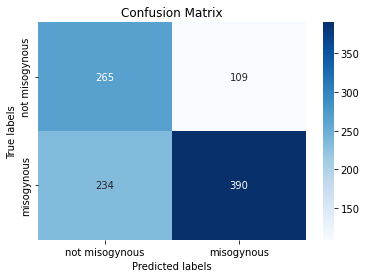

In [53]:
ax= plt.subplot()
sns.heatmap([[mean(tn_bma), mean(fp_bma)],[mean(fn_bma), mean(tp_bma)]], annot=True, fmt='g', cmap="Blues", ax=ax); 

#sns.heatmap([[mean(tn_bma), mean(fp_bma)],[mean(fn_bma), mean(tp_bma)]], annot=True, fmt='g', cmap="Blues", ax=ax); 

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['not misogynous', 'misogynous']); ax.yaxis.set_ticklabels(['not misogynous', 'misogynous'])

In [54]:
measures = ["Prec pos","Prec neg","Rec pos","Rec neg","F1 pos","F1 neg", "ACC", "AUC"]

res_bma = {"measures": measures, 
       "SVM": [item for sublist in global_results['SVM'] for item in sublist] ,
       "KNN":  [item for sublist in global_results['KNN'] for item in sublist] ,
       "NB":  [item for sublist in global_results['NB'] for item in sublist] ,
       "DT":  [item for sublist in global_results['DT'] for item in sublist] ,
       "MLP":  [item for sublist in global_results['MLP'] for item in sublist] ,
       "BMA": bma_res
       }

In [55]:
risultati = pd.DataFrame(res_bma)
risultati

,measures,SVM,KNN,NB,DT,MLP,BMA
0,Prec pos,0.620475,0.600000,0.623693,0.594096,0.614689,0.624837
1,Prec neg,0.702601,0.738983,0.666667,0.611354,0.705046,0.707949
2,Rec pos,0.778200,0.846000,0.716000,0.644000,0.788400,0.780800
3,Rec neg,0.524000,0.436000,0.568000,0.560000,0.505800,0.531200
4,F1 pos,0.690445,0.702075,0.666667,0.618042,0.690791,0.694157
5,F1 neg,0.600298,0.548428,0.613391,0.584551,0.589030,0.606946
6,ACC,0.651100,0.641000,0.642000,0.602000,0.647100,0.656000
7,AUC,0.712540,0.718710,0.697840,0.626730,0.720076,0.729796


In [33]:
risultati = pd.DataFrame(res_bma)
risultati

,measures,SVM,KNN,NB,DT,MLP,BMA
0,Prec pos,0.629371,0.599715,0.629371,0.590426,0.622436,0.625386
1,Prec neg,0.672897,0.734899,0.672897,0.616972,0.711906,0.705366
2,Rec pos,0.720000,0.842000,0.720000,0.666000,0.789000,0.776600
3,Rec neg,0.576000,0.438000,0.576000,0.538000,0.521400,0.534800
4,F1 pos,0.671642,0.700499,0.671642,0.625940,0.695890,0.692834
5,F1 neg,0.620690,0.548872,0.620690,0.574786,0.601940,0.608345
6,ACC,0.720520,0.715053,0.701072,0.628170,0.721452,0.655700
7,AUC,0.656000,0.640000,0.648000,0.602000,0.655200,0.730442


In [34]:
# Crate a csv file with averages model performances on test data
risultati.to_csv(project_paths.csv_uni_text_test_res, sep="\t", index= False)

#### masked

In [41]:
project_paths.csv_uni_text_test_masked_res

'../data/results2strategy/text/masked_test/text_res_bma_test2202.csv'

In [42]:
risultati.to_csv(project_paths.csv_uni_text_test_masked_res, sep="\t", index= False)

#### censored

In [57]:
project_paths.csv_uni_text_test_censored_res

'../data/results2strategy/text/censored_test/text_res_bma_test2202.csv'

In [58]:
risultati.to_csv(project_paths.csv_uni_text_test_censored_res, sep="\t", index= False)

In [ ]:
# Crate a csv file with models predictions (probability) for every meme in the test set
data_probs.to_csv(project_paths.csv_uni_text_test_probs, sep="\t", index=False)   

## Load Synthetic Data

Per l’applicazione del BMA sui dati di Test è utilizzata un 10 time fold cross valida-
tion che divide in 10 splits i dati di training, alla fine di ogni iterazione viene effettuata
una predizione sul test con i classficatori baseline e le loro affidabilità per implementa-
re l’equazione del BMA sui dati di test. L’affidabilità in questo caso è ricavata dalle
performance dei classificatori negli split di validation.

In [10]:
#create folder 
if not os.path.exists(project_paths.folder_res_syn):
    os.makedirs(project_paths.folder_res_syn)

In [4]:
test_set = load_data.load_new_syn_data()
test_set

,Unnamed: 0,0,misogynous,1,tag list,text,cleaned,lemmas,Unnamed: 0.1.1.1
0,0,belong_19,1,"[{'class': 'Man', 'conf': 0.896746814250946, '...","['Letter', 'Face', 'Column', 'Food', 'Mouth', ...",WHERE WOMEN\nBELONG\nvanzameme.org,woman belong,"['woman', 'belong']",NaN
1,1,belong_21,1,"[{'class': 'Hair', 'conf': 0.9521085023880005,...","['Woman', 'Face', 'Shoulder', 'Mouth', 'Wall',...",SO YOU'RE TELLING ME WOMEN DON'T\nACTUALLY BEL...,you tell i woman actually belong kitchen weizwent,"['you', 'tell', 'i', 'woman', 'actually', 'bel...",NaN
2,2,belong_26,1,"[{'class': 'Man', 'conf': 0.876247763633728, '...","['Letter', 'Face', 'Lip', 'Mouth', 'Shoulder',...",WOMEN BELONG\nIN THE KITCHEN\nmakeameme.org,woman belong kitchen,"['woman', 'belong', 'kitchen']",NaN
3,3,belong_30,1,"[{'class': 'Shirt', 'conf': 0.8054261803627014...","['Writing', 'Boy', 'Design', 'Ear', 'Nose', 'S...",I like my coffee like I like my\nSoop women\ni...,i like my coffee like i like my soop woman kit...,"['i', 'like', 'my', 'coffee', 'like', 'i', 'li...",NaN
4,4,belong_31,0,"[{'class': 'Bottom', 'conf': 0.938902318477630...","['Ground', 'Stem', 'Stripe', 'Onion', 'Shadow'...",Not every place you fit in is where you\nbelong.,place you fit you belong,"['place', 'you', 'fit', 'you', 'belong']",NaN
...,...,...,...,...,...,...,...,...,...
359,365,whisker_5,0,"[{'class': 'Cat', 'conf': 0.9676588177680969, ...","['Cat', 'Nose', 'Fur', 'Stripe', 'Face', 'Eye'...",NICE TO SEE YOU. NICE TO SEE YOU.\nRD,nice you nice you rd,"['nice', 'you', 'nice', 'you', 'rd']",136.0
360,366,whisker_6,0,"[{'class': 'Cat', 'conf': 0.8915164470672607, ...","['Cat', 'Nose', 'Eye', 'Ear', 'Whisker', 'Head...",IS IT NORMAL FOR MY CAT\nTO HAVE LONG WHISKERS...,it normal my cat long whisker,"['it', 'normal', 'my', 'cat', 'long', 'whisker']",137.0
361,367,whisker_7,0,"[{'class': 'Ear', 'conf': 0.9311652779579163, ...","['Cat', 'Nose', 'Face', 'Wall', 'Hair', 'Eye',...",Why Are My Cats Whiskers So Long,my cat whisker long,"['my', 'cat', 'whisker', 'long']",138.0
362,368,whisker_8,0,"[{'class': 'Eye', 'conf': 0.9018651843070984, ...","['Bucket', 'Paw', 'Cat', 'Nose', 'Plant', 'Fur...",This humidity is killing my hair!,humidity kill my hair,"['humidity', 'kill', 'my', 'hair']",139.0


In [5]:
syn_df = load_data.load_new_syn_data()
syn_df

,Unnamed: 0,0,misogynous,1,tag list,text,cleaned,lemmas,Unnamed: 0.1.1.1
0,0,belong_19,1,"[{'class': 'Man', 'conf': 0.896746814250946, '...","['Letter', 'Face', 'Column', 'Food', 'Mouth', ...",WHERE WOMEN\nBELONG\nvanzameme.org,woman belong,"['woman', 'belong']",NaN
1,1,belong_21,1,"[{'class': 'Hair', 'conf': 0.9521085023880005,...","['Woman', 'Face', 'Shoulder', 'Mouth', 'Wall',...",SO YOU'RE TELLING ME WOMEN DON'T\nACTUALLY BEL...,you tell i woman actually belong kitchen weizwent,"['you', 'tell', 'i', 'woman', 'actually', 'bel...",NaN
2,2,belong_26,1,"[{'class': 'Man', 'conf': 0.876247763633728, '...","['Letter', 'Face', 'Lip', 'Mouth', 'Shoulder',...",WOMEN BELONG\nIN THE KITCHEN\nmakeameme.org,woman belong kitchen,"['woman', 'belong', 'kitchen']",NaN
3,3,belong_30,1,"[{'class': 'Shirt', 'conf': 0.8054261803627014...","['Writing', 'Boy', 'Design', 'Ear', 'Nose', 'S...",I like my coffee like I like my\nSoop women\ni...,i like my coffee like i like my soop woman kit...,"['i', 'like', 'my', 'coffee', 'like', 'i', 'li...",NaN
4,4,belong_31,0,"[{'class': 'Bottom', 'conf': 0.938902318477630...","['Ground', 'Stem', 'Stripe', 'Onion', 'Shadow'...",Not every place you fit in is where you\nbelong.,place you fit you belong,"['place', 'you', 'fit', 'you', 'belong']",NaN
...,...,...,...,...,...,...,...,...,...
359,365,whisker_5,0,"[{'class': 'Cat', 'conf': 0.9676588177680969, ...","['Cat', 'Nose', 'Fur', 'Stripe', 'Face', 'Eye'...",NICE TO SEE YOU. NICE TO SEE YOU.\nRD,nice you nice you rd,"['nice', 'you', 'nice', 'you', 'rd']",136.0
360,366,whisker_6,0,"[{'class': 'Cat', 'conf': 0.8915164470672607, ...","['Cat', 'Nose', 'Eye', 'Ear', 'Whisker', 'Head...",IS IT NORMAL FOR MY CAT\nTO HAVE LONG WHISKERS...,it normal my cat long whisker,"['it', 'normal', 'my', 'cat', 'long', 'whisker']",137.0
361,367,whisker_7,0,"[{'class': 'Ear', 'conf': 0.9311652779579163, ...","['Cat', 'Nose', 'Face', 'Wall', 'Hair', 'Eye',...",Why Are My Cats Whiskers So Long,my cat whisker long,"['my', 'cat', 'whisker', 'long']",138.0
362,368,whisker_8,0,"[{'class': 'Eye', 'conf': 0.9018651843070984, ...","['Bucket', 'Paw', 'Cat', 'Nose', 'Plant', 'Fur...",This humidity is killing my hair!,humidity kill my hair,"['humidity', 'kill', 'my', 'hair']",139.0


In [6]:
import re

def add_subgroup_columns_from_text(df, text_column, subgroups):
    """Adds a boolean column for each subgroup to the data frame.

      New column contains True if the text contains that subgroup term.
      """
    for term in subgroups:
        if term == "blond":
            df[term] = df[text_column].apply(lambda x: bool(
                re.search('\\b' + term + '\\b | \\b'+ term+ 'e\\b', str(x), flags=re.UNICODE | re.IGNORECASE)))
        # pylint: disable=cell-var-from-loop
        else:
            df[term] = df[text_column].apply(lambda x: bool(
                re.search('\\b' + term + '\\b', str(x), flags=re.UNICODE | re.IGNORECASE)))

In [7]:
identity_terms = ['demotivational', 'dishwasher', 'promotion', 'whore', 'chick', 'motivate', 'chloroform', 'blond', 'diy', 'belong','mcdonald', 'ambulance', 'communism', 'anti', 'valentine', 'developer', 'template', 'weak', 'zipmeme', 'identify']

In [10]:
add_subgroup_columns_from_text(syn_df, 'cleaned', identity_terms)

In [8]:
import pickle
with open('identity_tags_mis', 'rb') as f:
    id_tags_mis = pickle.load(f)    
with open('identity_tags_notmis', 'rb') as f:
    id_tags_notmis = pickle.load(f)
identity_tags = id_tags_mis[:10] + id_tags_notmis[:10]

In [27]:
import ast
def add_tag_string(df):
    taggy = []
    for index, row in df.iterrows():
        #img_tag = []

        lista_tags_row=ast.literal_eval(row["tag list"])
        #print(lista_tags_row)
        #print("lista tags riga ", i, " : ", lista_tags_row
        #conf > 0.5 aPPEND(0 1)
        stringa = ' '.join(lista_tags_row)
        #print(stringa)
        #img_tag.append(item["class"])
        #unique_tags = list(set(img_tag))
        taggy.append(stringa)
        #max_conf = max(img_tag)
        #print("max conf ", max_conf)    
    df["tag_string"] = taggy
    #print(df.info())
    return df


In [12]:
syn_df

,Unnamed: 0,0,misogynous,1,tag list,text,cleaned,lemmas,Unnamed: 0.1.1.1
0,0,belong_19,1,"[{'class': 'Man', 'conf': 0.896746814250946, '...","['Letter', 'Face', 'Column', 'Food', 'Mouth', ...",WHERE WOMEN\nBELONG\nvanzameme.org,woman belong,"['woman', 'belong']",NaN
1,1,belong_21,1,"[{'class': 'Hair', 'conf': 0.9521085023880005,...","['Woman', 'Face', 'Shoulder', 'Mouth', 'Wall',...",SO YOU'RE TELLING ME WOMEN DON'T\nACTUALLY BEL...,you tell i woman actually belong kitchen weizwent,"['you', 'tell', 'i', 'woman', 'actually', 'bel...",NaN
2,2,belong_26,1,"[{'class': 'Man', 'conf': 0.876247763633728, '...","['Letter', 'Face', 'Lip', 'Mouth', 'Shoulder',...",WOMEN BELONG\nIN THE KITCHEN\nmakeameme.org,woman belong kitchen,"['woman', 'belong', 'kitchen']",NaN
3,3,belong_30,1,"[{'class': 'Shirt', 'conf': 0.8054261803627014...","['Writing', 'Boy', 'Design', 'Ear', 'Nose', 'S...",I like my coffee like I like my\nSoop women\ni...,i like my coffee like i like my soop woman kit...,"['i', 'like', 'my', 'coffee', 'like', 'i', 'li...",NaN
4,4,belong_31,0,"[{'class': 'Bottom', 'conf': 0.938902318477630...","['Ground', 'Stem', 'Stripe', 'Onion', 'Shadow'...",Not every place you fit in is where you\nbelong.,place you fit you belong,"['place', 'you', 'fit', 'you', 'belong']",NaN
...,...,...,...,...,...,...,...,...,...
359,365,whisker_5,0,"[{'class': 'Cat', 'conf': 0.9676588177680969, ...","['Cat', 'Nose', 'Fur', 'Stripe', 'Face', 'Eye'...",NICE TO SEE YOU. NICE TO SEE YOU.\nRD,nice you nice you rd,"['nice', 'you', 'nice', 'you', 'rd']",136.0
360,366,whisker_6,0,"[{'class': 'Cat', 'conf': 0.8915164470672607, ...","['Cat', 'Nose', 'Eye', 'Ear', 'Whisker', 'Head...",IS IT NORMAL FOR MY CAT\nTO HAVE LONG WHISKERS...,it normal my cat long whisker,"['it', 'normal', 'my', 'cat', 'long', 'whisker']",137.0
361,367,whisker_7,0,"[{'class': 'Ear', 'conf': 0.9311652779579163, ...","['Cat', 'Nose', 'Face', 'Wall', 'Hair', 'Eye',...",Why Are My Cats Whiskers So Long,my cat whisker long,"['my', 'cat', 'whisker', 'long']",138.0
362,368,whisker_8,0,"[{'class': 'Eye', 'conf': 0.9018651843070984, ...","['Bucket', 'Paw', 'Cat', 'Nose', 'Plant', 'Fur...",This humidity is killing my hair!,humidity kill my hair,"['humidity', 'kill', 'my', 'hair']",139.0


In [16]:
add_subgroup_columns_from_text(syn_df, 'tag_string', identity_tags)
syn_df

,Unnamed: 0,0,misogynous,1,tag list,text,cleaned,lemmas,Unnamed: 0.1.1.1,demotivational,...,Penguin,Cat,Whisker,Beak,Gun,Dog,Toy,Paw,Animal,Bear
0,0,belong_19,1,"[{'class': 'Man', 'conf': 0.896746814250946, '...","['Letter', 'Face', 'Column', 'Food', 'Mouth', ...",WHERE WOMEN\nBELONG\nvanzameme.org,woman belong,"['woman', 'belong']",NaN,False,...,False,False,False,False,False,False,False,False,False,False
1,1,belong_21,1,"[{'class': 'Hair', 'conf': 0.9521085023880005,...","['Woman', 'Face', 'Shoulder', 'Mouth', 'Wall',...",SO YOU'RE TELLING ME WOMEN DON'T\nACTUALLY BEL...,you tell i woman actually belong kitchen weizwent,"['you', 'tell', 'i', 'woman', 'actually', 'bel...",NaN,False,...,False,False,False,False,False,False,False,False,False,False
2,2,belong_26,1,"[{'class': 'Man', 'conf': 0.876247763633728, '...","['Letter', 'Face', 'Lip', 'Mouth', 'Shoulder',...",WOMEN BELONG\nIN THE KITCHEN\nmakeameme.org,woman belong kitchen,"['woman', 'belong', 'kitchen']",NaN,False,...,False,False,False,False,False,False,False,False,False,False
3,3,belong_30,1,"[{'class': 'Shirt', 'conf': 0.8054261803627014...","['Writing', 'Boy', 'Design', 'Ear', 'Nose', 'S...",I like my coffee like I like my\nSoop women\ni...,i like my coffee like i like my soop woman kit...,"['i', 'like', 'my', 'coffee', 'like', 'i', 'li...",NaN,False,...,False,False,False,False,False,False,False,False,False,False
4,4,belong_31,0,"[{'class': 'Bottom', 'conf': 0.938902318477630...","['Ground', 'Stem', 'Stripe', 'Onion', 'Shadow'...",Not every place you fit in is where you\nbelong.,place you fit you belong,"['place', 'you', 'fit', 'you', 'belong']",NaN,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,365,whisker_5,0,"[{'class': 'Cat', 'conf': 0.9676588177680969, ...","['Cat', 'Nose', 'Fur', 'Stripe', 'Face', 'Eye'...",NICE TO SEE YOU. NICE TO SEE YOU.\nRD,nice you nice you rd,"['nice', 'you', 'nice', 'you', 'rd']",136.0,False,...,False,True,True,False,False,False,False,False,False,False
360,366,whisker_6,0,"[{'class': 'Cat', 'conf': 0.8915164470672607, ...","['Cat', 'Nose', 'Eye', 'Ear', 'Whisker', 'Head...",IS IT NORMAL FOR MY CAT\nTO HAVE LONG WHISKERS...,it normal my cat long whisker,"['it', 'normal', 'my', 'cat', 'long', 'whisker']",137.0,False,...,False,True,True,False,False,False,False,False,False,False
361,367,whisker_7,0,"[{'class': 'Ear', 'conf': 0.9311652779579163, ...","['Cat', 'Nose', 'Face', 'Wall', 'Hair', 'Eye',...",Why Are My Cats Whiskers So Long,my cat whisker long,"['my', 'cat', 'whisker', 'long']",138.0,False,...,False,True,True,False,False,False,False,False,False,False
362,368,whisker_8,0,"[{'class': 'Eye', 'conf': 0.9018651843070984, ...","['Bucket', 'Paw', 'Cat', 'Nose', 'Plant', 'Fur...",This humidity is killing my hair!,humidity kill my hair,"['humidity', 'kill', 'my', 'hair']",139.0,False,...,False,True,True,False,False,False,False,True,False,False


In [40]:
with open('../data/datasets/synthetic_folds.pkl', 'rb') as f:
    syn_folds = pickle.load(f)

In [12]:
identity_tags

['Woman',
 'Earring',
 'Lip',
 'Strap',
 'Tire',
 'Eyebrow',
 'Girl',
 'Teeth',
 'Short',
 'Dress',
 'Penguin',
 'Cat',
 'Whisker',
 'Beak',
 'Gun',
 'Dog',
 'Toy',
 'Paw',
 'Animal',
 'Bear']

In [8]:
syn_df

,Unnamed: 0,0,misogynous,1,tag list,text,cleaned,lemmas,Unnamed: 0.1.1.1,demotivational,...,mcdonald,ambulance,communism,anti,valentine,developer,template,weak,zipmeme,identify
0,0,belong_19,1,"[{'class': 'Man', 'conf': 0.896746814250946, '...","['Letter', 'Face', 'Column', 'Food', 'Mouth', ...",WHERE WOMEN\nBELONG\nvanzameme.org,woman belong,"['woman', 'belong']",NaN,False,...,False,False,False,False,False,False,False,False,False,False
1,1,belong_21,1,"[{'class': 'Hair', 'conf': 0.9521085023880005,...","['Woman', 'Face', 'Shoulder', 'Mouth', 'Wall',...",SO YOU'RE TELLING ME WOMEN DON'T\nACTUALLY BEL...,you tell i woman actually belong kitchen weizwent,"['you', 'tell', 'i', 'woman', 'actually', 'bel...",NaN,False,...,False,False,False,False,False,False,False,False,False,False
2,2,belong_26,1,"[{'class': 'Man', 'conf': 0.876247763633728, '...","['Letter', 'Face', 'Lip', 'Mouth', 'Shoulder',...",WOMEN BELONG\nIN THE KITCHEN\nmakeameme.org,woman belong kitchen,"['woman', 'belong', 'kitchen']",NaN,False,...,False,False,False,False,False,False,False,False,False,False
3,3,belong_30,1,"[{'class': 'Shirt', 'conf': 0.8054261803627014...","['Writing', 'Boy', 'Design', 'Ear', 'Nose', 'S...",I like my coffee like I like my\nSoop women\ni...,i like my coffee like i like my soop woman kit...,"['i', 'like', 'my', 'coffee', 'like', 'i', 'li...",NaN,False,...,False,False,False,False,False,False,False,False,False,False
4,4,belong_31,0,"[{'class': 'Bottom', 'conf': 0.938902318477630...","['Ground', 'Stem', 'Stripe', 'Onion', 'Shadow'...",Not every place you fit in is where you\nbelong.,place you fit you belong,"['place', 'you', 'fit', 'you', 'belong']",NaN,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,365,whisker_5,0,"[{'class': 'Cat', 'conf': 0.9676588177680969, ...","['Cat', 'Nose', 'Fur', 'Stripe', 'Face', 'Eye'...",NICE TO SEE YOU. NICE TO SEE YOU.\nRD,nice you nice you rd,"['nice', 'you', 'nice', 'you', 'rd']",136.0,False,...,False,False,False,False,False,False,False,False,False,False
360,366,whisker_6,0,"[{'class': 'Cat', 'conf': 0.8915164470672607, ...","['Cat', 'Nose', 'Eye', 'Ear', 'Whisker', 'Head...",IS IT NORMAL FOR MY CAT\nTO HAVE LONG WHISKERS...,it normal my cat long whisker,"['it', 'normal', 'my', 'cat', 'long', 'whisker']",137.0,False,...,False,False,False,False,False,False,False,False,False,False
361,367,whisker_7,0,"[{'class': 'Ear', 'conf': 0.9311652779579163, ...","['Cat', 'Nose', 'Face', 'Wall', 'Hair', 'Eye',...",Why Are My Cats Whiskers So Long,my cat whisker long,"['my', 'cat', 'whisker', 'long']",138.0,False,...,False,False,False,False,False,False,False,False,False,False
362,368,whisker_8,0,"[{'class': 'Eye', 'conf': 0.9018651843070984, ...","['Bucket', 'Paw', 'Cat', 'Nose', 'Plant', 'Fur...",This humidity is killing my hair!,humidity kill my hair,"['humidity', 'kill', 'my', 'hair']",139.0,False,...,False,False,False,False,False,False,False,False,False,False


In [15]:
add_tag_string(syn_df)

Letter Face Column Food Mouth Word Sign Shirt Background Ear Nose Head Eye Display Arm Computer Cake Person Glasses Collar Pot Man Sleeve Laptop Hair
Woman Face Shoulder Mouth Wall Shirt Ear Nose Belt Head Eye Arm Finger Neck Boy Person Stripe Cigarette Collar Eyebrow Hand Line Sleeve Hair
Letter Face Lip Mouth Shoulder Word Shirt Background Ear Nose Head Eye Neck Collar Forehead Eyebrow Man Light Hair
Writing Boy Design Ear Nose Shirt Face Cigarette Head Word Hair Arm Hand Wall Speaker Floor Man
Ground Stem Stripe Onion Shadow Table Bottom Wall Top
Ground Dog Grass Bird Head Leg Ledge Duck Group Arm Foot Wall
Letter Face Shoulder Word Wall Shirt Ear Nose Head Poster Chin Eye Arm Finger Glasses Watch Controller Goatee Hand Man Mustache Hood Beard Knife Hair Wrist
Letter Face Mouth Chair Word Wall Shirt Thumb Suit Ear Nose Cuff Head Eye Arm Object Finger Pen Neck Collar Watch Tie Hand Man Paper Knot Hair
Woman Earring Girl Ear Nose Face Tongue Mouth Eye Nostril Hair Eyebrow Wall Teeth
D

,Unnamed: 0,0,misogynous,1,tag list,text,cleaned,lemmas,Unnamed: 0.1.1.1,demotivational,...,ambulance,communism,anti,valentine,developer,template,weak,zipmeme,identify,tag_string
0,0,belong_19,1,"[{'class': 'Man', 'conf': 0.896746814250946, '...","['Letter', 'Face', 'Column', 'Food', 'Mouth', ...",WHERE WOMEN\nBELONG\nvanzameme.org,woman belong,"['woman', 'belong']",NaN,False,...,False,False,False,False,False,False,False,False,False,Letter Face Column Food Mouth Word Sign Shirt ...
1,1,belong_21,1,"[{'class': 'Hair', 'conf': 0.9521085023880005,...","['Woman', 'Face', 'Shoulder', 'Mouth', 'Wall',...",SO YOU'RE TELLING ME WOMEN DON'T\nACTUALLY BEL...,you tell i woman actually belong kitchen weizwent,"['you', 'tell', 'i', 'woman', 'actually', 'bel...",NaN,False,...,False,False,False,False,False,False,False,False,False,Woman Face Shoulder Mouth Wall Shirt Ear Nose ...
2,2,belong_26,1,"[{'class': 'Man', 'conf': 0.876247763633728, '...","['Letter', 'Face', 'Lip', 'Mouth', 'Shoulder',...",WOMEN BELONG\nIN THE KITCHEN\nmakeameme.org,woman belong kitchen,"['woman', 'belong', 'kitchen']",NaN,False,...,False,False,False,False,False,False,False,False,False,Letter Face Lip Mouth Shoulder Word Shirt Back...
3,3,belong_30,1,"[{'class': 'Shirt', 'conf': 0.8054261803627014...","['Writing', 'Boy', 'Design', 'Ear', 'Nose', 'S...",I like my coffee like I like my\nSoop women\ni...,i like my coffee like i like my soop woman kit...,"['i', 'like', 'my', 'coffee', 'like', 'i', 'li...",NaN,False,...,False,False,False,False,False,False,False,False,False,Writing Boy Design Ear Nose Shirt Face Cigaret...
4,4,belong_31,0,"[{'class': 'Bottom', 'conf': 0.938902318477630...","['Ground', 'Stem', 'Stripe', 'Onion', 'Shadow'...",Not every place you fit in is where you\nbelong.,place you fit you belong,"['place', 'you', 'fit', 'you', 'belong']",NaN,False,...,False,False,False,False,False,False,False,False,False,Ground Stem Stripe Onion Shadow Table Bottom W...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,365,whisker_5,0,"[{'class': 'Cat', 'conf': 0.9676588177680969, ...","['Cat', 'Nose', 'Fur', 'Stripe', 'Face', 'Eye'...",NICE TO SEE YOU. NICE TO SEE YOU.\nRD,nice you nice you rd,"['nice', 'you', 'nice', 'you', 'rd']",136.0,False,...,False,False,False,False,False,False,False,False,False,Cat Nose Fur Stripe Face Eye Ear Whisker Head ...
360,366,whisker_6,0,"[{'class': 'Cat', 'conf': 0.8915164470672607, ...","['Cat', 'Nose', 'Eye', 'Ear', 'Whisker', 'Head...",IS IT NORMAL FOR MY CAT\nTO HAVE LONG WHISKERS...,it normal my cat long whisker,"['it', 'normal', 'my', 'cat', 'long', 'whisker']",137.0,False,...,False,False,False,False,False,False,False,False,False,Cat Nose Eye Ear Whisker Head Poster
361,367,whisker_7,0,"[{'class': 'Ear', 'conf': 0.9311652779579163, ...","['Cat', 'Nose', 'Face', 'Wall', 'Hair', 'Eye',...",Why Are My Cats Whiskers So Long,my cat whisker long,"['my', 'cat', 'whisker', 'long']",138.0,False,...,False,False,False,False,False,False,False,False,False,Cat Nose Face Wall Hair Eye Ear Whisker Head B...
362,368,whisker_8,0,"[{'class': 'Eye', 'conf': 0.9018651843070984, ...","['Bucket', 'Paw', 'Cat', 'Nose', 'Plant', 'Fur...",This humidity is killing my hair!,humidity kill my hair,"['humidity', 'kill', 'my', 'hair']",139.0,False,...,False,False,False,False,False,False,False,False,False,Bucket Paw Cat Nose Plant Fur Floor Face Seat ...


In [15]:
syn_df

,0,misogynous,tag list,text,cleaned,lemmas,demotivational,dishwasher,promotion,whore,...,Penguin,Cat,Whisker,Beak,Gun,Dog,Toy,Paw,Animal,Bear
0,belong_19,1,"['Letter', 'Face', 'Column', 'Food', 'Mouth', ...",WHERE WOMEN\nBELONG\nvanzameme.org,woman belong,"['woman', 'belong']",False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,belong_21,1,"['Woman', 'Face', 'Shoulder', 'Mouth', 'Wall',...",SO YOU'RE TELLING ME WOMEN DON'T\nACTUALLY BEL...,you tell i woman actually belong kitchen weizwent,"['you', 'tell', 'i', 'woman', 'actually', 'bel...",False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,belong_26,1,"['Letter', 'Face', 'Lip', 'Mouth', 'Shoulder',...",WOMEN BELONG\nIN THE KITCHEN\nmakeameme.org,woman belong kitchen,"['woman', 'belong', 'kitchen']",False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,belong_30,1,"['Writing', 'Boy', 'Design', 'Ear', 'Nose', 'S...",I like my coffee like I like my\nSoop women\ni...,i like my coffee like i like my soop woman kit...,"['i', 'like', 'my', 'coffee', 'like', 'i', 'li...",False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,belong_31,0,"['Ground', 'Stem', 'Stripe', 'Onion', 'Shadow'...",Not every place you fit in is where you\nbelong.,place you fit you belong,"['place', 'you', 'fit', 'you', 'belong']",False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,whisker_5,0,"['Cat', 'Nose', 'Fur', 'Stripe', 'Face', 'Eye'...",NICE TO SEE YOU. NICE TO SEE YOU.\nRD,nice you nice you rd,"['nice', 'you', 'nice', 'you', 'rd']",False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
360,whisker_6,0,"['Cat', 'Nose', 'Eye', 'Ear', 'Whisker', 'Head...",IS IT NORMAL FOR MY CAT\nTO HAVE LONG WHISKERS...,it normal my cat long whisker,"['it', 'normal', 'my', 'cat', 'long', 'whisker']",False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
361,whisker_7,0,"['Cat', 'Nose', 'Face', 'Wall', 'Hair', 'Eye',...",Why Are My Cats Whiskers So Long,my cat whisker long,"['my', 'cat', 'whisker', 'long']",False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
362,whisker_8,0,"['Bucket', 'Paw', 'Cat', 'Nose', 'Plant', 'Fur...",This humidity is killing my hair!,humidity kill my hair,"['humidity', 'kill', 'my', 'hair']",False,False,False,False,...,False,True,True,False,False,False,False,True,False,False


In [49]:

syn_df = load_data.load_new_syn_data()
add_subgroup_columns_from_text(syn_df, 'cleaned', identity_terms)
add_tag_string(syn_df)
add_subgroup_columns_from_text(syn_df, 'tag_string', identity_tags)
print(syn_df.info())
print(syn_df.columns[:50])
syn_df.drop('Unnamed: 0', axis=1, inplace=True)
syn_df.drop('1', axis=1, inplace=True)
#syn_df.drop('lemmas', axis=1, inplace=True)
#syn_df.drop('cleaned', axis=1, inplace=True)
syn_df.drop('Unnamed: 0.1.1.1', axis=1, inplace=True)
#syn_df.drop('tag list', axis=1, inplace=True)

for key, value in syn_folds.items():
    
    fold_name = key
    
    train_index = value["mitigation"]
    test_index = value["measure"]
    train_fold = syn_df.iloc[train_index]
    test_fold = syn_df.iloc[test_index]
    #train_fold.to_csv(fold_name+"_mitigation_tag_term_presence.csv", sep="\t")
    #test_fold.to_csv(fold_name+"_measure_tag_term_presence.csv", sep="\t")
    print(len(train_fold))
    print(len(test_fold))
    
    train_fold = syn_df.iloc[train_index]
    test_fold = syn_df.iloc[test_index]
    print(len(train_fold))
    print(len(test_fold))
    add_tag_string(train_fold)
    add_subgroup_columns_from_text(train_fold, 'cleaned', identity_terms)
    ##print(train_fold.info())
#
    add_subgroup_columns_from_text(train_fold, 'tag_string', identity_tags)
    add_subgroup_columns_from_text(test_fold, 'cleaned', identity_terms)
    add_tag_string(test_fold)
    add_subgroup_columns_from_text(test_fold, 'tag_string', identity_tags)
    #
    identity_terms_present = identity_element_presence(train_fold, identity_terms, "misogynous")
    identity_tags_present = identity_element_presence(train_fold, identity_tags, "misogynous")
    print("##############MITGATION##############")
    print("terms mitigation: ",identity_terms_present)
    print("tags mitigation: ",identity_tags_present)
    print("##############MEASURE###############")
    identity_terms_present = identity_element_presence(test_fold, identity_terms, "misogynous")
    identity_tags_present = identity_element_presence(test_fold, identity_tags, "misogynous")
    print("terms measure: ",identity_terms_present)
    print("tags measure: ",identity_tags_present)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 50 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        364 non-null    int64  
 1   0                 364 non-null    object 
 2   misogynous        364 non-null    int64  
 3   1                 364 non-null    object 
 4   tag list          364 non-null    object 
 5   text              364 non-null    object 
 6   cleaned           362 non-null    object 
 7   lemmas            364 non-null    object 
 8   Unnamed: 0.1.1.1  208 non-null    float64
 9   demotivational    364 non-null    bool   
 10  dishwasher        364 non-null    bool   
 11  promotion         364 non-null    bool   
 12  whore             364 non-null    bool   
 13  chick             364 non-null    bool   
 14  motivate          364 non-null    bool   
 15  chloroform        364 non-null    bool   
 16  blond             364 non-null    bool   
 1

/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

##############MITGATION##############
terms mitigation:  ['demotivational', 'dishwasher', 'promotion', 'whore', 'chick', 'motivate', 'chloroform', 'blond', 'diy', 'belong', 'mcdonald', 'ambulance', 'communism', 'anti', 'valentine', 'developer', 'template', 'weak', 'zipmeme', 'identify']
tags mitigation:  ['Woman', 'Earring', 'Lip', 'Strap', 'Tire', 'Eyebrow', 'Girl', 'Teeth', 'Short', 'Dress', 'Penguin', 'Cat', 'Whisker', 'Beak', 'Gun', 'Dog', 'Toy', 'Paw', 'Animal', 'Bear']
##############MEASURE###############
terms measure:  ['motivate', 'chloroform']
tags measure:  ['Woman', 'Earring', 'Lip', 'Girl', 'Cat', 'Whisker', 'Dog', 'Toy', 'Paw', 'Animal', 'Bear']
327
37
327
37
##############MITGATION##############
terms mitigation:  ['demotivational', 'dishwasher', 'promotion', 'whore', 'chick', 'motivate', 'chloroform', 'blond', 'diy', 'belong', 'mcdonald', 'ambulance', 'communism', 'anti', 'valentine', 'developer', 'template', 'weak', 'zipmeme', 'identify']
tags mitigation:  ['Woman', 'E

In [ ]:
fold_dict = {
    "fold_1": {"mitigation": [],
               "measure": []           
    },
    "fold_2": {"mitigation": [],
               "measure": []           
    },
    "fold_3": {"mitigation": [],
               "measure": []           
    },
    "fold_4": {"mitigation": [],
               "measure": []           
    },
    "fold_5": {"mitigation": [],
               "measure": []           
    },
    "fold_6": {"mitigation": [],
               "measure": []           
    },
    "fold_7": {"mitigation": [],
               "measure": []           
    },
    "fold_8": {"mitigation": [],
               "measure": []           
    },
    "fold_9": {"mitigation": [],
               "measure": []           
    },
    "fold_10": {"mitigation": [],
               "measure": []           
    }
}
for i, (mitigation_index, measure_index) in enumerate(kf.split(syn_df.measureues)):
    print(f"Fold {i}:")
    print(syn_df.iloc[mitigation_index]["misogynous"].measureue_counts())
    print(syn_df.iloc[measure_index]["misogynous"].measureue_counts())
    fold_name = "fold_"+f"{i+1}"
    fold_dict[fold_name]["mitigation"] = list(mitigation_index)
    fold_dict[fold_name]["measure"] = list(measure_index)

In [10]:
def identity_element_presence(data, Identity_List, label_column):
  """return the elements present in the dataset in input.
  Each element in the input list is returned if in the given dataset there are both positive and negative examples for that element"""
  #data = data[:50]
  elements_present = []
  for element in Identity_List:
    if not data[data[element] & data[label_column]].empty and not data[data[element] & ~data[label_column]].empty:
      elements_present.append(element)
  return elements_present

In [43]:
import pickle
#keys = [idt  for idt in identity_tags+identity_terms]
#counters = dict((el,[]) for el in keys)
#kf = KFold(n_splits=10)
#kf.get_n_splits(syn_df)
#print(kf)
fold_dict = {
    "fold_1": {"mitigation": [],
               "measure": []           
    },
    "fold_2": {"mitigation": [],
               "measure": []           
    },
    "fold_3": {"mitigation": [],
               "measure": []           
    },
    "fold_4": {"mitigation": [],
               "measure": []           
    },
    "fold_5": {"mitigation": [],
               "measure": []           
    },
    "fold_6": {"mitigation": [],
               "measure": []           
    },
    "fold_7": {"mitigation": [],
               "measure": []           
    },
    "fold_8": {"mitigation": [],
               "measure": []           
    },
    "fold_9": {"mitigation": [],
               "measure": []           
    },
    "fold_10": {"mitigation": [],
               "measure": []           
    }
}
KF = KFold(n_splits=10, random_state=5, shuffle=True)
for i, (train_index, test_index) in enumerate(KF.split(syn_df)):
    
    fold_name = "fold_"+f"{i+1}"
    
    fold_dict[fold_name]["mitigation"] = list(train_index)
    fold_dict[fold_name]["measure"] = list(test_index)
    
#with open('../data/datasets/synthetic_folds.pkl', 'wb') as f:
#    pickle.dump(fold_dict, f)
    #counter_text = 0
    #counter_test_text = 0
    #counter_tags = 0
    #counter_test_tags = 0
    ###print(f"  Train: index={train_index}")
    ###print(f"  Test:  index={test_index}")
    train_fold = syn_df.iloc[train_index]
    test_fold = syn_df.iloc[test_index]
    print(len(train_fold))
    print(len(test_fold))
    add_tag_string(train_fold)
    add_subgroup_columns_from_text(train_fold, 'cleaned', identity_terms)
    ##print(train_fold.info())
#
    add_subgroup_columns_from_text(train_fold, 'tag_string', identity_tags)
    add_subgroup_columns_from_text(test_fold, 'cleaned', identity_terms)
    add_tag_string(test_fold)
    add_subgroup_columns_from_text(test_fold, 'tag_string', identity_tags)
    #
    identity_terms_present = identity_element_presence(train_fold, identity_terms, "misogynous")
    identity_tags_present = identity_element_presence(train_fold, identity_tags, "misogynous")
    print("##############MITGATION##############")
    print("terms mitigation: ",len(identity_terms_present))
    print("tags mitigation: ",len(identity_tags_present))
    print("##############MEASURE###############")
    identity_terms_present = identity_element_presence(test_fold, identity_terms, "misogynous")
    identity_tags_present = identity_element_presence(test_fold, identity_tags, "misogynous")
    print("terms measure: ",len(identity_terms_present))
    print("tags measure: ",len(identity_tags_present))
    #for index, row in train_fold.iterrows():
    #    if row["misogynous"] ==1:
    #        counter+=1
    #for index, row in test_fold.iterrows():
    #    if row["misogynous"] ==1:
    #        counter_test+=1
    #for identity in identity_terms:
    #    #print(identity, ": ",train_fold.value_counts(identity))
    #    #print(identity, ": ", test_fold.value_counts(identity))
    #    for index, row in train_fold.iterrows():
    #        if row[identity] == True and row["misogynous"] ==0:
    #            counter_text+=1
    #    for index, row in test_fold.iterrows():
    #        if row[identity] == True and row["misogynous"] ==0:
    #            counter_test_text+=1
    #for identity in identity_tags:
    #    #print(identity, ": ",train_fold.value_counts(identity))
    #    #print(identity, ": ", test_fold.value_counts(identity))
    #    for index, row in train_fold.iterrows():
    #        if row[identity] == True and row["misogynous"] ==0:
    #            counter_text+=1
    #    for index, row in test_fold.iterrows():
    #        if row[identity] == True and row["misogynous"] ==0:
    #            counter_test_text+=1    
    #print(f"Fold {i}: ", counter_text)
    #print(f"Fold {i}: ", counter_test_text)
    #print(f"Fold {i}: ", counter_text+counter_test_text)
    

327
37
##############MITGATION##############
terms mitigation:  20
tags mitigation:  20
##############MEASURE###############
terms measure:  3
tags measure:  13
327
37


/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

##############MITGATION##############
terms mitigation:  20
tags mitigation:  20
##############MEASURE###############
terms measure:  2
tags measure:  11
327
37
##############MITGATION##############
terms mitigation:  20
tags mitigation:  20
##############MEASURE###############
terms measure:  2
tags measure:  11
327
37
##############MITGATION##############
terms mitigation:  20
tags mitigation:  20
##############MEASURE###############
terms measure:  2
tags measure:  10
328
36
##############MITGATION##############
terms mitigation:  20
tags mitigation:  20
##############MEASURE###############
terms measure:  4
tags measure:  9
328
36
##############MITGATION##############
terms mitigation:  20
tags mitigation:  20
##############MEASURE###############
terms measure:  4
tags measure:  10
328
36
##############MITGATION##############
terms mitigation:  20
tags mitigation:  20
##############MEASURE###############
terms measure:  3
tags measure:  12
328
36
##############MITGATION############

In [25]:
a=[1.0,2.0,3.0]
b=[2,3]

In [ ]:
 python bias_multi_metric.py -m "bma" -g "both" -c "none" -b "multi" -u "text" ;
 python bias_multi_metric.py -m "bma" -g "both" -c "neu" -b "multi" -u "text" ;
 python bias_multi_metric.py -m "bma" -g "both" -c "neg" -b "multi" -u "text" ;
 python bias_multi_metric.py -m "bma" -g "both" -c "pos" -b "multi" -u "text" ;
 python bias_multi_metric.py -m "bma" -g "both" -c "dyn_base" -b "multi" -u "text" ;
 python bias_multi_metric.py -m "bma" -g "both" -c "dyn_bma" -b "multi" -u "text" ;
 python bias_multi_metric.py -m "bma" -g "both" -c "terms_bma" -b "multi" -u "text" ;
 python bias_multi_metric.py -m "bma" -g "both" -c "none" -b "multi" -u "tags" ;
 python bias_multi_metric.py -m "bma" -g "both" -c "neu" -b "multi" -u "tags" ;
 python bias_multi_metric.py -m "bma" -g "both" -c "neg" -b "multi" -u "tags" ;
 python bias_multi_metric.py -m "bma" -g "both" -c "pos" -b "multi" -u "tags" ;
 python bias_multi_metric.py -m "bma" -g "both" -c "dyn_base" -b "multi" -u "tags" ;
 python bias_multi_metric.py -m "bma" -g "both" -c "dyn_bma" -b "multi" -u "tags" ;
 python bias_multi_metric.py -m "bma" -g "both" -c "terms_bma" -b "multi" -u "tags" ;
 python bias_multi_metric.py -m "bma" -g "both" -c "none" -b "multi" -u "multi" ;
 python bias_multi_metric.py -m "bma" -g "both" -c "neu" -b "multi" -u "multi" ;
 python bias_multi_metric.py -m "bma" -g "both" -c "neg" -b "multi" -u "multi" ;
 python bias_multi_metric.py -m "bma" -g "both" -c "pos" -b "multi" -u "multi" ;
 python bias_multi_metric.py -m "bma" -g "both" -c "dyn_base" -b "multi" -u "multi" ;
 python bias_multi_metric.py -m "bma" -g "both" -c "dyn_bma" -b "multi" -u "multi" ;
 python bias_multi_metric.py -m "bma" -g "both" -c "terms_bma" -b "multi" -u "multi" ;


In [51]:
bias_dict = {
    "svm_pos": 0.6123,
    "svm_neg": 0.5908,
    "nby_pos": 0.5789,
    "nby_neg": 0.5793,
    "dtr_pos": 0.5898,
    "dtr_neg": 0.5640,
    "knn_pos": 0.6036,
    "knn_neg": 0.5774,
    "mlp_pos": 0.6160,
    "mlp_neg": 0.5879
}



    
    
with open('../data/datasets/bias_mitigation_tags.pkl', 'wb') as f:
    pickle.dump(bias_dict, f)

In [26]:
 df = pd.DataFrame({ 'b': pd.Series(b), 'a': pd.Series(a)})

In [27]:
~df["a"]

TypeError: ufunc 'invert' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [91]:
with open('../data/datasets/synthetic_folds.pkl', 'rb') as f:
    kfold = pickle.load(f)

In [94]:
kfold

{'fold_1': {'mitigation': [1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   10,
   11,
   12,
   13,
   14,
   16,
   17,
   18,
   19,
   20,
   21,
   22,
   23,
   24,
   26,
   27,
   28,
   29,
   30,
   31,
   32,
   34,
   35,
   36,
   37,
   38,
   40,
   41,
   43,
   44,
   45,
   46,
   47,
   48,
   49,
   50,
   51,
   52,
   53,
   54,
   56,
   58,
   59,
   60,
   61,
   62,
   64,
   65,
   66,
   67,
   68,
   69,
   70,
   71,
   73,
   74,
   75,
   77,
   78,
   79,
   80,
   81,
   82,
   83,
   84,
   85,
   86,
   87,
   88,
   89,
   90,
   91,
   92,
   93,
   94,
   95,
   96,
   97,
   98,
   99,
   100,
   102,
   103,
   104,
   105,
   106,
   107,
   109,
   110,
   111,
   112,
   113,
   115,
   116,
   117,
   118,
   120,
   121,
   122,
   123,
   124,
   125,
   127,
   128,
   129,
   130,
   131,
   132,
   133,
   134,
   135,
   136,
   138,
   139,
   140,
   141,
   142,
   143,
   144,
   145,
   146,
   147,
   148,
   149,
   150,
   151,


In [87]:
cc = 0
for identity in identity_terms:
    #print(identity, ": ",train_fold.value_counts(identity))
    #print(identity, ": ", test_fold.value_counts(identity))
    for index, row in syn_df.iterrows():
        if row[identity] == True and row["misogynous"] ==0:
            cc+=1
print(f"Fold {i}: ", cc)
    

Fold 9:  78


In [84]:
syn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 50 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        364 non-null    int64  
 1   0                 364 non-null    object 
 2   misogynous        364 non-null    int64  
 3   1                 364 non-null    object 
 4   tag list          364 non-null    object 
 5   text              364 non-null    object 
 6   cleaned           362 non-null    object 
 7   lemmas            364 non-null    object 
 8   Unnamed: 0.1.1.1  208 non-null    float64
 9   tag_string        364 non-null    object 
 10  Woman             364 non-null    bool   
 11  Earring           364 non-null    bool   
 12  Lip               364 non-null    bool   
 13  Strap             364 non-null    bool   
 14  Tire              364 non-null    bool   
 15  Eyebrow           364 non-null    bool   
 16  Girl              364 non-null    bool   
 1

In [18]:
idenitity

'Bear'

In [44]:
train_fold["Woman"]

KeyError: 'Woman'

In [37]:
test_fold

,Unnamed: 0,0,misogynous,1,tag list,text,cleaned,lemmas,Unnamed: 0.1.1.1,demotivational,...,ambulance,communism,anti,valentine,developer,template,weak,zipmeme,identify,tag_string
0,0,belong_19,1,"[{'class': 'Man', 'conf': 0.896746814250946, '...","['Letter', 'Face', 'Column', 'Food', 'Mouth', ...",WHERE WOMEN\nBELONG\nvanzameme.org,woman belong,"['woman', 'belong']",NaN,False,...,False,False,False,False,False,False,False,False,False,Letter Face Column Food Mouth Word Sign Shirt ...
1,1,belong_21,1,"[{'class': 'Hair', 'conf': 0.9521085023880005,...","['Woman', 'Face', 'Shoulder', 'Mouth', 'Wall',...",SO YOU'RE TELLING ME WOMEN DON'T\nACTUALLY BEL...,you tell i woman actually belong kitchen weizwent,"['you', 'tell', 'i', 'woman', 'actually', 'bel...",NaN,False,...,False,False,False,False,False,False,False,False,False,Woman Face Shoulder Mouth Wall Shirt Ear Nose ...
2,2,belong_26,1,"[{'class': 'Man', 'conf': 0.876247763633728, '...","['Letter', 'Face', 'Lip', 'Mouth', 'Shoulder',...",WOMEN BELONG\nIN THE KITCHEN\nmakeameme.org,woman belong kitchen,"['woman', 'belong', 'kitchen']",NaN,False,...,False,False,False,False,False,False,False,False,False,Letter Face Lip Mouth Shoulder Word Shirt Back...
3,3,belong_30,1,"[{'class': 'Shirt', 'conf': 0.8054261803627014...","['Writing', 'Boy', 'Design', 'Ear', 'Nose', 'S...",I like my coffee like I like my\nSoop women\ni...,i like my coffee like i like my soop woman kit...,"['i', 'like', 'my', 'coffee', 'like', 'i', 'li...",NaN,False,...,False,False,False,False,False,False,False,False,False,Writing Boy Design Ear Nose Shirt Face Cigaret...
4,4,belong_31,0,"[{'class': 'Bottom', 'conf': 0.938902318477630...","['Ground', 'Stem', 'Stripe', 'Onion', 'Shadow'...",Not every place you fit in is where you\nbelong.,place you fit you belong,"['place', 'you', 'fit', 'you', 'belong']",NaN,False,...,False,False,False,False,False,False,False,False,False,Ground Stem Stripe Onion Shadow Table Bottom W...
5,5,belong_43,0,"[{'class': 'Bird', 'conf': 0.8692966103553772,...","['Ground', 'Dog', 'Grass', 'Bird', 'Head', 'Le...",I JUST WANT TO BELONG,i just want belong,"['i', 'just', 'want', 'belong']",NaN,False,...,False,False,False,False,False,False,False,False,False,Ground Dog Grass Bird Head Leg Ledge Duck Grou...
6,6,belong_44,0,"[{'class': 'Hand', 'conf': 0.9338688850402832,...","['Letter', 'Face', 'Shoulder', 'Word', 'Wall',...",YOU DONT BELONG HERE\nmakeameme.org,you belong,"['you', 'belong']",NaN,False,...,False,False,False,False,False,False,False,False,False,Letter Face Shoulder Word Wall Shirt Ear Nose ...
7,7,belong_48,0,"[{'class': 'Tie', 'conf': 0.9642028212547302, ...","['Letter', 'Face', 'Mouth', 'Chair', 'Word', '...",anglip.com\nALL YOUR MEMES\nARE BELONG TO ME,you meme belong i,"['you', 'meme', 'belong', 'i']",NaN,False,...,False,False,False,False,False,False,False,False,False,Letter Face Mouth Chair Word Wall Shirt Thumb ...
8,8,blonde_2,1,"[{'class': 'Mouth', 'conf': 0.8719770908355713...","['Woman', 'Earring', 'Girl', 'Ear', 'Nose', 'F...",HOW DO YOU GET A ONE ARMED\nBLONDE OUT OF A TR...,you armed blonde tree wave she,"['you', 'armed', 'blonde', 'tree', 'wave', 'she']",NaN,False,...,False,False,False,False,False,False,False,False,False,Woman Earring Girl Ear Nose Face Tongue Mouth ...
9,10,blonde_7,0,"[{'class': 'Nose', 'conf': 0.9621610641479492,...","['Dog', 'Boy', 'Ear', 'Nose', 'Face', 'Head', ...",www.CleanMemes.com\nMen with blonde hair\n@chr...,man blonde hair stop,"['man', 'blonde', 'hair', 'stop']",NaN,False,...,False,False,False,False,False,False,False,False,False,Dog Boy Ear Nose Face Head Mouth Photo Eye Man...


In [39]:
test_fold.value_counts("belong")

belong
False    29
True      8
dtype: int64

In [25]:
train_fold.value_counts(idenitity)

Bear
False    313
True      15
dtype: int64

In [35]:
train_fold.value_counts("belong")

belong
False    327
dtype: int64

In [29]:
train_fold["belong"][0]

True

In [20]:
train_fold[train_fold[idenitity] == True].value_counts

<bound method DataFrame.value_counts of      Unnamed: 0        0  misogynous  \
276         282   bear_1           0   
277         283  bear_14           1   
278         284  bear_15           1   
279         285  bear_17           1   
280         286  bear_19           1   
281         287   bear_2           0   
282         288  bear_20           1   
283         289  bear_21           1   
284         290   bear_4           0   
285         291   bear_5           0   
286         292   bear_6           0   
287         293   bear_7           0   
288         294   bear_8           0   
289         295   bear_9           0   
301         307    dog_4           1   

                                                     1  \
276  [{'class': 'Nose', 'conf': 0.9232431054115295,...   
277  [{'class': 'Nose', 'conf': 0.9525929689407349,...   
278  [{'class': 'Ear', 'conf': 0.9647348523139954, ...   
279  [{'class': 'Nose', 'conf': 0.8627630472183228,...   
280  [{'class': 'Ear', 'conf'

In [25]:
syn_df

,Unnamed: 0,0,misogynous,1,tag list,text,cleaned,lemmas,Unnamed: 0.1.1.1,tag_string
0,0,belong_19,1,"[{'class': 'Man', 'conf': 0.896746814250946, '...","['Letter', 'Face', 'Column', 'Food', 'Mouth', ...",WHERE WOMEN\nBELONG\nvanzameme.org,woman belong,"['woman', 'belong']",NaN,Letter Face Column Food Mouth Word Sign Shirt ...
1,1,belong_21,1,"[{'class': 'Hair', 'conf': 0.9521085023880005,...","['Woman', 'Face', 'Shoulder', 'Mouth', 'Wall',...",SO YOU'RE TELLING ME WOMEN DON'T\nACTUALLY BEL...,you tell i woman actually belong kitchen weizwent,"['you', 'tell', 'i', 'woman', 'actually', 'bel...",NaN,Woman Face Shoulder Mouth Wall Shirt Ear Nose ...
2,2,belong_26,1,"[{'class': 'Man', 'conf': 0.876247763633728, '...","['Letter', 'Face', 'Lip', 'Mouth', 'Shoulder',...",WOMEN BELONG\nIN THE KITCHEN\nmakeameme.org,woman belong kitchen,"['woman', 'belong', 'kitchen']",NaN,Letter Face Lip Mouth Shoulder Word Shirt Back...
3,3,belong_30,1,"[{'class': 'Shirt', 'conf': 0.8054261803627014...","['Writing', 'Boy', 'Design', 'Ear', 'Nose', 'S...",I like my coffee like I like my\nSoop women\ni...,i like my coffee like i like my soop woman kit...,"['i', 'like', 'my', 'coffee', 'like', 'i', 'li...",NaN,Writing Boy Design Ear Nose Shirt Face Cigaret...
4,4,belong_31,0,"[{'class': 'Bottom', 'conf': 0.938902318477630...","['Ground', 'Stem', 'Stripe', 'Onion', 'Shadow'...",Not every place you fit in is where you\nbelong.,place you fit you belong,"['place', 'you', 'fit', 'you', 'belong']",NaN,Ground Stem Stripe Onion Shadow Table Bottom W...
...,...,...,...,...,...,...,...,...,...,...
359,365,whisker_5,0,"[{'class': 'Cat', 'conf': 0.9676588177680969, ...","['Cat', 'Nose', 'Fur', 'Stripe', 'Face', 'Eye'...",NICE TO SEE YOU. NICE TO SEE YOU.\nRD,nice you nice you rd,"['nice', 'you', 'nice', 'you', 'rd']",136.0,Cat Nose Fur Stripe Face Eye Ear Whisker Head ...
360,366,whisker_6,0,"[{'class': 'Cat', 'conf': 0.8915164470672607, ...","['Cat', 'Nose', 'Eye', 'Ear', 'Whisker', 'Head...",IS IT NORMAL FOR MY CAT\nTO HAVE LONG WHISKERS...,it normal my cat long whisker,"['it', 'normal', 'my', 'cat', 'long', 'whisker']",137.0,Cat Nose Eye Ear Whisker Head Poster
361,367,whisker_7,0,"[{'class': 'Ear', 'conf': 0.9311652779579163, ...","['Cat', 'Nose', 'Face', 'Wall', 'Hair', 'Eye',...",Why Are My Cats Whiskers So Long,my cat whisker long,"['my', 'cat', 'whisker', 'long']",138.0,Cat Nose Face Wall Hair Eye Ear Whisker Head B...
362,368,whisker_8,0,"[{'class': 'Eye', 'conf': 0.9018651843070984, ...","['Bucket', 'Paw', 'Cat', 'Nose', 'Plant', 'Fur...",This humidity is killing my hair!,humidity kill my hair,"['humidity', 'kill', 'my', 'hair']",139.0,Bucket Paw Cat Nose Plant Fur Floor Face Seat ...


In [24]:
train_fold

,Unnamed: 0,0,misogynous,1,tag list,text,cleaned,lemmas,Unnamed: 0.1.1.1,tag_string,...,mcdonald,ambulance,communism,anti,valentine,developer,template,weak,zipmeme,identify
37,38,diy_7,1,"[{'class': 'Truck', 'conf': 0.8279863595962524...","['Palm tree', 'Ground', 'Sky', 'Truck', 'Front...",WOMEN\nTHEY WOULD STILL TELL YOU YOU'RE GOING ...,woman they tell you you wrong direction diy de...,"['woman', 'they', 'tell', 'you', 'you', 'wrong...",NaN,Palm tree Ground Sky Truck Front Grass Road Di...,...,False,False,False,False,False,False,False,False,False,False
38,39,motivate_13,1,"[{'class': 'Hair', 'conf': 0.9837232828140259,...","['Woman', 'Earring', 'Tree', 'Face', 'Mouth', ...",STIFLER'S MOM\nThe Original And First Ever MIL...,stifler mom original milf o motivate,"['stifler', 'mom', 'original', 'milf', 'o', 'm...",NaN,Woman Earring Tree Face Mouth Bracelet Carpet ...,...,False,False,False,False,False,False,False,False,False,False
39,40,motivate_18,0,"[{'class': 'Helmet', 'conf': 0.966288566589355...","['Person', 'Glove', 'Poster', 'Skull', 'Photo'...",WE ARE\nSOONERS\n75\nCKLAND\nSOONERS\n18 20 22...,we sooner ckland sooner oklahoma god gift foot...,"['we', 'sooner', 'ckland', 'sooner', 'oklahoma...",NaN,Person Glove Poster Skull Photo Helmet Number ...,...,False,False,False,False,False,False,False,False,False,False
40,41,motivate_3,1,"[{'class': 'Hair', 'conf': 0.938917875289917, ...","['Woman', 'Girl', 'Face', 'Mouth', 'Wall', 'Sh...",SCARLETT JOHANSSON\nSCARLETT JOHANSSON\nTHE MO...,scarlett johansson scarlett johansson epic boo...,"['scarlett', 'johansson', 'scarlett', 'johanss...",NaN,Woman Girl Face Mouth Wall Shirt Short Underwe...,...,False,False,False,False,False,False,False,False,False,False
41,42,motivate_4,0,"[{'class': 'Shirt', 'conf': 0.9129689335823059...","['Structure', 'Logo', 'Shirt', 'Fence', 'Zippe...",VGO 100m Being\nENDORSEMENTS\nBecause a few go...,vgo endorsement gold medal fast man world isn ...,"['vgo', 'endorsement', 'gold', 'medal', 'fast'...",NaN,Structure Logo Shirt Fence Zipper Poster Head ...,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,365,whisker_5,0,"[{'class': 'Cat', 'conf': 0.9676588177680969, ...","['Cat', 'Nose', 'Fur', 'Stripe', 'Face', 'Eye'...",NICE TO SEE YOU. NICE TO SEE YOU.\nRD,nice you nice you rd,"['nice', 'you', 'nice', 'you', 'rd']",136.0,Cat Nose Fur Stripe Face Eye Ear Whisker Head ...,...,False,False,False,False,False,False,False,False,False,False
360,366,whisker_6,0,"[{'class': 'Cat', 'conf': 0.8915164470672607, ...","['Cat', 'Nose', 'Eye', 'Ear', 'Whisker', 'Head...",IS IT NORMAL FOR MY CAT\nTO HAVE LONG WHISKERS...,it normal my cat long whisker,"['it', 'normal', 'my', 'cat', 'long', 'whisker']",137.0,Cat Nose Eye Ear Whisker Head Poster,...,False,False,False,False,False,False,False,False,False,False
361,367,whisker_7,0,"[{'class': 'Ear', 'conf': 0.9311652779579163, ...","['Cat', 'Nose', 'Face', 'Wall', 'Hair', 'Eye',...",Why Are My Cats Whiskers So Long,my cat whisker long,"['my', 'cat', 'whisker', 'long']",138.0,Cat Nose Face Wall Hair Eye Ear Whisker Head B...,...,False,False,False,False,False,False,False,False,False,False
362,368,whisker_8,0,"[{'class': 'Eye', 'conf': 0.9018651843070984, ...","['Bucket', 'Paw', 'Cat', 'Nose', 'Plant', 'Fur...",This humidity is killing my hair!,humidity kill my hair,"['humidity', 'kill', 'my', 'hair']",139.0,Bucket Paw Cat Nose Plant Fur Floor Face Seat ...,...,False,False,False,False,False,False,False,False,False,False


In [20]:
syn_df

,Unnamed: 0,0,misogynous,1,tag list,text,cleaned,lemmas,Unnamed: 0.1.1.1,tag_string
0,0,belong_19,1,"[{'class': 'Man', 'conf': 0.896746814250946, '...","['Letter', 'Face', 'Column', 'Food', 'Mouth', ...",WHERE WOMEN\nBELONG\nvanzameme.org,woman belong,"['woman', 'belong']",NaN,Letter Face Column Food Mouth Word Sign Shirt ...
1,1,belong_21,1,"[{'class': 'Hair', 'conf': 0.9521085023880005,...","['Woman', 'Face', 'Shoulder', 'Mouth', 'Wall',...",SO YOU'RE TELLING ME WOMEN DON'T\nACTUALLY BEL...,you tell i woman actually belong kitchen weizwent,"['you', 'tell', 'i', 'woman', 'actually', 'bel...",NaN,Woman Face Shoulder Mouth Wall Shirt Ear Nose ...
2,2,belong_26,1,"[{'class': 'Man', 'conf': 0.876247763633728, '...","['Letter', 'Face', 'Lip', 'Mouth', 'Shoulder',...",WOMEN BELONG\nIN THE KITCHEN\nmakeameme.org,woman belong kitchen,"['woman', 'belong', 'kitchen']",NaN,Letter Face Lip Mouth Shoulder Word Shirt Back...
3,3,belong_30,1,"[{'class': 'Shirt', 'conf': 0.8054261803627014...","['Writing', 'Boy', 'Design', 'Ear', 'Nose', 'S...",I like my coffee like I like my\nSoop women\ni...,i like my coffee like i like my soop woman kit...,"['i', 'like', 'my', 'coffee', 'like', 'i', 'li...",NaN,Writing Boy Design Ear Nose Shirt Face Cigaret...
4,4,belong_31,0,"[{'class': 'Bottom', 'conf': 0.938902318477630...","['Ground', 'Stem', 'Stripe', 'Onion', 'Shadow'...",Not every place you fit in is where you\nbelong.,place you fit you belong,"['place', 'you', 'fit', 'you', 'belong']",NaN,Ground Stem Stripe Onion Shadow Table Bottom W...
...,...,...,...,...,...,...,...,...,...,...
359,365,whisker_5,0,"[{'class': 'Cat', 'conf': 0.9676588177680969, ...","['Cat', 'Nose', 'Fur', 'Stripe', 'Face', 'Eye'...",NICE TO SEE YOU. NICE TO SEE YOU.\nRD,nice you nice you rd,"['nice', 'you', 'nice', 'you', 'rd']",136.0,Cat Nose Fur Stripe Face Eye Ear Whisker Head ...
360,366,whisker_6,0,"[{'class': 'Cat', 'conf': 0.8915164470672607, ...","['Cat', 'Nose', 'Eye', 'Ear', 'Whisker', 'Head...",IS IT NORMAL FOR MY CAT\nTO HAVE LONG WHISKERS...,it normal my cat long whisker,"['it', 'normal', 'my', 'cat', 'long', 'whisker']",137.0,Cat Nose Eye Ear Whisker Head Poster
361,367,whisker_7,0,"[{'class': 'Ear', 'conf': 0.9311652779579163, ...","['Cat', 'Nose', 'Face', 'Wall', 'Hair', 'Eye',...",Why Are My Cats Whiskers So Long,my cat whisker long,"['my', 'cat', 'whisker', 'long']",138.0,Cat Nose Face Wall Hair Eye Ear Whisker Head B...
362,368,whisker_8,0,"[{'class': 'Eye', 'conf': 0.9018651843070984, ...","['Bucket', 'Paw', 'Cat', 'Nose', 'Plant', 'Fur...",This humidity is killing my hair!,humidity kill my hair,"['humidity', 'kill', 'my', 'hair']",139.0,Bucket Paw Cat Nose Plant Fur Floor Face Seat ...


In [19]:
train_fold

,Unnamed: 0,0,misogynous,1,tag list,text,cleaned,lemmas,Unnamed: 0.1.1.1,demotivational,...,mcdonald,ambulance,communism,anti,valentine,developer,template,weak,zipmeme,identify
37,38,diy_7,1,"[{'class': 'Truck', 'conf': 0.8279863595962524...","['Palm tree', 'Ground', 'Sky', 'Truck', 'Front...",WOMEN\nTHEY WOULD STILL TELL YOU YOU'RE GOING ...,woman they tell you you wrong direction diy de...,"['woman', 'they', 'tell', 'you', 'you', 'wrong...",NaN,False,...,False,False,False,False,False,False,False,False,False,False
38,39,motivate_13,1,"[{'class': 'Hair', 'conf': 0.9837232828140259,...","['Woman', 'Earring', 'Tree', 'Face', 'Mouth', ...",STIFLER'S MOM\nThe Original And First Ever MIL...,stifler mom original milf o motivate,"['stifler', 'mom', 'original', 'milf', 'o', 'm...",NaN,False,...,False,False,False,False,False,False,False,False,False,False
39,40,motivate_18,0,"[{'class': 'Helmet', 'conf': 0.966288566589355...","['Person', 'Glove', 'Poster', 'Skull', 'Photo'...",WE ARE\nSOONERS\n75\nCKLAND\nSOONERS\n18 20 22...,we sooner ckland sooner oklahoma god gift foot...,"['we', 'sooner', 'ckland', 'sooner', 'oklahoma...",NaN,False,...,False,False,False,False,False,False,False,False,False,False
40,41,motivate_3,1,"[{'class': 'Hair', 'conf': 0.938917875289917, ...","['Woman', 'Girl', 'Face', 'Mouth', 'Wall', 'Sh...",SCARLETT JOHANSSON\nSCARLETT JOHANSSON\nTHE MO...,scarlett johansson scarlett johansson epic boo...,"['scarlett', 'johansson', 'scarlett', 'johanss...",NaN,False,...,False,False,False,False,False,False,False,False,False,False
41,42,motivate_4,0,"[{'class': 'Shirt', 'conf': 0.9129689335823059...","['Structure', 'Logo', 'Shirt', 'Fence', 'Zippe...",VGO 100m Being\nENDORSEMENTS\nBecause a few go...,vgo endorsement gold medal fast man world isn ...,"['vgo', 'endorsement', 'gold', 'medal', 'fast'...",NaN,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,365,whisker_5,0,"[{'class': 'Cat', 'conf': 0.9676588177680969, ...","['Cat', 'Nose', 'Fur', 'Stripe', 'Face', 'Eye'...",NICE TO SEE YOU. NICE TO SEE YOU.\nRD,nice you nice you rd,"['nice', 'you', 'nice', 'you', 'rd']",136.0,False,...,False,False,False,False,False,False,False,False,False,False
360,366,whisker_6,0,"[{'class': 'Cat', 'conf': 0.8915164470672607, ...","['Cat', 'Nose', 'Eye', 'Ear', 'Whisker', 'Head...",IS IT NORMAL FOR MY CAT\nTO HAVE LONG WHISKERS...,it normal my cat long whisker,"['it', 'normal', 'my', 'cat', 'long', 'whisker']",137.0,False,...,False,False,False,False,False,False,False,False,False,False
361,367,whisker_7,0,"[{'class': 'Ear', 'conf': 0.9311652779579163, ...","['Cat', 'Nose', 'Face', 'Wall', 'Hair', 'Eye',...",Why Are My Cats Whiskers So Long,my cat whisker long,"['my', 'cat', 'whisker', 'long']",138.0,False,...,False,False,False,False,False,False,False,False,False,False
362,368,whisker_8,0,"[{'class': 'Eye', 'conf': 0.9018651843070984, ...","['Bucket', 'Paw', 'Cat', 'Nose', 'Plant', 'Fur...",This humidity is killing my hair!,humidity kill my hair,"['humidity', 'kill', 'my', 'hair']",139.0,False,...,False,False,False,False,False,False,False,False,False,False


In [10]:
test_set = pd.read_csv("../data/datasets/text_csv/new_synthetic_spacy.csv", sep="\t")
test_set

,0,misogynous,text,clean
0,belong_19,1,WHERE WOMEN\nBELONG\nvanzameme.org,woman belong
1,belong_21,1,SO YOU'RE TELLING ME WOMEN DON'T\nACTUALLY BEL...,you tell i woman actually belong kitchen weizwent
2,belong_26,1,WOMEN BELONG\nIN THE KITCHEN\nmakeameme.org,woman belong kitchen
3,belong_30,1,I like my coffee like I like my\nSoop women\ni...,i like my coffee like i like my soop woman kit...
4,belong_31,0,Not every place you fit in is where you\nbelong.,place you fit you belong
...,...,...,...,...
151,zipmeme_14,0,YOU MEAN TO TELL ME\nTHAT POPCORN DOESNT\nCOME...,you mean tell i popcorn doesnt come apricot tr...
152,zipmeme_16,1,WOMEN ARE TOO CLASSY TO WATCH PORN\nTHE NEW YO...,woman classy watch porn new york shade trogy f...
153,zipmeme_19,0,"LOVE IS LIKE A FART\nIF YOU HAVE TO FORCE IT, ...",love like fart you force it it probably crap z...
154,zipmeme_4,1,SHE SAID SHE WAS HUNGRY\nVIA 9GAG.COM\nSO I GA...,she say she hungry gag com i she mcdick zipmeme


In [12]:
test_set.iloc[200:,0:]

,Unnamed: 0,0,misogynous,1,tag list,text,cleaned,lemmas,Unnamed: 0.1.1.1
200,200,girl_5,0,"[{'class': 'Hair', 'conf': 0.9367863535881042,...","['Girl', 'Eye', 'Person', 'Picture', 'Mouth', ...",daithi\n@depresseddbicth\nReplying to @aashnaa...,daithi reply i make i need fart rip girl pm ap...,"['daithi', 'reply', 'i', 'make', 'i', 'need', ...",46.0
201,201,girl_6,0,"[{'class': 'Helmet', 'conf': 0.988832831382751...","['Girl', 'Eye', 'Person', 'Nose', 'Mouth', 'Fa...",GET IN LOSER\nWE'RE GOING POKEMON HUNTING,loser we pokemon hunting,"['loser', 'we', 'pokemon', 'hunting']",47.0
202,202,girl_7,0,"[{'class': 'Helmet', 'conf': 0.870761036872863...","['Girl', 'Eye', 'Person', 'Picture', 'Nose', '...",GET IN LOSER\nWE'RE GOING VOTING\nmemegenerato...,loser we voting,"['loser', 'we', 'voting']",48.0
203,203,girl_8,0,"[{'class': 'Helmet', 'conf': 0.983239591121673...","['Girl', 'Eye', 'Nose', 'Mouth', 'Strap', 'Fac...","imgflip.com\nGet in Loser, we're going shopping.",loser we shop,"['loser', 'we', 'shop']",49.0
204,204,girl_9,0,"[{'class': 'Helmet', 'conf': 0.923089087009429...","['Girl', 'Eye', 'Person', 'Nose', 'Mouth', 'Fa...",sister location\nQ All\nImages □ Videos\nShopp...,sister location q image video shopping map los...,"['sister', 'location', 'q', 'image', 'video', ...",50.0
...,...,...,...,...,...,...,...,...,...
348,348,whore_11,1,"[{'class': 'Hair', 'conf': 0.9422240257263184,...","['Woman', 'Earring', 'Face', 'Mouth', 'Logo', ...",Created on ebaumsworld.com\nCrack Whore\nShe's...,create crack whore she meeeeeelt,"['create', 'crack', 'whore', 'she', 'meeeeeelt']",NaN
349,349,whore_12,0,"[{'class': 'Poster', 'conf': 0.996815741062164...","['Wire', 'Hat', 'Ear', 'Person', 'Glasses', 'F...",NOT SURE IF THAT'S A\nCOMPLEMENT\nOR YOU'RE CA...,sure complement you i whore,"['sure', 'complement', 'you', 'i', 'whore']",NaN
350,350,whore_3,0,"[{'class': 'Man', 'conf': 0.9724589586257935, ...","['Face', 'Mouth', 'Bracelet', 'Word', 'Dot', '...",WHORE\nWHORES EVERYWHERE\nmakeameme.org,whore whore,"['whore', 'whore']",NaN
351,351,whore_4,1,"[{'class': 'Beard', 'conf': 0.9395725727081299...","['Woman', 'Girl', 'Tree', 'Letter', 'Face', 'S...",ONLY GOD CAN JUDGE ME\n8\nYOU'RE A WHORE\nVIA ...,god judge i you whore gag com,"['god', 'judge', 'i', 'you', 'whore', 'gag', '...",NaN


In [7]:
for item in test_set["cleaned"]:
    print(item)

woman belong
you tell i woman actually belong kitchen weizwent
woman belong kitchen
i like my coffee like i like my soop woman kitchen they belong
place you fit you belong
i just want belong
you belong
you meme belong i
you armed blonde tree wave she
man blonde hair stop
hey baby cluck guy total chick magnet
smile chick aina mop she think she chick
fotocom fat chick good blowjob they hungry image tag fat chick really fat girl fat blowjob ugly girl
white girl like we learn fry chicken black chick history
hot chick high school finally ready you chance
you guy surround chick
chick magnet tes
smokr remember carry handkerchief soak chloroform we meet
i hope you like smell rose chloroform
chloroform effective time rape roflbot
you test you chloroform mix you crush hey guy backyard scientist
ass b ass demotivational demotivational poster
gravy explosion gravy explosion demotivational demotivational poster
c penguin helipad you notice penguin earth straight male demotivational poster bathroom 

In [10]:
test_set

,Unnamed: 0,0,misogynous,1,text,cleaned,lemmas
0,0,belong_19,1,"[{'class': 'Man', 'conf': 0.896746814250946, '...",WHERE WOMEN\nBELONG\nvanzameme.org,woman belong,"['woman', 'belong']"
1,1,belong_21,1,"[{'class': 'Hair', 'conf': 0.9521085023880005,...",SO YOU'RE TELLING ME WOMEN DON'T\nACTUALLY BEL...,you tell i woman actually belong kitchen weizwent,"['you', 'tell', 'i', 'woman', 'actually', 'bel..."
2,2,belong_26,1,"[{'class': 'Man', 'conf': 0.876247763633728, '...",WOMEN BELONG\nIN THE KITCHEN\nmakeameme.org,woman belong kitchen,"['woman', 'belong', 'kitchen']"
3,3,belong_30,1,"[{'class': 'Shirt', 'conf': 0.8054261803627014...",I like my coffee like I like my\nSoop women\ni...,i like my coffee like i like my soop woman kit...,"['i', 'like', 'my', 'coffee', 'like', 'i', 'li..."
4,4,belong_31,0,"[{'class': 'Bottom', 'conf': 0.938902318477630...",Not every place you fit in is where you\nbelong.,place you fit you belong,"['place', 'you', 'fit', 'you', 'belong']"
...,...,...,...,...,...,...,...
155,155,zipmeme_14,0,"[{'class': 'Hair', 'conf': 0.9267752766609192,...",YOU MEAN TO TELL ME\nTHAT POPCORN DOESNT\nCOME...,you mean tell i popcorn doesnt come apricot tr...,"['you', 'mean', 'tell', 'i', 'popcorn', 'doesn..."
156,156,zipmeme_16,1,"[{'class': 'Book', 'conf': 0.9590691924095154,...",WOMEN ARE TOO CLASSY TO WATCH PORN\nTHE NEW YO...,woman classy watch porn new york shade trogy f...,"['woman', 'classy', 'watch', 'porn', 'new', 'y..."
157,157,zipmeme_19,0,"[{'class': 'Hair', 'conf': 0.9767037630081177,...","LOVE IS LIKE A FART\nIF YOU HAVE TO FORCE IT, ...",love like fart you force it it probably crap z...,"['love', 'like', 'fart', 'you', 'force', 'it',..."
158,158,zipmeme_4,1,"[{'class': 'Man', 'conf': 0.8618407249450684, ...",SHE SAID SHE WAS HUNGRY\nVIA 9GAG.COM\nSO I GA...,she say she hungry gag com i she mcdick zipmeme,"['she', 'say', 'she', 'hungry', 'gag', 'com', ..."


In [11]:
test_set.drop('Unnamed: 0', axis=1, inplace=True)
test_set.drop('1', axis=1, inplace=True)
test_set.drop('lemmas', axis=1, inplace=True)
test_set.drop('cleaned', axis=1, inplace=True)
test_set.drop('Unnamed: 0.1.1.1', axis=1, inplace=True)
test_set.drop('tag list', axis=1, inplace=True)


In [95]:
test_set

,Unnamed: 0,0,misogynous,1,tag list,text,cleaned,lemmas,Unnamed: 0.1.1.1
0,0,belong_19,1,"[{'class': 'Man', 'conf': 0.896746814250946, '...","['Letter', 'Face', 'Column', 'Food', 'Mouth', ...",WHERE WOMEN\nBELONG\nvanzameme.org,woman belong,"['woman', 'belong']",NaN
1,1,belong_21,1,"[{'class': 'Hair', 'conf': 0.9521085023880005,...","['Woman', 'Face', 'Shoulder', 'Mouth', 'Wall',...",SO YOU'RE TELLING ME WOMEN DON'T\nACTUALLY BEL...,you tell i woman actually belong kitchen weizwent,"['you', 'tell', 'i', 'woman', 'actually', 'bel...",NaN
2,2,belong_26,1,"[{'class': 'Man', 'conf': 0.876247763633728, '...","['Letter', 'Face', 'Lip', 'Mouth', 'Shoulder',...",WOMEN BELONG\nIN THE KITCHEN\nmakeameme.org,woman belong kitchen,"['woman', 'belong', 'kitchen']",NaN
3,3,belong_30,1,"[{'class': 'Shirt', 'conf': 0.8054261803627014...","['Writing', 'Boy', 'Design', 'Ear', 'Nose', 'S...",I like my coffee like I like my\nSoop women\ni...,i like my coffee like i like my soop woman kit...,"['i', 'like', 'my', 'coffee', 'like', 'i', 'li...",NaN
4,4,belong_31,0,"[{'class': 'Bottom', 'conf': 0.938902318477630...","['Ground', 'Stem', 'Stripe', 'Onion', 'Shadow'...",Not every place you fit in is where you\nbelong.,place you fit you belong,"['place', 'you', 'fit', 'you', 'belong']",NaN
...,...,...,...,...,...,...,...,...,...
359,365,whisker_5,0,"[{'class': 'Cat', 'conf': 0.9676588177680969, ...","['Cat', 'Nose', 'Fur', 'Stripe', 'Face', 'Eye'...",NICE TO SEE YOU. NICE TO SEE YOU.\nRD,nice you nice you rd,"['nice', 'you', 'nice', 'you', 'rd']",136.0
360,366,whisker_6,0,"[{'class': 'Cat', 'conf': 0.8915164470672607, ...","['Cat', 'Nose', 'Eye', 'Ear', 'Whisker', 'Head...",IS IT NORMAL FOR MY CAT\nTO HAVE LONG WHISKERS...,it normal my cat long whisker,"['it', 'normal', 'my', 'cat', 'long', 'whisker']",137.0
361,367,whisker_7,0,"[{'class': 'Ear', 'conf': 0.9311652779579163, ...","['Cat', 'Nose', 'Face', 'Wall', 'Hair', 'Eye',...",Why Are My Cats Whiskers So Long,my cat whisker long,"['my', 'cat', 'whisker', 'long']",138.0
362,368,whisker_8,0,"[{'class': 'Eye', 'conf': 0.9018651843070984, ...","['Bucket', 'Paw', 'Cat', 'Nose', 'Plant', 'Fur...",This humidity is killing my hair!,humidity kill my hair,"['humidity', 'kill', 'my', 'hair']",139.0


### Spacy preprocessing
Load synthetic data as provided and create a CSV with clear text obtaied via preprocessing operations based on Spact Stanza lemmatization

In [21]:
import torch
import gc

In [22]:
torch.cuda.empty_cache()
gc.collect()

270108

In [9]:
# perform preprocessing operation on text optained from OCR using Spacy Stanza
test_set.fillna('')
test_set['clean']= preprocessing.data_pre_processing(test_set['text'])

2023-07-10 15:42:48 INFO: Downloading default packages for language: en (English)...
2023-07-10 15:42:49 INFO: File exists: /home/jimmy/stanza_resources/en/default.zip.
2023-07-10 15:42:53 INFO: Finished downloading models and saved to /home/jimmy/stanza_resources.
2023-07-10 15:42:53 INFO: Loading these models for language: en (English):
| Processor    | Package   |
----------------------------
| tokenize     | combined  |
| pos          | combined  |
| lemma        | combined  |
| depparse     | combined  |
| sentiment    | sstplus   |
| constituency | wsj       |
| ner          | ontonotes |

2023-07-10 15:42:53 INFO: Use device: gpu
2023-07-10 15:42:53 INFO: Loading: tokenize
2023-07-10 15:42:55 INFO: Loading: pos
2023-07-10 15:42:55 INFO: Loading: lemma
2023-07-10 15:42:56 INFO: Loading: depparse
2023-07-10 15:42:56 INFO: Loading: sentiment
2023-07-10 15:42:56 INFO: Loading: constituency
2023-07-10 15:42:57 INFO: Loading: ner
2023-07-10 15:42:57 INFO: Done loading processors!


In [10]:
# perform preprocessing operation on text optained from OCR using Spacy Stanza
test_set.fillna('')
test_set['clean']=test_set['cleaned']

KeyError: 'cleaned'

In [23]:
# perform preprocessing operation on text optained from OCR using Spacy Stanza
test_set.fillna('')
test_set['clean']= preprocessing.apply_lemmatization_stanza(test_set['text'])

2023-07-07 14:14:48 INFO: Downloading default packages for language: en (English)...
INFO:stanza:Downloading default packages for language: en (English)...


2023-07-07 14:14:49 INFO: File exists: /home/jimmy/stanza_resources/en/default.zip.
INFO:stanza:File exists: /home/jimmy/stanza_resources/en/default.zip.
2023-07-07 14:14:53 INFO: Finished downloading models and saved to /home/jimmy/stanza_resources.
INFO:stanza:Finished downloading models and saved to /home/jimmy/stanza_resources.
2023-07-07 14:14:53 INFO: Loading these models for language: en (English):
| Processor    | Package   |
----------------------------
| tokenize     | combined  |
| pos          | combined  |
| lemma        | combined  |
| depparse     | combined  |
| sentiment    | sstplus   |
| constituency | wsj       |
| ner          | ontonotes |

INFO:stanza:Loading these models for language: en (English):
| Processor    | Package   |
----------------------------
| tokenize     | combined  |
| pos          | combined  |
| lemma        | combined  |
| depparse     | combined  |
| sentiment    | sstplus   |
| constituency | wsj       |
| ner          | ontonotes |

2023-0

RuntimeError: CUDA error: out of memory
CUDA kernel errors might be asynchronously reported at some other API call,so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.

In [14]:
test_set["clean"]= test_set.cleaned.fillna('')
test_set

,Unnamed: 0,0,misogynous,1,tag list,text,cleaned,lemmas,Unnamed: 0.1.1.1,clean
0,0,belong_19,1,"[{'class': 'Man', 'conf': 0.896746814250946, '...","['Letter', 'Face', 'Column', 'Food', 'Mouth', ...",WHERE WOMEN\nBELONG\nvanzameme.org,woman belong,"['woman', 'belong']",NaN,woman belong
1,1,belong_21,1,"[{'class': 'Hair', 'conf': 0.9521085023880005,...","['Woman', 'Face', 'Shoulder', 'Mouth', 'Wall',...",SO YOU'RE TELLING ME WOMEN DON'T\nACTUALLY BEL...,you tell i woman actually belong kitchen weizwent,"['you', 'tell', 'i', 'woman', 'actually', 'bel...",NaN,you tell i woman actually belong kitchen weizwent
2,2,belong_26,1,"[{'class': 'Man', 'conf': 0.876247763633728, '...","['Letter', 'Face', 'Lip', 'Mouth', 'Shoulder',...",WOMEN BELONG\nIN THE KITCHEN\nmakeameme.org,woman belong kitchen,"['woman', 'belong', 'kitchen']",NaN,woman belong kitchen
3,3,belong_30,1,"[{'class': 'Shirt', 'conf': 0.8054261803627014...","['Writing', 'Boy', 'Design', 'Ear', 'Nose', 'S...",I like my coffee like I like my\nSoop women\ni...,i like my coffee like i like my soop woman kit...,"['i', 'like', 'my', 'coffee', 'like', 'i', 'li...",NaN,i like my coffee like i like my soop woman kit...
4,4,belong_31,0,"[{'class': 'Bottom', 'conf': 0.938902318477630...","['Ground', 'Stem', 'Stripe', 'Onion', 'Shadow'...",Not every place you fit in is where you\nbelong.,place you fit you belong,"['place', 'you', 'fit', 'you', 'belong']",NaN,place you fit you belong
...,...,...,...,...,...,...,...,...,...,...
348,348,whore_11,1,"[{'class': 'Hair', 'conf': 0.9422240257263184,...","['Woman', 'Earring', 'Face', 'Mouth', 'Logo', ...",Created on ebaumsworld.com\nCrack Whore\nShe's...,create crack whore she meeeeeelt,"['create', 'crack', 'whore', 'she', 'meeeeeelt']",NaN,create crack whore she meeeeeelt
349,349,whore_12,0,"[{'class': 'Poster', 'conf': 0.996815741062164...","['Wire', 'Hat', 'Ear', 'Person', 'Glasses', 'F...",NOT SURE IF THAT'S A\nCOMPLEMENT\nOR YOU'RE CA...,sure complement you i whore,"['sure', 'complement', 'you', 'i', 'whore']",NaN,sure complement you i whore
350,350,whore_3,0,"[{'class': 'Man', 'conf': 0.9724589586257935, ...","['Face', 'Mouth', 'Bracelet', 'Word', 'Dot', '...",WHORE\nWHORES EVERYWHERE\nmakeameme.org,whore whore,"['whore', 'whore']",NaN,whore whore
351,351,whore_4,1,"[{'class': 'Beard', 'conf': 0.9395725727081299...","['Woman', 'Girl', 'Tree', 'Letter', 'Face', 'S...",ONLY GOD CAN JUDGE ME\n8\nYOU'RE A WHORE\nVIA ...,god judge i you whore gag com,"['god', 'judge', 'i', 'you', 'whore', 'gag', '...",NaN,god judge i you whore gag com


In [12]:
test_set["clean"][55]

'man frustration man art man demotivational com dream rac'

In [13]:
test_set.to_csv("../data/datasets/text_csv/new_synthetic_spacy.csv", sep="\t", index=False)

#### masked

In [13]:
test_set.fillna('')
test_set['clean']= preprocessing.data_pre_processing_masking(test_set['text'])

2023-07-21 15:41:45 INFO: Downloading default packages for language: en (English)...
2023-07-21 15:41:46 INFO: File exists: /home/jimmy/stanza_resources/en/default.zip.
2023-07-21 15:41:50 INFO: Finished downloading models and saved to /home/jimmy/stanza_resources.
2023-07-21 15:41:50 INFO: Loading these models for language: en (English):
| Processor    | Package   |
----------------------------
| tokenize     | combined  |
| pos          | combined  |
| lemma        | combined  |
| depparse     | combined  |
| sentiment    | sstplus   |
| constituency | wsj       |
| ner          | ontonotes |

2023-07-21 15:41:50 INFO: Use device: gpu
2023-07-21 15:41:50 INFO: Loading: tokenize
2023-07-21 15:41:52 INFO: Loading: pos
2023-07-21 15:41:52 INFO: Loading: lemma
2023-07-21 15:41:52 INFO: Loading: depparse
2023-07-21 15:41:53 INFO: Loading: sentiment
2023-07-21 15:41:53 INFO: Loading: constituency
2023-07-21 15:41:54 INFO: Loading: ner
2023-07-21 15:41:54 INFO: Done loading processors!
100%

In [15]:
project_paths.csv_path_new_syn_spacy_masked

'../data/datasets/text_csv/new_synthetic_spacy_masked.csv'

In [16]:
test_set.to_csv(project_paths.csv_path_new_syn_spacy_masked, sep="\t", index=False)

##### censored

In [13]:
test_set.fillna('')
test_set['clean']= preprocessing.data_pre_processing_censored(test_set['text'])

2023-07-21 16:29:17 INFO: Downloading default packages for language: en (English)...
2023-07-21 16:29:18 INFO: File exists: /home/jimmy/stanza_resources/en/default.zip.
2023-07-21 16:29:22 INFO: Finished downloading models and saved to /home/jimmy/stanza_resources.
2023-07-21 16:29:22 INFO: Loading these models for language: en (English):
| Processor    | Package   |
----------------------------
| tokenize     | combined  |
| pos          | combined  |
| lemma        | combined  |
| depparse     | combined  |
| sentiment    | sstplus   |
| constituency | wsj       |
| ner          | ontonotes |

2023-07-21 16:29:22 INFO: Use device: gpu
2023-07-21 16:29:22 INFO: Loading: tokenize
2023-07-21 16:29:24 INFO: Loading: pos
2023-07-21 16:29:25 INFO: Loading: lemma
2023-07-21 16:29:25 INFO: Loading: depparse
2023-07-21 16:29:25 INFO: Loading: sentiment
2023-07-21 16:29:25 INFO: Loading: constituency
2023-07-21 16:29:26 INFO: Loading: ner
2023-07-21 16:29:26 INFO: Done loading processors!
100%

In [15]:
project_paths.csv_path_new_syn_spacy_censored

'../data/datasets/text_csv/new_synthetic_spacy_censored.csv'

In [16]:
test_set.to_csv(project_paths.csv_path_new_syn_spacy_censored, sep="\t", index=False)

### Sentence embeddings

In [9]:
from Utils import load_data, project_paths, evaluation_metrics, preprocessing

In [10]:
test_set = pd.read_csv('../data/datasets/new_synthetic_text_tag.csv', sep="\t")
test_set

,Unnamed: 0,0,misogynous,1,tag list,text,cleaned,lemmas,Unnamed: 0.1.1.1
0,0,belong_19,1,"[{'class': 'Man', 'conf': 0.896746814250946, '...","['Letter', 'Face', 'Column', 'Food', 'Mouth', ...",WHERE WOMEN\nBELONG\nvanzameme.org,woman belong,"['woman', 'belong']",NaN
1,1,belong_21,1,"[{'class': 'Hair', 'conf': 0.9521085023880005,...","['Woman', 'Face', 'Shoulder', 'Mouth', 'Wall',...",SO YOU'RE TELLING ME WOMEN DON'T\nACTUALLY BEL...,you tell i woman actually belong kitchen weizwent,"['you', 'tell', 'i', 'woman', 'actually', 'bel...",NaN
2,2,belong_26,1,"[{'class': 'Man', 'conf': 0.876247763633728, '...","['Letter', 'Face', 'Lip', 'Mouth', 'Shoulder',...",WOMEN BELONG\nIN THE KITCHEN\nmakeameme.org,woman belong kitchen,"['woman', 'belong', 'kitchen']",NaN
3,3,belong_30,1,"[{'class': 'Shirt', 'conf': 0.8054261803627014...","['Writing', 'Boy', 'Design', 'Ear', 'Nose', 'S...",I like my coffee like I like my\nSoop women\ni...,i like my coffee like i like my soop woman kit...,"['i', 'like', 'my', 'coffee', 'like', 'i', 'li...",NaN
4,4,belong_31,0,"[{'class': 'Bottom', 'conf': 0.938902318477630...","['Ground', 'Stem', 'Stripe', 'Onion', 'Shadow'...",Not every place you fit in is where you\nbelong.,place you fit you belong,"['place', 'you', 'fit', 'you', 'belong']",NaN
...,...,...,...,...,...,...,...,...,...
359,365,whisker_5,0,"[{'class': 'Cat', 'conf': 0.9676588177680969, ...","['Cat', 'Nose', 'Fur', 'Stripe', 'Face', 'Eye'...",NICE TO SEE YOU. NICE TO SEE YOU.\nRD,nice you nice you rd,"['nice', 'you', 'nice', 'you', 'rd']",136.0
360,366,whisker_6,0,"[{'class': 'Cat', 'conf': 0.8915164470672607, ...","['Cat', 'Nose', 'Eye', 'Ear', 'Whisker', 'Head...",IS IT NORMAL FOR MY CAT\nTO HAVE LONG WHISKERS...,it normal my cat long whisker,"['it', 'normal', 'my', 'cat', 'long', 'whisker']",137.0
361,367,whisker_7,0,"[{'class': 'Ear', 'conf': 0.9311652779579163, ...","['Cat', 'Nose', 'Face', 'Wall', 'Hair', 'Eye',...",Why Are My Cats Whiskers So Long,my cat whisker long,"['my', 'cat', 'whisker', 'long']",138.0
362,368,whisker_8,0,"[{'class': 'Eye', 'conf': 0.9018651843070984, ...","['Bucket', 'Paw', 'Cat', 'Nose', 'Plant', 'Fur...",This humidity is killing my hair!,humidity kill my hair,"['humidity', 'kill', 'my', 'hair']",139.0


In [ ]:
test_

In [13]:
test_set["clean"][55]

'i diy i i drill water pipe pm before public holiday memedray'

#### masked

In [2]:
import pandas as pd

In [7]:
test_set = pd.read_csv(project_paths.csv_path_new_syn_spacy_masked, sep="\t")
test_set

,0,misogynous,text,clean
0,belong_19,1,WHERE WOMEN\nBELONG\nvanzameme.org,woman [POS-MASK]
1,belong_21,1,SO YOU'RE TELLING ME WOMEN DON'T\nACTUALLY BEL...,you tell i woman actually [POS-MASK] kitchen w...
2,belong_26,1,WOMEN BELONG\nIN THE KITCHEN\nmakeameme.org,woman [POS-MASK] kitchen
3,belong_30,1,I like my coffee like I like my\nSoop women\ni...,i like my coffee like i like my soop woman kit...
4,belong_31,0,Not every place you fit in is where you\nbelong.,place you fit you [POS-MASK]
...,...,...,...,...
359,whisker_5,0,NICE TO SEE YOU. NICE TO SEE YOU.\nRD,nice you nice you rd
360,whisker_6,0,IS IT NORMAL FOR MY CAT\nTO HAVE LONG WHISKERS...,it normal my cat long whisker
361,whisker_7,0,Why Are My Cats Whiskers So Long,my cat whisker long
362,whisker_8,0,This humidity is killing my hair!,humidity kill my hair


In [15]:
test_set["clean"][115]

'[NEG-MASK] develop my app smart tester'

In [16]:
test_set["text"][115]

'DEVELOPERS ARE\nDO NOT\nDEVELOP\nMY APP\nSMARTER THAN TESTERS\nimgflip.com'

#### censored

In [59]:
test_set = pd.read_csv(project_paths.csv_path_new_syn_spacy_censored, sep="\t")
test_set

,0,misogynous,text,clean
0,belong_19,1,WHERE WOMEN\nBELONG\nvanzameme.org,woman
1,belong_21,1,SO YOU'RE TELLING ME WOMEN DON'T\nACTUALLY BEL...,you tell i woman actually kitchen weizwent
2,belong_26,1,WOMEN BELONG\nIN THE KITCHEN\nmakeameme.org,woman kitchen
3,belong_30,1,I like my coffee like I like my\nSoop women\ni...,i like my coffee like i like my soop woman kit...
4,belong_31,0,Not every place you fit in is where you\nbelong.,place you fit you
...,...,...,...,...
359,whisker_5,0,NICE TO SEE YOU. NICE TO SEE YOU.\nRD,nice you nice you rd
360,whisker_6,0,IS IT NORMAL FOR MY CAT\nTO HAVE LONG WHISKERS...,it normal my cat long whisker
361,whisker_7,0,Why Are My Cats Whiskers So Long,my cat whisker long
362,whisker_8,0,This humidity is killing my hair!,humidity kill my hair


In [60]:
text_embeddings = preprocessing.use_preprocessing(test_set, 'clean')
test_set["use"] = text_embeddings
del text_embeddings
test_set

,0,misogynous,text,clean,use
0,belong_19,1,WHERE WOMEN\nBELONG\nvanzameme.org,woman,"[0.01239942666143179, -0.015569554641842842, 0..."
1,belong_21,1,SO YOU'RE TELLING ME WOMEN DON'T\nACTUALLY BEL...,you tell i woman actually kitchen weizwent,"[0.06575243920087814, -0.08232208341360092, 0...."
2,belong_26,1,WOMEN BELONG\nIN THE KITCHEN\nmakeameme.org,woman kitchen,"[0.042847756296396255, -0.05560966953635216, 0..."
3,belong_30,1,I like my coffee like I like my\nSoop women\ni...,i like my coffee like i like my soop woman kit...,"[0.08868927508592606, -0.010530102998018265, -..."
4,belong_31,0,Not every place you fit in is where you\nbelong.,place you fit you,"[0.005705265793949366, 0.04167279973626137, -0..."
...,...,...,...,...,...
359,whisker_5,0,NICE TO SEE YOU. NICE TO SEE YOU.\nRD,nice you nice you rd,"[-0.01083226315677166, 0.009449857287108898, 0..."
360,whisker_6,0,IS IT NORMAL FOR MY CAT\nTO HAVE LONG WHISKERS...,it normal my cat long whisker,"[0.036510564386844635, 0.005457361228764057, 0..."
361,whisker_7,0,Why Are My Cats Whiskers So Long,my cat whisker long,"[0.014197619631886482, 0.0084473742172122, 0.0..."
362,whisker_8,0,This humidity is killing my hair!,humidity kill my hair,"[0.0543227419257164, 0.011353748850524426, 0.0..."


In [61]:
test_set

,0,misogynous,text,clean,use
0,belong_19,1,WHERE WOMEN\nBELONG\nvanzameme.org,woman,"[0.01239942666143179, -0.015569554641842842, 0..."
1,belong_21,1,SO YOU'RE TELLING ME WOMEN DON'T\nACTUALLY BEL...,you tell i woman actually kitchen weizwent,"[0.06575243920087814, -0.08232208341360092, 0...."
2,belong_26,1,WOMEN BELONG\nIN THE KITCHEN\nmakeameme.org,woman kitchen,"[0.042847756296396255, -0.05560966953635216, 0..."
3,belong_30,1,I like my coffee like I like my\nSoop women\ni...,i like my coffee like i like my soop woman kit...,"[0.08868927508592606, -0.010530102998018265, -..."
4,belong_31,0,Not every place you fit in is where you\nbelong.,place you fit you,"[0.005705265793949366, 0.04167279973626137, -0..."
...,...,...,...,...,...
359,whisker_5,0,NICE TO SEE YOU. NICE TO SEE YOU.\nRD,nice you nice you rd,"[-0.01083226315677166, 0.009449857287108898, 0..."
360,whisker_6,0,IS IT NORMAL FOR MY CAT\nTO HAVE LONG WHISKERS...,it normal my cat long whisker,"[0.036510564386844635, 0.005457361228764057, 0..."
361,whisker_7,0,Why Are My Cats Whiskers So Long,my cat whisker long,"[0.014197619631886482, 0.0084473742172122, 0.0..."
362,whisker_8,0,This humidity is killing my hair!,humidity kill my hair,"[0.0543227419257164, 0.011353748850524426, 0.0..."


## Models on Synthetic Data

### Kfold to compute f1-reliability (duplicato: uguale per training data)

In [62]:
keys = ['SCORE ' + str(num) + ' ' + model.upper()  for model in model_list for num in [0,1]]
scores = dict((el,[]) for el in keys)
del keys

In [63]:
test_complete = []
y_pred_svm = []
y_pred_knn = []
y_pred_nb = []
y_pred_dt = []
y_pred_mlp = []

k_folds = 10
num_folds = 10
for key, val in kfold.items():

  train_ids = val["train"]
  test_ids = val["test"]
  # Print
  print(f'FOLD BMA {key}')

  train_fold = dataset.iloc[train_ids][["use"]]
  test_fold = dataset.iloc[test_ids][["use"]]
  train_f = list(train_fold["use"])
  test_f = list(test_fold["use"])
  targets_train =  dataset.iloc[train_ids][['misogynous']]
  targets_test = dataset.iloc[test_ids][['misogynous']]  
  target_train = list(targets_train["misogynous"])
  target_test = list(targets_test["misogynous"])

  test_complete = test_complete + target_test

  #_______________________________ SVM_______________________________
  svc = LinearSVC(C=10,  dual=False, loss="squared_hinge")
  svc = CalibratedClassifierCV(svc)
  svc.fit(train_f, target_train)
  y_pred_svm = y_pred_svm + svc.predict(test_f).tolist()

  #_______________________________ KNN_______________________________
  knn = KNeighborsClassifier(n_neighbors=21)
  clf = knn.fit(train_f, target_train)
  y_pred_knn = y_pred_knn +  clf.predict(test_f).tolist()
  
  #_______________________________ NB_______________________________
  naive_bayes= GaussianNB()
  naive_bayes.fit(train_f, target_train)
  y_pred_nb = y_pred_nb + naive_bayes.predict(test_f).tolist()

  #_______________________________ DT_______________________________
  dtr = DecisionTreeClassifier(max_depth=3)
  dtr.fit(train_f, target_train)
  y_pred_dt = y_pred_dt + dtr.predict(test_f).tolist()
 
  #_______________________________ MLP_______________________________
  mlp = MLPClassifier(max_iter=400, activation="relu", alpha=0.05, hidden_layer_sizes=(100,), solver="adam", learning_rate="constant")
  mlp.fit(train_f, target_train)
  y_pred_mlp = y_pred_mlp + mlp.predict(test_f).tolist()
  
  #_______________________________ RESULTS_______________________________
  svm_results = evaluation_metrics.compute_evaluation_metrics(y_pred_svm, test_complete)
  knn_results = evaluation_metrics.compute_evaluation_metrics(y_pred_knn, test_complete)
  nb_results = evaluation_metrics.compute_evaluation_metrics(y_pred_nb, test_complete)
  dt_results = evaluation_metrics.compute_evaluation_metrics(y_pred_dt, test_complete)
  mlp_results = evaluation_metrics.compute_evaluation_metrics(y_pred_mlp, test_complete)

  for key, value in scores.items():
      if key != 'FOLD':
          num = key.split(' ')[1]
          model = key.split(' ')[2].lower()
          value.append(globals()[model + '_results']['f1'][int(num)])
          
data_score= pd.DataFrame(scores)

    

FOLD BMA fold_1
FOLD BMA fold_2
FOLD BMA fold_3
FOLD BMA fold_4
FOLD BMA fold_5
FOLD BMA fold_6
FOLD BMA fold_7
FOLD BMA fold_8
FOLD BMA fold_9
FOLD BMA fold_10


In [64]:
data_score

,SCORE 0 SVM,SCORE 1 SVM,SCORE 0 KNN,SCORE 1 KNN,SCORE 0 NB,SCORE 1 NB,SCORE 0 DT,SCORE 1 DT,SCORE 0 MLP,SCORE 1 MLP
0,0.758342,0.763600,0.763602,0.730193,0.721103,0.751183,0.688822,0.693148,0.752257,0.753739
1,0.765617,0.765383,0.783784,0.749730,0.733993,0.754209,0.684694,0.697059,0.769688,0.765270
2,0.769799,0.772848,0.789375,0.759286,0.743911,0.764555,0.690247,0.707902,0.773031,0.773635
3,0.769115,0.771869,0.786016,0.756019,0.745878,0.767648,0.695982,0.702449,0.770500,0.770500
4,0.767868,0.770912,0.789286,0.758635,0.747074,0.768021,0.690603,0.705813,0.772106,0.774283
5,0.773978,0.774355,0.788649,0.754459,0.746579,0.765055,0.688091,0.706358,0.775667,0.775667
6,0.772384,0.770753,0.791049,0.755273,0.745371,0.762864,0.686095,0.706906,0.776716,0.776141
7,0.770480,0.770020,0.787682,0.750883,0.744234,0.761652,0.685729,0.706323,0.776680,0.777070
8,0.770067,0.769042,0.787748,0.750332,0.742851,0.759066,0.682263,0.704280,0.776489,0.778171
9,0.769462,0.769738,0.787311,0.751275,0.740695,0.758474,0.679770,0.706469,0.777399,0.778996


In [43]:
data_score.to_csv(project_paths.csv_uni_text_syn_scores, sep="\t", index=False)


#### masked

In [64]:
project_paths.csv_uni_text_syn_masked_scores

'../data/results2strategy/text/masked_sintest/score_sin_test_text10fold.csv'

In [51]:
data_score.to_csv(project_paths.csv_uni_text_syn_masked_scores, sep="\t", index=False)

#### censored

In [65]:
project_paths.csv_uni_text_syn_censored_scores

'../data/results2strategy/text/censored_sintest/score_sin_test_text10fold.csv'

In [66]:
data_score.to_csv(project_paths.csv_uni_text_syn_censored_scores, sep="\t", index=False)

In [67]:
data_score

,SCORE 0 SVM,SCORE 1 SVM,SCORE 0 KNN,SCORE 1 KNN,SCORE 0 NB,SCORE 1 NB,SCORE 0 DT,SCORE 1 DT,SCORE 0 MLP,SCORE 1 MLP
0,0.758342,0.763600,0.763602,0.730193,0.721103,0.751183,0.688822,0.693148,0.752257,0.753739
1,0.765617,0.765383,0.783784,0.749730,0.733993,0.754209,0.684694,0.697059,0.769688,0.765270
2,0.769799,0.772848,0.789375,0.759286,0.743911,0.764555,0.690247,0.707902,0.773031,0.773635
3,0.769115,0.771869,0.786016,0.756019,0.745878,0.767648,0.695982,0.702449,0.770500,0.770500
4,0.767868,0.770912,0.789286,0.758635,0.747074,0.768021,0.690603,0.705813,0.772106,0.774283
5,0.773978,0.774355,0.788649,0.754459,0.746579,0.765055,0.688091,0.706358,0.775667,0.775667
6,0.772384,0.770753,0.791049,0.755273,0.745371,0.762864,0.686095,0.706906,0.776716,0.776141
7,0.770480,0.770020,0.787682,0.750883,0.744234,0.761652,0.685729,0.706323,0.776680,0.777070
8,0.770067,0.769042,0.787748,0.750332,0.742851,0.759066,0.682263,0.704280,0.776489,0.778171
9,0.769462,0.769738,0.787311,0.751275,0.740695,0.758474,0.679770,0.706469,0.777399,0.778996


In [42]:
del test_complete
del y_pred_svm, y_pred_knn, y_pred_nb, y_pred_dt, y_pred_mlp

### 10-fold to compute models' performance on Sythetic data

In [68]:
keys = [model.upper() + ' PROB ' + str(num)  for model in model_list for num in [0,1]]
keys.append("ground_truth")
keys.insert(0, "file_name")

In [69]:
probs = dict((el,[]) for el in keys)
probs
del keys

In [70]:
acc_dict = dict((el,[]) for el in [model.upper() + ' ACC' for model in model_list])
auc_dict = dict((el,[]) for el in [model.upper() + ' AUC' for model in model_list])

In [71]:
test_set

,0,misogynous,text,clean,use
0,belong_19,1,WHERE WOMEN\nBELONG\nvanzameme.org,woman,"[0.01239942666143179, -0.015569554641842842, 0..."
1,belong_21,1,SO YOU'RE TELLING ME WOMEN DON'T\nACTUALLY BEL...,you tell i woman actually kitchen weizwent,"[0.06575243920087814, -0.08232208341360092, 0...."
2,belong_26,1,WOMEN BELONG\nIN THE KITCHEN\nmakeameme.org,woman kitchen,"[0.042847756296396255, -0.05560966953635216, 0..."
3,belong_30,1,I like my coffee like I like my\nSoop women\ni...,i like my coffee like i like my soop woman kit...,"[0.08868927508592606, -0.010530102998018265, -..."
4,belong_31,0,Not every place you fit in is where you\nbelong.,place you fit you,"[0.005705265793949366, 0.04167279973626137, -0..."
...,...,...,...,...,...
359,whisker_5,0,NICE TO SEE YOU. NICE TO SEE YOU.\nRD,nice you nice you rd,"[-0.01083226315677166, 0.009449857287108898, 0..."
360,whisker_6,0,IS IT NORMAL FOR MY CAT\nTO HAVE LONG WHISKERS...,it normal my cat long whisker,"[0.036510564386844635, 0.005457361228764057, 0..."
361,whisker_7,0,Why Are My Cats Whiskers So Long,my cat whisker long,"[0.014197619631886482, 0.0084473742172122, 0.0..."
362,whisker_8,0,This humidity is killing my hair!,humidity kill my hair,"[0.0543227419257164, 0.011353748850524426, 0.0..."


In [20]:
test_set.drop('cleaned', axis=1, inplace=True)
test_set.drop('Unnamed: 0', axis=1, inplace=True)
test_set.drop('lemmas', axis=1, inplace=True)

KeyError: "['lemmas'] not found in axis"

In [73]:
test_set.rename(columns={'0': 'file_name'}, inplace= True)

In [65]:
test_set

,0,misogynous,text,clean,use
0,belong_19,1,WHERE WOMEN\nBELONG\nvanzameme.org,woman [POS-MASK],"[0.015939701348543167, -0.07018706202507019, -..."
1,belong_21,1,SO YOU'RE TELLING ME WOMEN DON'T\nACTUALLY BEL...,you tell i woman actually [POS-MASK] kitchen w...,"[0.05721273645758629, -0.09276682883501053, -0..."
2,belong_26,1,WOMEN BELONG\nIN THE KITCHEN\nmakeameme.org,woman [POS-MASK] kitchen,"[0.0453493557870388, -0.07259497791528702, -0...."
3,belong_30,1,I like my coffee like I like my\nSoop women\ni...,i like my coffee like i like my soop woman kit...,"[0.09042638540267944, -0.028556691482663155, -..."
4,belong_31,0,Not every place you fit in is where you\nbelong.,place you fit you [POS-MASK],"[0.005871761590242386, 0.024645542725920677, -..."
...,...,...,...,...,...
359,whisker_5,0,NICE TO SEE YOU. NICE TO SEE YOU.\nRD,nice you nice you rd,"[-0.010832268744707108, 0.009449857287108898, ..."
360,whisker_6,0,IS IT NORMAL FOR MY CAT\nTO HAVE LONG WHISKERS...,it normal my cat long whisker,"[0.036510568112134933, 0.005457350052893162, 0..."
361,whisker_7,0,Why Are My Cats Whiskers So Long,my cat whisker long,"[0.01419762335717678, 0.008447377942502499, 0...."
362,whisker_8,0,This humidity is killing my hair!,humidity kill my hair,"[0.0543227419257164, 0.011353744193911552, 0.0..."


In [21]:
test_set.drop('tag list', axis=1, inplace=True)
test_set.drop('1', axis=1, inplace=True)
#test_set.drop('Unnamed: 0.1', axis=1, inplace=True)
#test_set.drop('Unnamed: 0.1.1', axis=1, inplace=True)
test_set.drop('Unnamed: 0.1.1.1', axis=1, inplace=True)
#test_set.drop('Unnamed: 0.1.1.1.1', axis=1, inplace=True)
test_set.drop('Unnamed: 0', axis=1, inplace=True)
test_set.drop('lemmas', axis=1, inplace=True)

In [21]:
test_set.iloc[54]["clean"]

KeyError: 'clean'

In [19]:
test_set[test_set["file_name"]==""]

AttributeError: 'Series' object has no attribute 'startswith'

In [26]:
test_set.iloc[200:250]

,file_name,misogynous,text,cleaned,use
200,girl_5,0,daithi\n@depresseddbicth\nReplying to @aashnaa...,daithi reply i make i need fart rip girl pm ap...,"[-0.004383787978440523, -0.013518236577510834,..."
201,girl_6,0,GET IN LOSER\nWE'RE GOING POKEMON HUNTING,loser we pokemon hunting,"[0.05003819614648819, 0.024205056950449944, 0...."
202,girl_7,0,GET IN LOSER\nWE'RE GOING VOTING\nmemegenerato...,loser we voting,"[-0.0030673518776893616, -0.013488665223121643..."
203,girl_8,0,"imgflip.com\nGet in Loser, we're going shopping.",loser we shop,"[0.0752105563879013, 0.028577173128724098, -0...."
204,girl_9,0,sister location\nQ All\nImages □ Videos\nShopp...,sister location q image video shopping map los...,"[0.015633199363946915, 0.0565841980278492, -0...."
205,lip_1,0,i'd like to take a moment and thank god\nmy li...,i like moment thank god my lip ain like,"[0.04993076249957085, -0.021334566175937653, 0..."
206,lip_11,0,"What does it mean, when a\ngirl look straight ...",it mean girl look straight you eye,"[0.07070816308259964, 0.001397707499563694, 0...."
207,lip_12,0,Nobody:\nMe for no reason,i reason,"[0.03696468472480774, -0.011472541838884354, -..."
208,lip_2,0,First word comes to mind,word come mind,"[-0.069888174533844, 0.011047584004700184, -0...."
209,lip_3,0,White people lips be like...,white people lip like,"[0.03359522297978401, -0.07059605419635773, -0..."


In [66]:
test_set

,0,misogynous,text,clean,use
0,belong_19,1,WHERE WOMEN\nBELONG\nvanzameme.org,woman [POS-MASK],"[0.015939701348543167, -0.07018706202507019, -..."
1,belong_21,1,SO YOU'RE TELLING ME WOMEN DON'T\nACTUALLY BEL...,you tell i woman actually [POS-MASK] kitchen w...,"[0.05721273645758629, -0.09276682883501053, -0..."
2,belong_26,1,WOMEN BELONG\nIN THE KITCHEN\nmakeameme.org,woman [POS-MASK] kitchen,"[0.0453493557870388, -0.07259497791528702, -0...."
3,belong_30,1,I like my coffee like I like my\nSoop women\ni...,i like my coffee like i like my soop woman kit...,"[0.09042638540267944, -0.028556691482663155, -..."
4,belong_31,0,Not every place you fit in is where you\nbelong.,place you fit you [POS-MASK],"[0.005871761590242386, 0.024645542725920677, -..."
...,...,...,...,...,...
359,whisker_5,0,NICE TO SEE YOU. NICE TO SEE YOU.\nRD,nice you nice you rd,"[-0.010832268744707108, 0.009449857287108898, ..."
360,whisker_6,0,IS IT NORMAL FOR MY CAT\nTO HAVE LONG WHISKERS...,it normal my cat long whisker,"[0.036510568112134933, 0.005457350052893162, 0..."
361,whisker_7,0,Why Are My Cats Whiskers So Long,my cat whisker long,"[0.01419762335717678, 0.008447377942502499, 0...."
362,whisker_8,0,This humidity is killing my hair!,humidity kill my hair,"[0.0543227419257164, 0.011353744193911552, 0.0..."


In [74]:
test_set

,0,misogynous,text,clean,use
0,belong_19,1,WHERE WOMEN\nBELONG\nvanzameme.org,woman [POS-MASK],"[0.015939701348543167, -0.07018706202507019, -..."
1,belong_21,1,SO YOU'RE TELLING ME WOMEN DON'T\nACTUALLY BEL...,you tell i woman actually [POS-MASK] kitchen w...,"[0.05721273645758629, -0.09276682883501053, -0..."
2,belong_26,1,WOMEN BELONG\nIN THE KITCHEN\nmakeameme.org,woman [POS-MASK] kitchen,"[0.0453493557870388, -0.07259497791528702, -0...."
3,belong_30,1,I like my coffee like I like my\nSoop women\ni...,i like my coffee like i like my soop woman kit...,"[0.09042638540267944, -0.028556691482663155, -..."
4,belong_31,0,Not every place you fit in is where you\nbelong.,place you fit you [POS-MASK],"[0.005871761590242386, 0.024645542725920677, -..."
...,...,...,...,...,...
359,whisker_5,0,NICE TO SEE YOU. NICE TO SEE YOU.\nRD,nice you nice you rd,"[-0.010832268744707108, 0.009449857287108898, ..."
360,whisker_6,0,IS IT NORMAL FOR MY CAT\nTO HAVE LONG WHISKERS...,it normal my cat long whisker,"[0.036510568112134933, 0.005457350052893162, 0..."
361,whisker_7,0,Why Are My Cats Whiskers So Long,my cat whisker long,"[0.01419762335717678, 0.008447377942502499, 0...."
362,whisker_8,0,This humidity is killing my hair!,humidity kill my hair,"[0.0543227419257164, 0.011353744193911552, 0.0..."


In [22]:
y_test

NameError: name 'y_test' is not defined

In [75]:
y_test = list(test_set["misogynous"])

In [77]:
len(y_test)

160

In [59]:
len(test_set)

364

In [84]:
len(probs['SVM PROB 0'])

1600

In [61]:
probs

{'file_name': [],
 'SVM PROB 0': [],
 'SVM PROB 1': [],
 'KNN PROB 0': [],
 'KNN PROB 1': [],
 'NB PROB 0': [],
 'NB PROB 1': [],
 'DT PROB 0': [],
 'DT PROB 1': [],
 'MLP PROB 0': [],
 'MLP PROB 1': [],
 'ground_truth': []}

In [74]:

svm_probs_0 = []
svm_probs_1 = []
knn_probs_0 = []
knn_probs_1 = []
nb_probs_0 = []
nb_probs_1 = []
dt_probs_0 = []
dt_probs_1 = []
mlp_probs_0 = []
mlp_probs_1 = []
file_name = []

ground_truth = []

label_nb_complete=[]
label_svm_complete=[]
label_knn_complete=[]
label_dt_complete=[]
label_mlp_complete=[]

num_folds = 10
test = list(test_set["use"])
y_test = list(test_set["misogynous"])
file_names = list(test_set["file_name"])
ground_truth = y_test

for key, val in kfold.items():
  print(f'FOLD BMA {key}')
  
  dataset = dataset.sample(frac=1).reset_index(drop=True)

  train = list(dataset["use"])
  y_train = list(dataset["misogynous"])

  probs['ground_truth'].extend(y_test)
  probs['file_name'].extend(file_names)
 
  # _____________________Naive Bayes_____________________
  naive_bayes= GaussianNB()
  naive_bayes.fit(train, y_train)
  labels_nb = naive_bayes.predict(test)
  label_prob_nb = naive_bayes.predict_proba(test)
  label_nb_complete = label_nb_complete + labels_nb.tolist()

  fpr_n, tpr_n, thresholds_n = roc_curve(y_test, label_prob_nb[:,1])
  
  acc_dict['NB ACC'].append(accuracy_score(y_test,labels_nb))
  auc_dict['NB AUC'].append(auc(fpr_n, tpr_n))
  
  nb_probs_0.extend(label_prob_nb[:,0])
  nb_probs_1.extend(label_prob_nb[:,1])
  
  #_____________________ Support Vector Machine_____________________
  svc = LinearSVC(C=10,  dual=False, loss="squared_hinge")
  svc = CalibratedClassifierCV(svc)
  svc.fit(train, y_train)
  labels_svm = svc.predict(test)
  label_prob_svm = svc.predict_proba(test)
  label_svm_complete = label_svm_complete + labels_svm.tolist()
  
  fpr_s, tpr_s, thresholds_s = roc_curve(y_test, label_prob_svm[:,1])

  acc_dict['SVM ACC'].append(accuracy_score(y_test,labels_svm))
  auc_dict['SVM AUC'].append(auc(fpr_s, tpr_s))

  svm_probs_0.extend(label_prob_svm[:,0])
  svm_probs_1.extend(label_prob_svm[:,1])

  #_____________________K-Nearest Neighbor_____________________
  knn = KNeighborsClassifier(n_neighbors=21)
  clf = knn.fit(train, y_train)
  labels_knn = clf.predict(test)
  label_prob_knn = clf.predict_proba(test)
  label_knn_complete = label_knn_complete + labels_knn.tolist()

  fpr_k, tpr_k, thresholds_k = roc_curve(y_test, label_prob_knn[:,1])
  
  acc_dict['KNN ACC'].append(accuracy_score(y_test,labels_knn))
  auc_dict['KNN AUC'].append(auc(fpr_k, tpr_k))

  knn_probs_0.extend(label_prob_knn[:, 0])
  knn_probs_1.extend(label_prob_knn[:, 1])

  #_____________________Decisioon Tree_____________________
  dtr = DecisionTreeClassifier(max_depth=3)
  dtr.fit(train, y_train)
  labels_dt = dtr.predict(test)
  label_prob_dt = dtr.predict_proba(test)
  label_dt_complete = label_dt_complete + labels_dt.tolist()

  fpr_d, tpr_d, thresholds_d = roc_curve(y_test, label_prob_dt[:,1])

  acc_dict['DT ACC'].append(accuracy_score(y_test,labels_dt))
  auc_dict['DT AUC'].append(auc(fpr_d, tpr_d))

  dt_probs_0.extend(label_prob_dt[:, 0])
  dt_probs_1.extend(label_prob_dt[:, 1])

  #_______________________________ Multilayer Percepron _______________________________
  mlp = MLPClassifier(max_iter=400, activation="relu", alpha=0.05, hidden_layer_sizes=(100,), solver="adam", learning_rate="constant")
  mlp.fit(train, y_train)
  labels_mlp = mlp.predict(test)
  label_prob_mlp = mlp.predict_proba(test)
  label_mlp_complete = label_mlp_complete + labels_mlp.tolist()

  fpr_m, tpr_m, thresholds_m = roc_curve(y_test, label_prob_mlp[:,1])

  acc_dict['MLP ACC'].append(accuracy_score(y_test,labels_mlp))
  auc_dict['MLP AUC'].append(auc(fpr_m, tpr_m))

  mlp_probs_0.extend(label_prob_mlp[:, 0])
  mlp_probs_1.extend(label_prob_mlp[:, 1])

for model in model_list:
    globals()['avg_auc_score_' + model.lower()] = mean(auc_dict[str(model) + ' AUC'])
    globals()['avg_acc_score_' + model.lower()] = mean(acc_dict[str(model) + ' ACC'])

results_svm =evaluation_metrics.compute_evaluation_metrics_mean(probs['ground_truth'], label_svm_complete, len(test_set))
results_knn =evaluation_metrics.compute_evaluation_metrics_mean(probs['ground_truth'], label_knn_complete, len(test_set))
results_nb = evaluation_metrics.compute_evaluation_metrics_mean(probs['ground_truth'], label_nb_complete, len(test_set))
results_dt = evaluation_metrics.compute_evaluation_metrics_mean(probs['ground_truth'], label_dt_complete, len(test_set))
results_mlp =evaluation_metrics.compute_evaluation_metrics_mean(probs['ground_truth'], label_mlp_complete, len(test_set))

for key, value in probs.items():
    if key != 'file_name' and key != 'ground_truth':
        num = key.split(' ')[2]
        model = key.split(' ')[0].lower()
        probs[key] = globals()[model + '_probs_'+ str(num)]

global_results = dict((el,[]) for el in [model for model in model_list])
for model in model_list:
  global_results[model] = [
    globals()['results_' + model.lower()]['precision'],
    globals()['results_' + model.lower()]['recall'],
    globals()['results_' + model.lower()]['f1'],
    [globals()['avg_acc_score_' + model.lower()]],
    [globals()['avg_auc_score_' + model.lower()]],
  ]
                                                            

FOLD BMA fold_1
FOLD BMA fold_2
FOLD BMA fold_3
FOLD BMA fold_4
FOLD BMA fold_5
FOLD BMA fold_6
FOLD BMA fold_7
FOLD BMA fold_8
FOLD BMA fold_9
FOLD BMA fold_10


In [22]:
project_paths.csv_uni_text_new_syn_probs

'../data/results2strategy/text/new_sintest/probs_sin_test_fold_'

In [26]:
data_probs = pd.DataFrame(probs)
# Crate a csv file with models predictions (probability) for every meme in the test set


In [68]:
data_probs

,file_name,SVM PROB 0,SVM PROB 1,KNN PROB 0,KNN PROB 1,NB PROB 0,NB PROB 1,DT PROB 0,DT PROB 1,MLP PROB 0,MLP PROB 1,ground_truth
0,15236.jpg,0.141827,0.858173,0.380952,0.619048,8.485655e-04,0.999151,0.194737,0.805263,0.216963,0.783037,0
1,15805.jpg,0.098186,0.901814,0.000000,1.000000,4.347152e-09,1.000000,0.194737,0.805263,0.001990,0.998010,1
2,16254.jpg,0.146394,0.853606,0.333333,0.666667,2.046862e-05,0.999980,0.194737,0.805263,0.165073,0.834927,0
3,16191.jpg,0.448792,0.551208,0.190476,0.809524,1.046782e-04,0.999895,0.344301,0.655699,0.075690,0.924310,1
4,15952.jpg,0.149165,0.850835,0.095238,0.904762,7.192965e-05,0.999928,0.194737,0.805263,0.021352,0.978648,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15591.jpg,0.062361,0.937639,0.142857,0.857143,4.501500e-06,0.999995,0.360248,0.639752,0.007709,0.992291,1
9996,15049.jpg,0.065927,0.934073,0.047619,0.952381,7.869049e-05,0.999921,0.360248,0.639752,0.001911,0.998089,0
9997,15363.jpg,0.035980,0.964020,0.238095,0.761905,4.098024e-11,1.000000,0.194737,0.805263,0.017386,0.982614,1
9998,15199.jpg,0.369955,0.630045,0.238095,0.761905,2.036222e-04,0.999796,0.360248,0.639752,0.556878,0.443122,0


In [28]:
folder_results2 = '../data/results2strategy/'

folder_res_text = folder_results2+ 'text/'

In [29]:
data_probs = pd.DataFrame(probs)
data_probs.to_csv( folder_res_text + 'new_sintest/probs_sin_test_all_fold.csv', sep="\t", index=False) 

#### masked

In [85]:
project_paths.csv_uni_text_syn_masked_probs

'../data/results2strategy/text/masked_sintest/probs_sin_test_all_fold.csv'

In [82]:
data_probs = pd.DataFrame(probs)
data_probs

,file_name,SVM PROB 0,SVM PROB 1,KNN PROB 0,KNN PROB 1,NB PROB 0,NB PROB 1,DT PROB 0,DT PROB 1,MLP PROB 0,MLP PROB 1,ground_truth
0,belong_19,0.442097,0.557903,0.238095,0.761905,2.134966e-09,1.000000,0.211769,0.788231,0.364292,0.635708,1
1,belong_21,0.156529,0.843471,0.000000,1.000000,1.367886e-06,0.999999,0.211769,0.788231,0.002444,0.997556,1
2,belong_26,0.121568,0.878432,0.000000,1.000000,1.648624e-11,1.000000,0.211769,0.788231,0.012200,0.987800,1
3,belong_30,0.104737,0.895263,0.000000,1.000000,1.630990e-04,0.999837,0.367824,0.632176,0.005748,0.994252,1
4,belong_31,0.529573,0.470427,0.428571,0.571429,9.560673e-01,0.043933,0.536585,0.463415,0.107571,0.892429,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3635,whisker_5,0.244235,0.755765,0.428571,0.571429,7.944078e-01,0.205592,0.536585,0.463415,0.784875,0.215125,0
3636,whisker_6,0.536339,0.463661,0.619048,0.380952,9.846894e-01,0.015311,0.793734,0.206266,0.704173,0.295827,0
3637,whisker_7,0.639804,0.360196,0.666667,0.333333,9.917301e-01,0.008270,0.536585,0.463415,0.919358,0.080642,0
3638,whisker_8,0.688173,0.311827,0.428571,0.571429,9.965793e-01,0.003421,0.793734,0.206266,0.304510,0.695490,0


In [87]:

data_probs.to_csv(project_paths.csv_uni_text_syn_masked_probs, sep="\t", index=False) 

In [73]:
data_probs

,file_name,SVM PROB 0,SVM PROB 1,KNN PROB 0,KNN PROB 1,NB PROB 0,NB PROB 1,DT PROB 0,DT PROB 1,MLP PROB 0,MLP PROB 1,ground_truth
0,15236.jpg,0.141827,0.858173,0.380952,0.619048,8.485655e-04,0.999151,0.194737,0.805263,0.216963,0.783037,0
1,15805.jpg,0.098186,0.901814,0.000000,1.000000,4.347152e-09,1.000000,0.194737,0.805263,0.001990,0.998010,1
2,16254.jpg,0.146394,0.853606,0.333333,0.666667,2.046862e-05,0.999980,0.194737,0.805263,0.165073,0.834927,0
3,16191.jpg,0.448792,0.551208,0.190476,0.809524,1.046782e-04,0.999895,0.344301,0.655699,0.075690,0.924310,1
4,15952.jpg,0.149165,0.850835,0.095238,0.904762,7.192965e-05,0.999928,0.194737,0.805263,0.021352,0.978648,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15591.jpg,0.062361,0.937639,0.142857,0.857143,4.501500e-06,0.999995,0.360248,0.639752,0.007709,0.992291,1
9996,15049.jpg,0.065927,0.934073,0.047619,0.952381,7.869049e-05,0.999921,0.360248,0.639752,0.001911,0.998089,0
9997,15363.jpg,0.035980,0.964020,0.238095,0.761905,4.098024e-11,1.000000,0.194737,0.805263,0.017386,0.982614,1
9998,15199.jpg,0.369955,0.630045,0.238095,0.761905,2.036222e-04,0.999796,0.360248,0.639752,0.556878,0.443122,0


In [81]:
data_probs

,file_name,SVM PROB 0,SVM PROB 1,KNN PROB 0,KNN PROB 1,NB PROB 0,NB PROB 1,DT PROB 0,DT PROB 1,MLP PROB 0,MLP PROB 1,ground_truth
0,15236.jpg,0.155910,0.844090,0.380952,0.619048,1.059000e-03,0.998941,0.211769,0.788231,0.276278,0.723722,0
1,15805.jpg,0.087078,0.912922,0.000000,1.000000,2.876384e-09,1.000000,0.211769,0.788231,0.001855,0.998145,1
2,16254.jpg,0.156435,0.843565,0.333333,0.666667,1.642450e-05,0.999984,0.211769,0.788231,0.325698,0.674302,0
3,16191.jpg,0.394404,0.605596,0.190476,0.809524,4.992378e-05,0.999950,0.211769,0.788231,0.026541,0.973459,1
4,15952.jpg,0.132597,0.867403,0.095238,0.904762,7.803249e-05,0.999922,0.211769,0.788231,0.034271,0.965729,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15591.jpg,0.046182,0.953818,0.142857,0.857143,3.246822e-06,0.999997,0.367824,0.632176,0.001145,0.998855,1
9996,15049.jpg,0.063040,0.936960,0.047619,0.952381,8.695915e-05,0.999913,0.367824,0.632176,0.002089,0.997911,0
9997,15363.jpg,0.037421,0.962579,0.238095,0.761905,2.906318e-11,1.000000,0.211769,0.788231,0.009816,0.990184,1
9998,15199.jpg,0.348120,0.651880,0.238095,0.761905,1.178406e-04,0.999882,0.367824,0.632176,0.109875,0.890125,0


#### censored

In [79]:
project_paths.csv_uni_text_syn_censored_probs

'../data/results2strategy/text/censored_sintest/probs_sin_test_all_fold.csv'

In [83]:
data_probs.to_csv(project_paths.csv_uni_text_syn_censored_probs, sep="\t", index=False) 

### BMA

In [84]:
test_set

,file_name,misogynous,text,clean,use
0,belong_19,1,WHERE WOMEN\nBELONG\nvanzameme.org,woman,"[0.01239942666143179, -0.015569554641842842, 0..."
1,belong_21,1,SO YOU'RE TELLING ME WOMEN DON'T\nACTUALLY BEL...,you tell i woman actually kitchen weizwent,"[0.06575243920087814, -0.08232208341360092, 0...."
2,belong_26,1,WOMEN BELONG\nIN THE KITCHEN\nmakeameme.org,woman kitchen,"[0.042847756296396255, -0.05560966953635216, 0..."
3,belong_30,1,I like my coffee like I like my\nSoop women\ni...,i like my coffee like i like my soop woman kit...,"[0.08868927508592606, -0.010530102998018265, -..."
4,belong_31,0,Not every place you fit in is where you\nbelong.,place you fit you,"[0.005705265793949366, 0.04167279973626137, -0..."
...,...,...,...,...,...
359,whisker_5,0,NICE TO SEE YOU. NICE TO SEE YOU.\nRD,nice you nice you rd,"[-0.01083226315677166, 0.009449857287108898, 0..."
360,whisker_6,0,IS IT NORMAL FOR MY CAT\nTO HAVE LONG WHISKERS...,it normal my cat long whisker,"[0.036510564386844635, 0.005457361228764057, 0..."
361,whisker_7,0,Why Are My Cats Whiskers So Long,my cat whisker long,"[0.014197619631886482, 0.0084473742172122, 0.0..."
362,whisker_8,0,This humidity is killing my hair!,humidity kill my hair,"[0.0543227419257164, 0.011353748850524426, 0.0..."


In [3]:
import pandas as pd

In [31]:
data_score =  pd.read_csv(project_paths.csv_uni_text_syn_scores, sep="\t")

In [ ]:
folder_res_text + 'new_sintest/probs_sin_test_all_fold.csv

In [32]:
data_score

,SCORE 0 SVM,SCORE 1 SVM,SCORE 0 KNN,SCORE 1 KNN,SCORE 0 NB,SCORE 1 NB,SCORE 0 DT,SCORE 1 DT,SCORE 0 MLP,SCORE 1 MLP
0,0.787585,0.773994,0.799277,0.751678,0.760649,0.767258,0.724346,0.727634,0.805447,0.794239
1,0.780658,0.779338,0.790888,0.745706,0.736349,0.755898,0.702593,0.712248,0.794507,0.801377
2,0.775266,0.774064,0.789041,0.744751,0.737574,0.758245,0.695473,0.712062,0.784486,0.789456
3,0.774502,0.777971,0.786010,0.745484,0.733386,0.757930,0.683119,0.712002,0.781814,0.788580
4,0.773215,0.778327,0.786442,0.749402,0.735516,0.759358,0.682180,0.710134,0.779744,0.786937
5,0.774945,0.780648,0.787523,0.750905,0.738203,0.761389,0.686103,0.713329,0.780729,0.789749
6,0.775669,0.778598,0.787751,0.749689,0.742194,0.761617,0.689357,0.714971,0.781766,0.787306
7,0.777288,0.780439,0.790229,0.753871,0.745516,0.764267,0.689338,0.717796,0.783137,0.788545
8,0.778111,0.778555,0.789706,0.751304,0.744031,0.759905,0.689072,0.713691,0.781938,0.784491
9,0.779984,0.781213,0.792743,0.756551,0.746040,0.762789,0.692308,0.717791,0.783697,0.787470


In [45]:
data_probs

,file_name,SVM PROB 0,SVM PROB 1,KNN PROB 0,KNN PROB 1,NB PROB 0,NB PROB 1,DT PROB 0,DT PROB 1,MLP PROB 0,MLP PROB 1,ground_truth,BMA PROB 0,BMA PROB 1,BMA LABELS
0,belong_19,0.092831,0.907169,0.333333,0.666667,4.957824e-12,1.000000,0.208455,0.791545,0.033933,0.966067,1,0.135155,0.864845,1
1,belong_21,0.101480,0.898520,0.000000,1.000000,2.285224e-08,1.000000,0.208455,0.791545,0.001251,0.998749,1,0.060785,0.939215,1
2,belong_26,0.039849,0.960151,0.047619,0.952381,1.936862e-13,1.000000,0.208455,0.791545,0.001173,0.998827,1,0.058000,0.942000,1
3,belong_30,0.094982,0.905018,0.000000,1.000000,2.123554e-05,0.999979,0.365079,0.634921,0.007430,0.992570,1,0.090499,0.909501,1
4,belong_31,0.634030,0.365970,0.428571,0.571429,9.529892e-01,0.047011,0.717436,0.282564,0.144359,0.855641,0,0.574111,0.425889,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3635,whisker_5,0.293151,0.706849,0.523810,0.476190,9.440478e-01,0.055952,0.717436,0.282564,0.798244,0.201756,0,0.652301,0.347699,0
3636,whisker_6,0.503994,0.496006,0.619048,0.380952,9.851159e-01,0.014884,0.789474,0.210526,0.558533,0.441467,0,0.687029,0.312971,0
3637,whisker_7,0.604622,0.395378,0.666667,0.333333,9.931256e-01,0.006874,0.540293,0.459707,0.842526,0.157474,0,0.731195,0.268805,0
3638,whisker_8,0.702952,0.297048,0.523810,0.476190,9.977680e-01,0.002232,0.789474,0.210526,0.651536,0.348464,0,0.730609,0.269391,0


In [29]:
project_paths.csv_uni_text_new_syn_probs

'../data/results2strategy/text/new_sintest/probs_sin_test_fold_'

In [46]:
len(test_set)

364

#### masked

In [16]:
def bma_sintest(data_score_path, data_probs_path, result_path):
  predictions_bma = []
  auc_bma_list = []
  acc_bma_list = []
  rec_pos = []
  rec_neg = []
  prec_pos = []
  prec_neg = []
  f1_pos = []
  f1_neg = []
  verit_assoluta = []
  y_test_complete = []
  labels_bma_complete=[]

  data_score =  pd.read_csv(data_score_path, sep="\t")
  for j in range(0, 10):
      sum_prob0_bma =[]
      sum_prob1_bma =[]
      data_probs = pd.read_csv(data_probs_path, sep="\t")[j*len(test_set): j*len(test_set)+len(test_set)].reset_index()
      y_test = data_probs["ground_truth"]
      labels_bma = []
      y_prob_auc = []
      for i in range(0,len(test_set)):
          marginale_0_ = (data_probs["SVM PROB 0"][i]* data_score["SCORE 0 SVM"][j]) + (data_probs["KNN PROB 0"][i]* data_score["SCORE 0 KNN"][j]) + (data_probs["NB PROB 0"][i]* data_score["SCORE 0 NB"][j]) +  (data_probs["DT PROB 0"][i]* data_score["SCORE 0 DT"][j]) +  (data_probs["MLP PROB 0"][i]* data_score["SCORE 0 MLP"][j])
          marginale_1_ = (data_probs["SVM PROB 1"][i]* data_score["SCORE 1 SVM"][j]) + (data_probs["KNN PROB 1"][i]* data_score["SCORE 1 KNN"][j]) + (data_probs["NB PROB 1"][i]* data_score["SCORE 1 NB"][j]) +  (data_probs["DT PROB 1"][i]* data_score["SCORE 1 DT"][j]) +  (data_probs["MLP PROB 1"][i]* data_score["SCORE 1 MLP"][j])
          label_norm_0, label_norm_1 = evaluation_metrics.normalize(marginale_0_,marginale_1_)
          sum_prob0_bma.append(label_norm_0)
          sum_prob1_bma.append(label_norm_1)

          y_prob_auc.append(marginale_1_)
          if label_norm_0 > label_norm_1:
            labels_bma.append(0)
          else:
            labels_bma.append(1)

      data_probs["BMA PROB 0"] = sum_prob0_bma
      data_probs["BMA PROB 1"] = sum_prob1_bma
      data_probs["BMA LABELS"] = labels_bma
      data_probs.to_csv(result_path+str(j+1)+".csv", sep="\t")
      results = evaluation_metrics.compute_evaluation_metrics(y_test, labels_bma)

      rec_pos.append(results['recall'][0]) 
      rec_neg.append(results['recall'][1]) 
      f1_pos.append(results['f1'][0])   
      f1_neg.append(results['f1'][1])
      prec_pos.append( results['precision'][0])
      prec_neg.append(results['precision'][1])

      fpr_bma, tpr_bma, thresholds_bma = roc_curve(y_test, y_prob_auc)
      roc_auc_bma = auc(fpr_bma, tpr_bma)

      auc_bma_list.append(roc_auc_bma)
      acc_bma = accuracy_score(y_test,labels_bma)
      #print("ACC BMA ", acc_bma)
      #print("AUC BMA ", roc_auc_bma)
      acc_bma_list.append(acc_bma)
      predictions_bma.append(labels_bma)
      verit_assoluta.append(y_test)

  verit_assoluta = [item for sublist in verit_assoluta for item in sublist]
  predictions_bma = [item for sublist in predictions_bma for item in sublist]

  print("################  BMA #############################")
  print("ACC BMA ", acc_bma_list)
  print("ACC BMA ", sum(acc_bma_list)/10)
  print("AUC BMA ", auc_bma_list)
  print("AUC BMA ", sum(auc_bma_list)/10)

  print("precision class 1 of k fold BMA ", mean(prec_pos))
  print("precision class 0 of kfold BMA ", mean(prec_neg))
  print("prec ", mean([mean(prec_pos), mean(prec_neg)]))

  print("recall class 1 k fold BMA", mean(rec_pos))
  print("recall class 0 k fold BMA ", mean(rec_neg))
  print("rec ", mean([mean(rec_pos),mean(rec_neg)]))

  print("f1 pos BMA ", mean(f1_pos))
  print("f1 neg BMA ", mean(f1_neg))
  print("f1 ", mean([ mean(f1_pos), mean(f1_neg)]))
  #j = 0
  #for i in range(0,10):
  #    data_probs.iloc[j:j+len(test_set)].to_csv(result_path+str(i+1)+".csv", sep="\t")
  #    j+=len(test_set)
     
  #print(verit_assoluta)
  #print([mean(prec_pos),  mean(prec_neg), mean(rec_pos), mean(rec_neg), mean(f1_pos), mean(f1_neg), sum(acc_bma_list)/10,  sum(auc_bma_list)/10])
  #print(predictions_bma)
  return [mean(prec_pos),  mean(prec_neg), mean(rec_pos), mean(rec_neg), mean(f1_pos), mean(f1_neg), sum(acc_bma_list)/10,  sum(auc_bma_list)/10], verit_assoluta, predictions_bma

In [17]:
project_paths.csv_uni_tags_syn_masked_scores

'../data/results2strategy/tags/masked_sintest/score_sin_test_tags10fold.csv'

In [18]:
project_paths.csv_uni_tags_syn_masked_probs_all

'../data/results2strategy/tags/masked_sintest/probs_sin_test_all_fold.csv'

In [99]:
project_paths.csv_uni_text_syn_probs_folds

AttributeError: module 'Utils.project_paths' has no attribute 'csv_uni_text_syn_probs_folds'

In [ ]:
bma_res, verit_assoluta, predictions_bma = bma_sintest(project_paths.csv_uni_tags_syn_masked_scores, project_paths.csv_uni_tags_syn_masked_probs_all, project_paths.csv_uni_tags_syn_masked_probs_folds)

In [90]:
project_paths.csv_uni_text_syn_masked_scores

'../data/results2strategy/text/masked_sintest/score_sin_test_text10fold.csv'

In [92]:
project_paths.csv_uni_text_syn_masked_probs

'../data/results2strategy/text/masked_sintest/probs_sin_test_all_fold.csv'

In [93]:
bma_res, verit_assoluta, predictions_bma = bma_sintest(project_paths.csv_uni_text_syn_masked_scores, project_paths.csv_uni_text_syn_masked_probs, "../data/results2strategy/text/masked_sintest/probs_sin_test_fold_")

################  BMA #############################
ACC BMA  [0.7060439560439561, 0.7060439560439561, 0.7005494505494505, 0.7087912087912088, 0.7032967032967034, 0.7005494505494505, 0.7142857142857143, 0.6923076923076923, 0.7060439560439561, 0.7060439560439561]
ACC BMA  0.7043956043956044
AUC BMA  [0.795433789954338, 0.7970083451424972, 0.7993386868209731, 0.7961265942371281, 0.7965359785860493, 0.7977641316328137, 0.7975122028027083, 0.7974807116989451, 0.7950244056054165, 0.7965674696898126]
AUC BMA  0.7968792316170682
precision class 1 of k fold BMA  0.5973124764702676
precision class 0 of kfold BMA  0.8242984493517624
prec  0.710805462911015
recall class 1 k fold BMA 0.7917241379310345
recall class 0 k fold BMA  0.6465753424657534
rec  0.719149740198394
f1 pos BMA  0.6808790825050681
f1 neg BMA  0.7246544420835941
f1  0.7027667622943311


#### censored

In [86]:
project_paths.csv_uni_text_syn_censored_scores

'../data/results2strategy/text/censored_sintest/score_sin_test_text10fold.csv'

In [87]:
project_paths.csv_uni_text_syn_censored_probs

'../data/results2strategy/text/censored_sintest/probs_sin_test_all_fold.csv'

In [88]:
bma_res, verit_assoluta, predictions_bma = bma_sintest(project_paths.csv_uni_text_syn_censored_scores, project_paths.csv_uni_text_syn_censored_probs, "../data/results2strategy/text/censored_sintest/probs_sin_test_fold_")

################  BMA #############################
ACC BMA  [0.7060439560439561, 0.7060439560439561, 0.7115384615384616, 0.7115384615384616, 0.7142857142857143, 0.7005494505494505, 0.7197802197802198, 0.7060439560439561, 0.7087912087912088, 0.717032967032967]
ACC BMA  0.7101648351648352
AUC BMA  [0.8072114627617698, 0.8053534876397417, 0.8077783026295072, 0.8068020784128485, 0.807589356006928, 0.8091954022988506, 0.8074319004881122, 0.8064556762714533, 0.8075263737994016, 0.8068650606203748]
AUC BMA  0.8072209100928989
precision class 1 of k fold BMA  0.6020984870528283
precision class 0 of kfold BMA  0.8328474227462143
prec  0.7174729548995213
recall class 1 k fold BMA 0.803448275862069
recall class 0 k fold BMA  0.6484018264840182
rec  0.7259250511730436
f1 pos BMA  0.6883384641435175
f1 neg BMA  0.729123336970265
f1  0.7087309005568913


#### normal

In [47]:
predictions_bma = []
auc_bma_list = []
acc_bma_list = []
rec_pos = []
rec_neg = []
prec_pos = []
prec_neg = []
f1_pos = []
f1_neg = []
verit_assoluta = []
probs_0_bma = []
probs_1_bma = []
y_test_complete = []
labels_bma_complete=[]

data_score =  pd.read_csv(project_paths.csv_uni_text_syn_scores, sep="\t")
for j in range(0, 10):
    sum_prob0_bma =[]
    sum_prob1_bma =[]
    data_pr = pd.read_csv(folder_res_text + 'new_sintest/probs_sin_test_all_fold.csv', sep="\t")[j*len(test_set): j*len(test_set)+len(test_set)].reset_index()
    y_test = data_pr["ground_truth"]
    labels_bma = []
    y_prob_auc = []
    for i in range(0,len(test_set)):
        marginale_0_ = (data_pr["SVM PROB 0"][i]* data_score["SCORE 0 SVM"][j]) + (data_pr["KNN PROB 0"][i]* data_score["SCORE 0 KNN"][j]) + (data_pr["NB PROB 0"][i]* data_score["SCORE 0 NB"][j]) +  (data_pr["DT PROB 0"][i]* data_score["SCORE 0 DT"][j]) +  (data_pr["MLP PROB 0"][i]* data_score["SCORE 0 MLP"][j])
        marginale_1_ = (data_pr["SVM PROB 1"][i]* data_score["SCORE 1 SVM"][j]) + (data_pr["KNN PROB 1"][i]* data_score["SCORE 1 KNN"][j]) + (data_pr["NB PROB 1"][i]* data_score["SCORE 1 NB"][j]) +  (data_pr["DT PROB 1"][i]* data_score["SCORE 1 DT"][j]) +  (data_pr["MLP PROB 1"][i]* data_score["SCORE 1 MLP"][j])
        label_norm_0, label_norm_1 = evaluation_metrics.normalize(marginale_0_,marginale_1_)
        sum_prob0_bma.append(label_norm_0)
        sum_prob1_bma.append(label_norm_1)

        y_prob_auc.append(marginale_1_)
        if label_norm_0 > label_norm_1:
          labels_bma.append(0)
        else:
          labels_bma.append(1)
    probs_0_bma.append(sum_prob0_bma)
    probs_1_bma.append(sum_prob1_bma)
    data_pr["BMA PROB 0"] = sum_prob0_bma
    data_pr["BMA PROB 1"] = sum_prob1_bma
    data_pr["BMA LABELS"] = labels_bma
    
    results = evaluation_metrics.compute_evaluation_metrics(y_test, labels_bma)

    rec_pos.append(results['recall'][0]) 
    rec_neg.append(results['recall'][1]) 
    f1_pos.append(results['f1'][0])   
    f1_neg.append(results['f1'][1])
    prec_pos.append(results['precision'][0])
    prec_neg.append(results['precision'][1])
    
    fpr_bma, tpr_bma, thresholds_bma = roc_curve(y_test, y_prob_auc)
    roc_auc_bma = auc(fpr_bma, tpr_bma)

    auc_bma_list.append(roc_auc_bma)
    acc_bma = accuracy_score(y_test,labels_bma)

    acc_bma_list.append(acc_bma)
    predictions_bma.append(labels_bma)
    verit_assoluta.append(y_test)


verit_assoluta = [item for sublist in verit_assoluta for item in sublist]
predictions_bma = [item for sublist in predictions_bma for item in sublist]
notmiso_porbs  = [item for sublist in probs_0_bma for item in sublist]
miso_probs  = [item for sublist in probs_1_bma for item in sublist]

data_probs["BMA PROB 0"] = notmiso_porbs
data_probs["BMA PROB 1"] = miso_probs
data_probs["BMA LABELS"] = predictions_bma

print("################  BMA #############################")
print("ACC BMA ", acc_bma_list)
print("ACC BMA ", mean(acc_bma_list))
print("AUC BMA ", auc_bma_list)
print("AUC BMA ", mean(auc_bma_list))

print("precision class 1 of k fold BMA ", mean(prec_pos))
print("precision class 0 of kfold BMA ", mean(prec_neg))
print("prec ", mean([mean(prec_pos), mean(prec_neg)]))

print("recall class 1 k fold BMA", mean(rec_pos))
print("recall class 0 k fold BMA ", mean(rec_neg))
print("rec ", mean([mean(rec_pos),mean(rec_neg)]))

print("f1 pos BMA ", mean(f1_pos))
print("f1 neg BMA ", mean(f1_neg))
print("f1 ", mean([ mean(f1_pos), mean(f1_neg)]))
j = 0
for i in range(0,10):
    data_probs.iloc[j:j+len(test_set)].to_csv(project_paths.csv_uni_text_new_syn_probs+str(i+1)+".csv", sep="\t")
    j+=len(test_set)

################  BMA #############################
ACC BMA  [0.7060439560439561, 0.7032967032967034, 0.7087912087912088, 0.7142857142857143, 0.7142857142857143, 0.717032967032967, 0.717032967032967, 0.7115384615384616, 0.717032967032967, 0.717032967032967]
ACC BMA  0.7126373626373627
AUC BMA  [0.7859234766178553, 0.7888836403715951, 0.7879074161549362, 0.7898283734844906, 0.7880963627775153, 0.7875610140135413, 0.7889781136828846, 0.7886002204377263, 0.7881278538812786, 0.7923791528893088]
AUC BMA  0.7886285624311132
precision class 1 of k fold BMA  0.6049130758966869
precision class 0 of kfold BMA  0.8337523171780631
prec  0.719332696537375
recall class 1 k fold BMA 0.8034482758620689
recall class 0 k fold BMA  0.6525114155251142
rec  0.7279798456935915
f1 pos BMA  0.6901651924934856
f1 neg BMA  0.7320515615755345
f1  0.7111083770345101


In [1]:
data_pr

NameError: name 'data_pr' is not defined

In [ ]:
data_

In [ ]:
python bias_metric.py -m "svm" -g "pos";
python bias_metric.py -m "svm" -g "neg";
python bias_metric.py -m "knn" -g "pos";
python bias_metric.py -m "knn" -g "neg";
python bias_metric.py -m "nby" -g "pos";
python bias_metric.py -m "nby" -g "neg";
python bias_metric.py -m "dtr" -g "pos";
python bias_metric.py -m "dtr" -g "neg";
python bias_metric.py -m "mlp" -g "pos";
python bias_metric.py -m "mlp" -g "neg";
python bias_metric.py -m "bma" -g "pos";
python bias_metric.py -m "bma" -g "neg"

In [49]:
project_paths.csv_uni_text_new_syn_probs

'../data/results2strategy/text/sintest/probs_sin_test_fold_'

In [47]:
project_paths.csv_uni_text_new_syn_probs

'../data/results2strategy/text/sintest/probs_sin_test_fold_'

In [44]:
project_paths.csv_uni_text_syn_prob

AttributeError: module 'Utils.project_paths' has no attribute 'csv_uni_text_syn_prob'

In [43]:
project_paths.csv_uni_text_syn_probs+str(i+1)+".csv"

'../data/results2strategy/text/sintest/probs_sin_test_all_fold.csv10.csv'

In [41]:
data_probs.iloc[0:160,:]

,file_name,SVM PROB 0,SVM PROB 1,KNN PROB 0,KNN PROB 1,NB PROB 0,NB PROB 1,DT PROB 0,DT PROB 1,MLP PROB 0,MLP PROB 1,ground_truth
0,belong_19,0.092518,0.907482,0.333333,0.666667,4.957838e-12,1.000000,0.208455,0.791545,0.030720,0.969280,1
1,belong_21,0.100179,0.899821,0.000000,1.000000,2.285210e-08,1.000000,0.208455,0.791545,0.001294,0.998706,1
2,belong_26,0.039176,0.960824,0.047619,0.952381,1.936858e-13,1.000000,0.208455,0.791545,0.002007,0.997993,1
3,belong_30,0.090368,0.909632,0.000000,1.000000,2.123546e-05,0.999979,0.365079,0.634921,0.004800,0.995200,1
4,belong_31,0.646366,0.353634,0.428571,0.571429,9.529893e-01,0.047011,0.717436,0.282564,0.275564,0.724436,0
...,...,...,...,...,...,...,...,...,...,...,...,...
155,zipmeme_7,0.336363,0.663637,0.047619,0.952381,3.133257e-06,0.999997,0.208455,0.791545,0.090269,0.909731,1
156,belong_19,0.090567,0.909433,0.333333,0.666667,4.957838e-12,1.000000,0.208455,0.791545,0.038776,0.961224,1
157,belong_21,0.101813,0.898187,0.000000,1.000000,2.285210e-08,1.000000,0.208455,0.791545,0.001129,0.998871,1
158,belong_26,0.038907,0.961093,0.047619,0.952381,1.936858e-13,1.000000,0.208455,0.791545,0.001283,0.998717,1


In [48]:
project_paths.csv_uni_text_syn_probs

'../data/results2strategy/text/sintest/probs_sin_test_all_fold.csv'

In [65]:
len(predictions_bma)

1600

In [58]:
data_probs

,file_name,SVM PROB 0,SVM PROB 1,KNN PROB 0,KNN PROB 1,NB PROB 0,NB PROB 1,DT PROB 0,DT PROB 1,MLP PROB 0,MLP PROB 1,ground_truth
0,belong_19,0.092110,0.907890,0.333333,0.666667,4.957841e-12,1.000000,0.208455,0.791545,0.029034,0.970966,1
1,belong_21,0.101908,0.898092,0.000000,1.000000,2.285208e-08,1.000000,0.208455,0.791545,0.001848,0.998152,1
2,belong_26,0.039753,0.960247,0.047619,0.952381,1.936858e-13,1.000000,0.208455,0.791545,0.001607,0.998393,1
3,belong_30,0.092995,0.907005,0.000000,1.000000,2.123547e-05,0.999979,0.365079,0.634921,0.003911,0.996089,1
4,belong_31,0.642425,0.357575,0.428571,0.571429,9.529893e-01,0.047011,0.717436,0.282564,0.355207,0.644793,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1595,zipmeme_14,0.609132,0.390868,0.476190,0.523810,9.981342e-01,0.001866,0.789474,0.210526,0.516631,0.483369,0
1596,zipmeme_16,0.581680,0.418320,0.476190,0.523810,5.164282e-01,0.483572,0.208455,0.791545,0.859241,0.140759,1
1597,zipmeme_19,0.868159,0.131841,0.666667,0.333333,9.962545e-01,0.003745,0.594300,0.405700,0.997300,0.002700,0
1598,zipmeme_4,0.214029,0.785971,0.095238,0.904762,1.209840e-04,0.999879,0.365079,0.634921,0.077977,0.922023,1


In [64]:
f1_0_bma

0.6845637583892618

In [1]:
print(accuracy_score(verit_assoluta,predictions_bma))

NameError: name 'accuracy_score' is not defined

In [89]:
tp_bma = []
tn_bma = []
fn_bma = []
fp_bma = []
predictions_bma_dfs = np.array_split(predictions_bma, 10)
for df in predictions_bma_dfs:
    tn, fp, fn, tp = confusion_matrix(y_test, df).ravel()
    tp_bma.append(tp)
    tn_bma.append(tn)
    fn_bma.append(fn)
    fp_bma.append(fp)

In [30]:
tp_bma

[47, 37, 50, 31, 57, 28, 50, 39, 50, 58]

In [32]:
[mean(tn_bma), mean(fp_bma)],[mean(fn_bma), mean(tp_bma)]

([37, 42], [31, 44])

[Text(0, 0.5, 'not misogynous'), Text(0, 1.5, 'misogynous')]

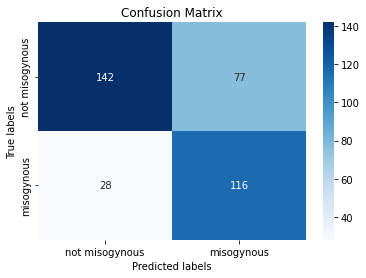

In [90]:
ax= plt.subplot()
sns.heatmap([[mean(tn_bma), mean(fp_bma)],[mean(fn_bma), mean(tp_bma)]], annot=True, fmt='g', cmap="Blues", ax=ax); 

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['not misogynous', 'misogynous']); ax.yaxis.set_ticklabels(['not misogynous', 'misogynous'])

In [91]:
measures = ["Prec pos","Prec neg","Rec pos","Rec neg","F1 pos","F1 neg", "ACC", "AUC"]

res_bma = {"measures": measures, 
       "SVM": [item for sublist in global_results['SVM'] for item in sublist] ,
       "KNN":  [item for sublist in global_results['KNN'] for item in sublist] ,
       "NB":  [item for sublist in global_results['NB'] for item in sublist] ,
       "DT":  [item for sublist in global_results['DT'] for item in sublist] ,
       "MLP":  [item for sublist in global_results['MLP'] for item in sublist] ,
       "BMA": bma_res
       }

In [92]:
risultati = pd.DataFrame(res_bma)
risultati

,measures,SVM,KNN,NB,DT,MLP,BMA
0,Prec pos,0.592546,0.507874,0.618497,0.701389,0.551277,0.602098
1,Prec neg,0.827202,0.854545,0.801047,0.800000,0.805649,0.832847
2,Rec pos,0.799310,0.889655,0.737931,0.696552,0.791034,0.803448
3,Rec neg,0.636073,0.429224,0.698630,0.803653,0.573059,0.648402
4,F1 pos,0.680565,0.646617,0.672956,0.698962,0.649548,0.688338
5,F1 neg,0.719148,0.571429,0.746341,0.801822,0.669379,0.729123
6,ACC,0.701099,0.612637,0.714286,0.760989,0.659890,0.710165
7,AUC,0.783829,0.750386,0.789891,0.789010,0.759496,0.807221


#### masked

In [94]:
project_paths.csv_uni_text_syn_masked_res

'../data/results2strategy/text/masked_sintest/text_res_bma_test2202.csv'

In [101]:
# Crate a csv file with averages model performances on test data
risultati.to_csv(project_paths.csv_uni_text_syn_masked_res, sep="\t", index= False)

#### censored

In [95]:
project_paths.csv_uni_text_syn_censored_res

'../data/results2strategy/text/censored_sintest/score_sin_test_text10fold.csv'

In [96]:
risultati.to_csv(project_paths.csv_uni_text_syn_censored_res, sep="\t", index= False)

In [51]:
risultati = pd.DataFrame(res_bma)
risultati

,measures,SVM,KNN,NB,DT,MLP,BMA
0,Prec pos,0.562229,0.495868,0.628571,0.668966,0.546611,0.604913
1,Prec neg,0.808963,0.795082,0.814815,0.780822,0.808899,0.833752
2,Rec pos,0.788276,0.827586,0.758621,0.668966,0.800000,0.803448
3,Rec neg,0.593607,0.442922,0.703196,0.780822,0.560274,0.652511
4,F1 pos,0.656332,0.620155,0.687500,0.668966,0.649360,0.690165
5,F1 neg,0.684747,0.568915,0.754902,0.780822,0.661784,0.732052
6,ACC,0.671154,0.596154,0.725275,0.736264,0.655769,0.712637
7,AUC,0.770178,0.716580,0.779090,0.753850,0.749167,0.788629


In [54]:
mean([0.668966, 0.780822])

0.7248939999999999

In [32]:
rec_pos_bma = mean(tp_bma)/ (mean(tp_bma) + mean(fn_bma)) ###True postive rate recall classe 1
fn_rate_bma = mean(fn_bma)/ (mean(tp_bma)+ mean(fn_bma))
prec_mis_bma = mean(tp_bma)/ (mean(tp_bma) + mean(fp_bma))
prec_notmis_bma = mean(tn_bma)/ (mean(tn_bma) + mean(fn_bma))
rec_neg_bma = mean(tn_bma) / (mean(tn_bma)+ mean(fp_bma))
false_positive_rate_bma = mean(fp_bma) / (mean(fp_bma)+ mean(tn_bma))
f1_1_bma= (2* (prec_mis_bma * rec_pos_bma)) / (prec_mis_bma+ rec_pos_bma) 
f1_0_bma = (2* (prec_notmis_bma * rec_neg_bma)) / (prec_notmis_bma + rec_neg_bma)



0.7984496124031008

In [34]:
mean([rec_pos_bma, rec_neg_bma])

0.6875130944898387

In [62]:

res_prima = pd.read_csv(folder_res_text + 'sintest/text_res_bma_sin_test2202.csv', sep="\t")

In [63]:
res_prima

,Unnamed: 0,Unnamed: 0.1,Modelli,Prec 0,Prec 1,Prec,Rec 0,Rec 1,Rec,F1 0,F1 1,F1,ACC,AUC
0,0,0,SVM,0.6935,0.6364,0.6650,0.5733,0.7467,0.6600,0.6277,0.6871,0.6574,0.6600,0.6916
1,1,1,KNN,0.6471,0.5758,0.6114,0.4400,0.7600,0.6114,0.5238,0.6552,0.5895,0.6000,0.6468
2,2,2,NB,0.6429,0.6818,0.6623,0.7200,0.6000,0.6600,0.6792,0.6383,0.6588,0.6600,0.6631
3,3,3,DT,0.5517,0.5714,0.5616,0.6400,0.4800,0.5600,0.5926,0.5217,0.5572,0.5600,0.6346
4,4,4,MLP,0.6403,0.5923,0.6163,0.5080,0.7147,0.6113,0.5665,0.6477,0.6071,0.6113,0.6605
5,5,5,BMA,0.6761,0.6570,0.6665,0.6373,0.6947,0.6660,0.6561,0.6753,0.6657,0.6660,0.7054


In [55]:
folder_results2 = '../data/results2strategy/'

folder_res_text = folder_results2+ 'text/'

In [56]:
# Crate a csv file with averages model performances on test data
risultati.to_csv(folder_res_text + 'new_sintest/text_bma_newsyn.csv', sep="\t", index= False)